# What is Martingale Strategy?

The Martingale strategy is a betting system used primarily in gambling, where the player doubles their bet after every loss. The idea behind the strategy is that eventually, a win will occur, and the player will recover all previous losses plus gain a profit equal to the original bet.

### How It Works:
1. **Initial Bet**: The player starts with an initial bet amount.
2. **Doubling After Loss**: If the player loses the bet, they double their next bet. This doubling continues with each loss.
3. **Return to Initial Bet After Win**: Once the player wins, they return to the original bet amount.

### Example:
- **Initial Bet**: $10
- **First Bet**: $10 (Loss)
- **Second Bet**: $20 (Loss)
- **Third Bet**: $40 (Loss)
- **Fourth Bet**: $80 (Win)

After the fourth bet, the player wins $80, which covers all previous losses ($10 + $20 + $40 = $70) and yields a $10 profit.

### Risks:
- **Large Losses**: If the player encounters a long losing streak, the bet size can grow exponentially, leading to very large losses.
- **Betting Limits**: Many casinos have betting limits, which can prevent the player from doubling the bet indefinitely.
- **Bankroll Requirements**: The strategy requires a large bankroll to sustain the doubling process during a losing streak.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import rollDice, multiple_betters

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200

In [14]:
def martingale_better(funds: int, initial_wager: int, wager_count: int, add_legend: bool = False, logscale: bool = False) -> None:
    """
    Simulates the Martingale betting strategy over a series of wagers and plots the account value over time.

    The Martingale strategy involves doubling the bet after every loss and resetting to the initial wager after a win.

    :param funds: The initial amount of money the bettor has to bet with.
    :param initial_wager: The amount of money the bettor bets on the first round.
    :param wager_count: The total number of wagers to simulate.
    :param add_legend: Whether to add a legend to the plot.
    :param logscale: Whether to plot the account value on a logarithmic scale.
    """
    account_value = funds
    wager = initial_wager
    
    wager_list = []
    account_value_list = []
    dice_rolls = []
    
    current_wager = 1
    is_previous_win = True
    previous_wager_amount = initial_wager
    broke_counter = 0
    
    while current_wager <= wager_count:
        win, roll = rollDice()  # Unpack the result and roll
        dice_rolls.append(roll)
        
        if is_previous_win:
            wager = initial_wager
        else:
            wager = previous_wager_amount * 2
        
        if win:
            account_value += wager
            is_previous_win = True
        else:
            account_value -= wager
            is_previous_win = False
            
        previous_wager_amount = wager
        wager_list.append(current_wager)
        account_value_list.append(account_value)
        
        if account_value <= 0:
            broke_counter += 1
            break
        
        current_wager += 1

    # Setting up the subplot with 2 rows and 1 column
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    
    # Plotting the account value over time
    axs[0].plot(wager_list, account_value_list)
    axs[0].set_title(f"Martingale Strategy\nFunds: {funds}, Wager Count: {wager_count}, Initial Wager: {initial_wager}")
    axs[0].set_ylabel("Account Value")
    axs[0].set_xlabel("Wager Count")
    
    if add_legend:
        axs[0].axhline(0, c='red', label=f'Better went broke here, {broke_counter} times')
        axs[0].legend()
    else:
        axs[0].axhline(0, c='red')
        
    if logscale:
        axs[0].set_yscale('log')
    
    # Plotting the histogram of dice rolls
    axs[1].hist(dice_rolls, bins=20, edgecolor='black')
    axs[1].set_title("Histogram of Dice Rolls")
    axs[1].set_xlabel("Dice Roll")
    axs[1].set_ylabel("Frequency")
    
    plt.show

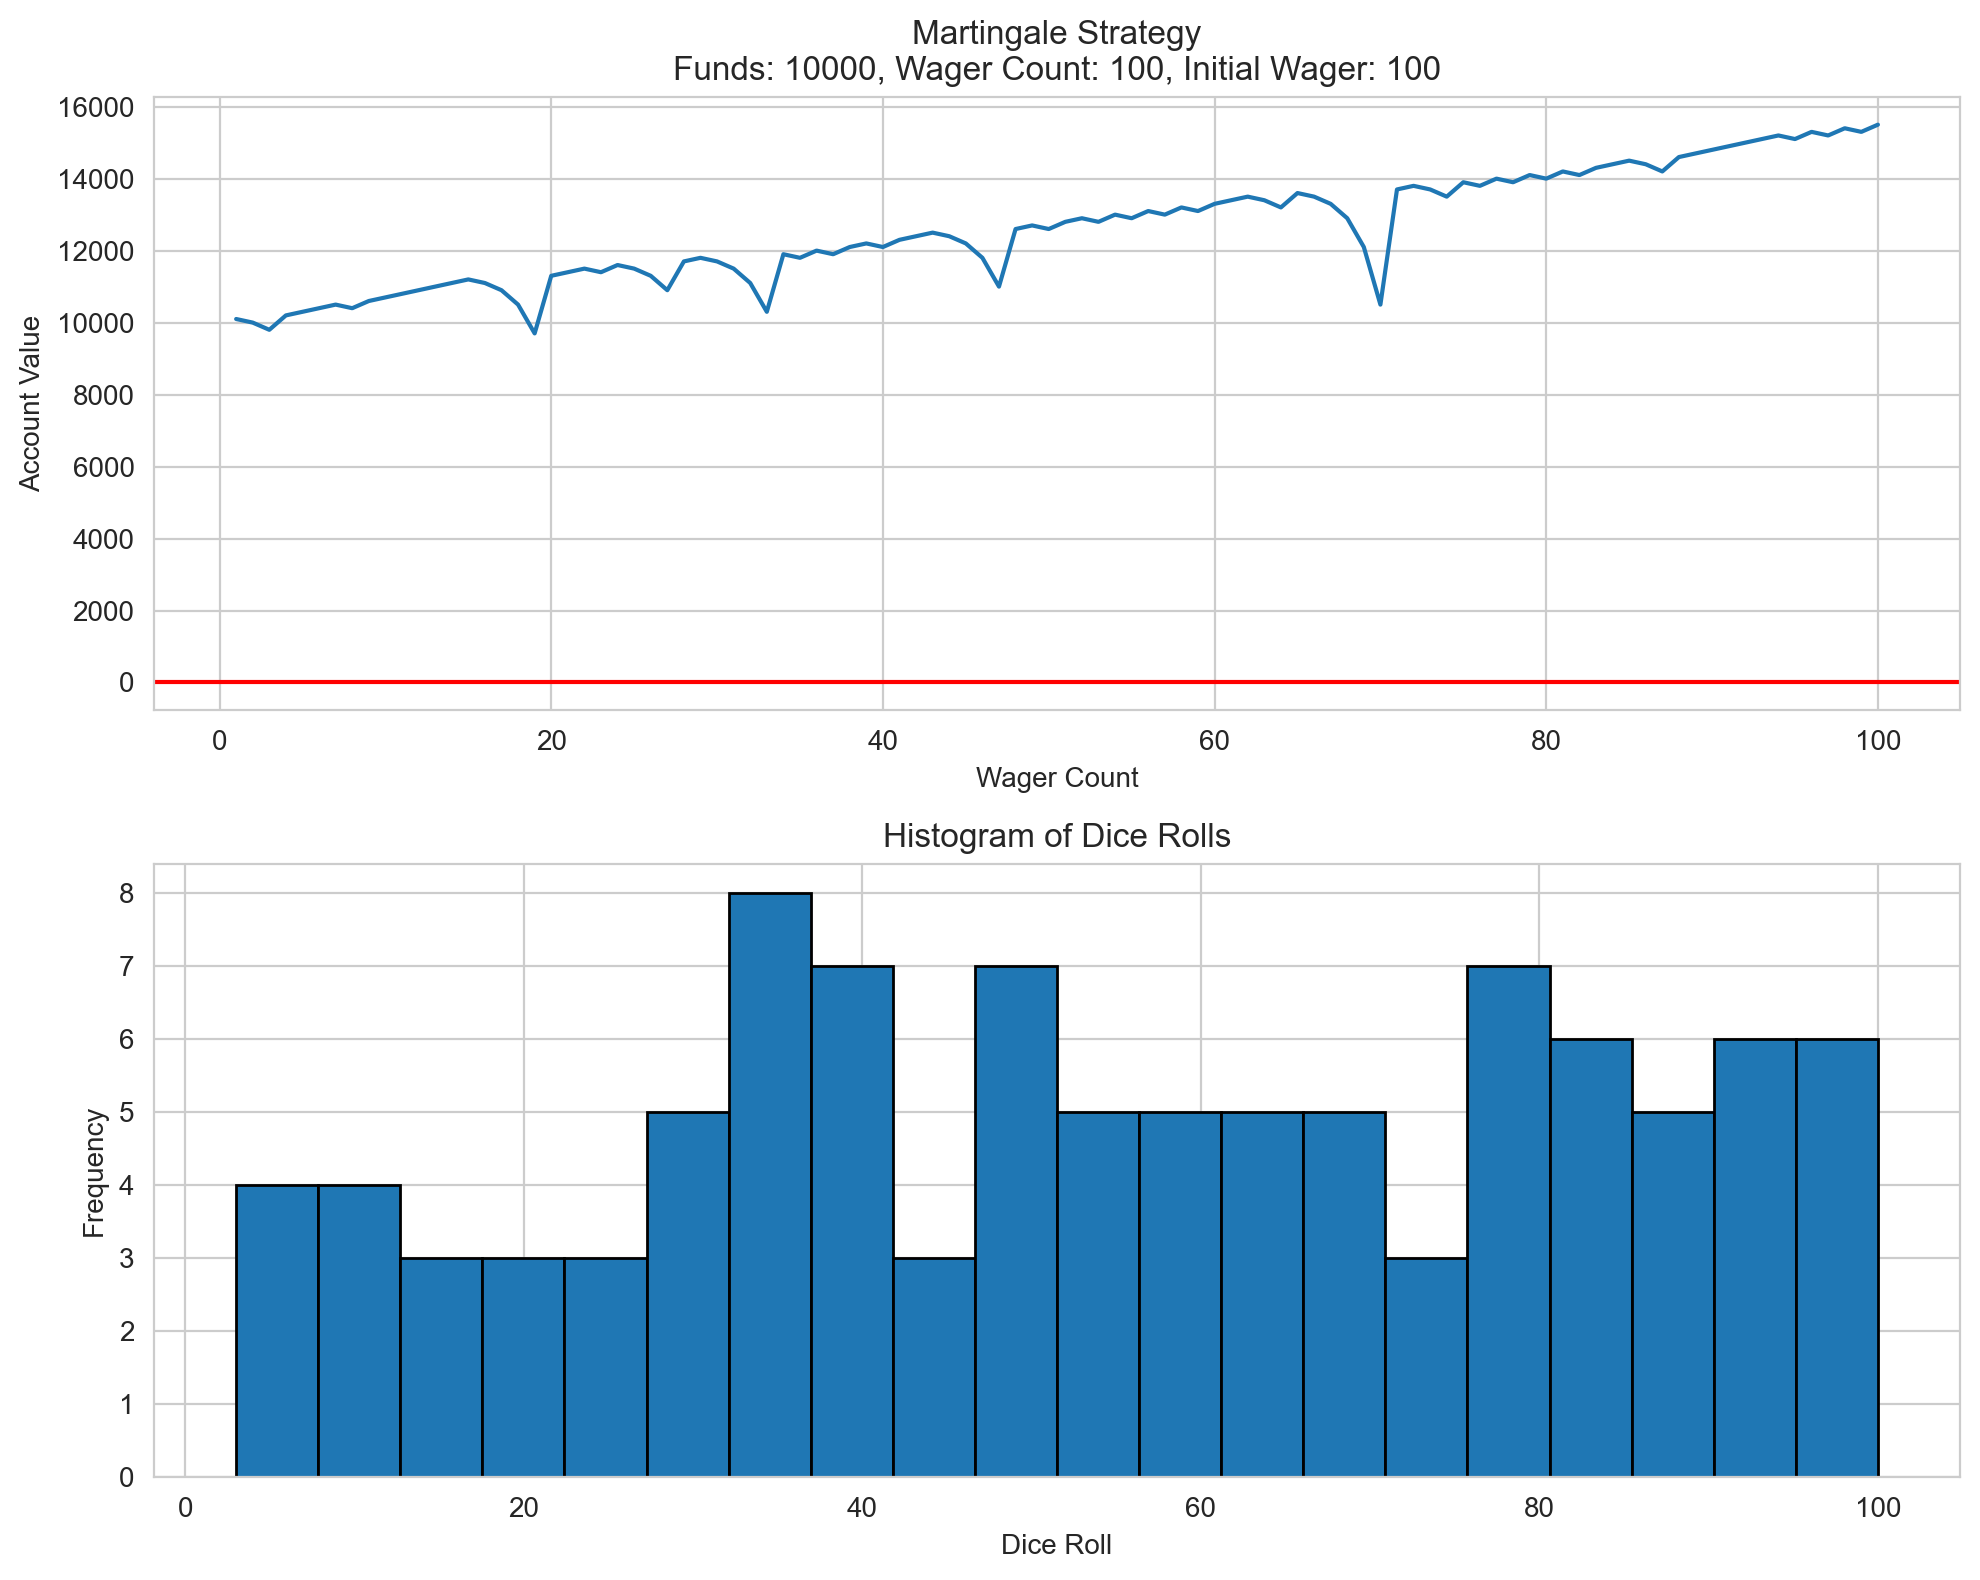

In [5]:
# better 1
martingale_better(
    funds=10_000,
    initial_wager=100,
    wager_count=100
)

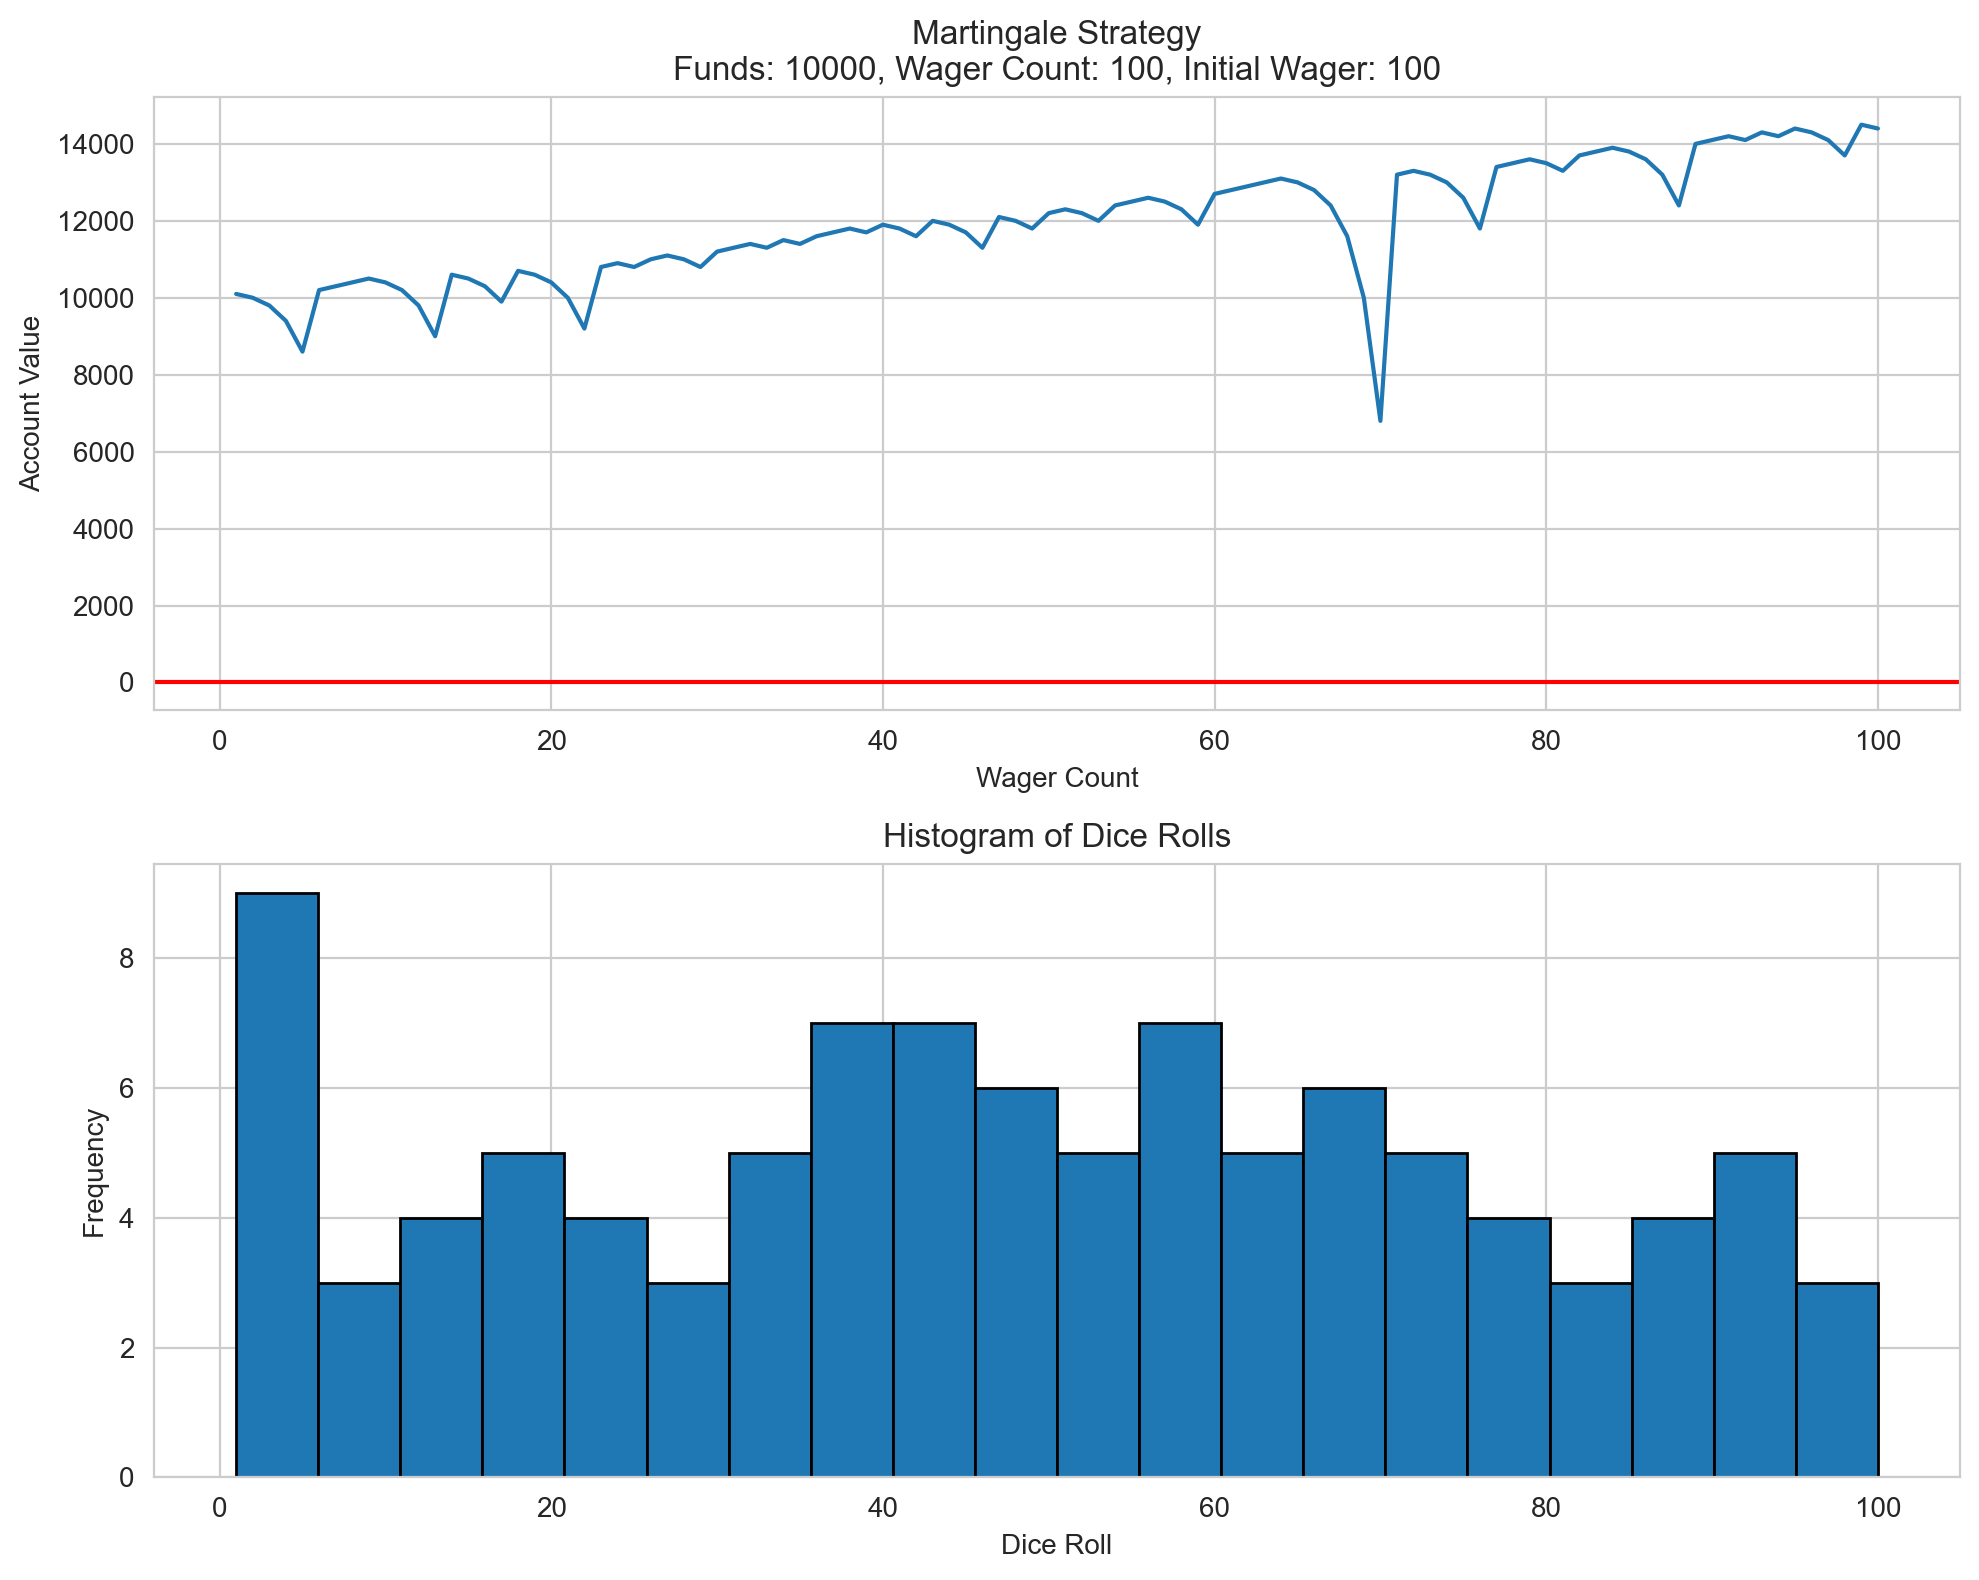

In [7]:
# better 2
martingale_better(
    funds=10_000,
    initial_wager=100,
    wager_count=100
)

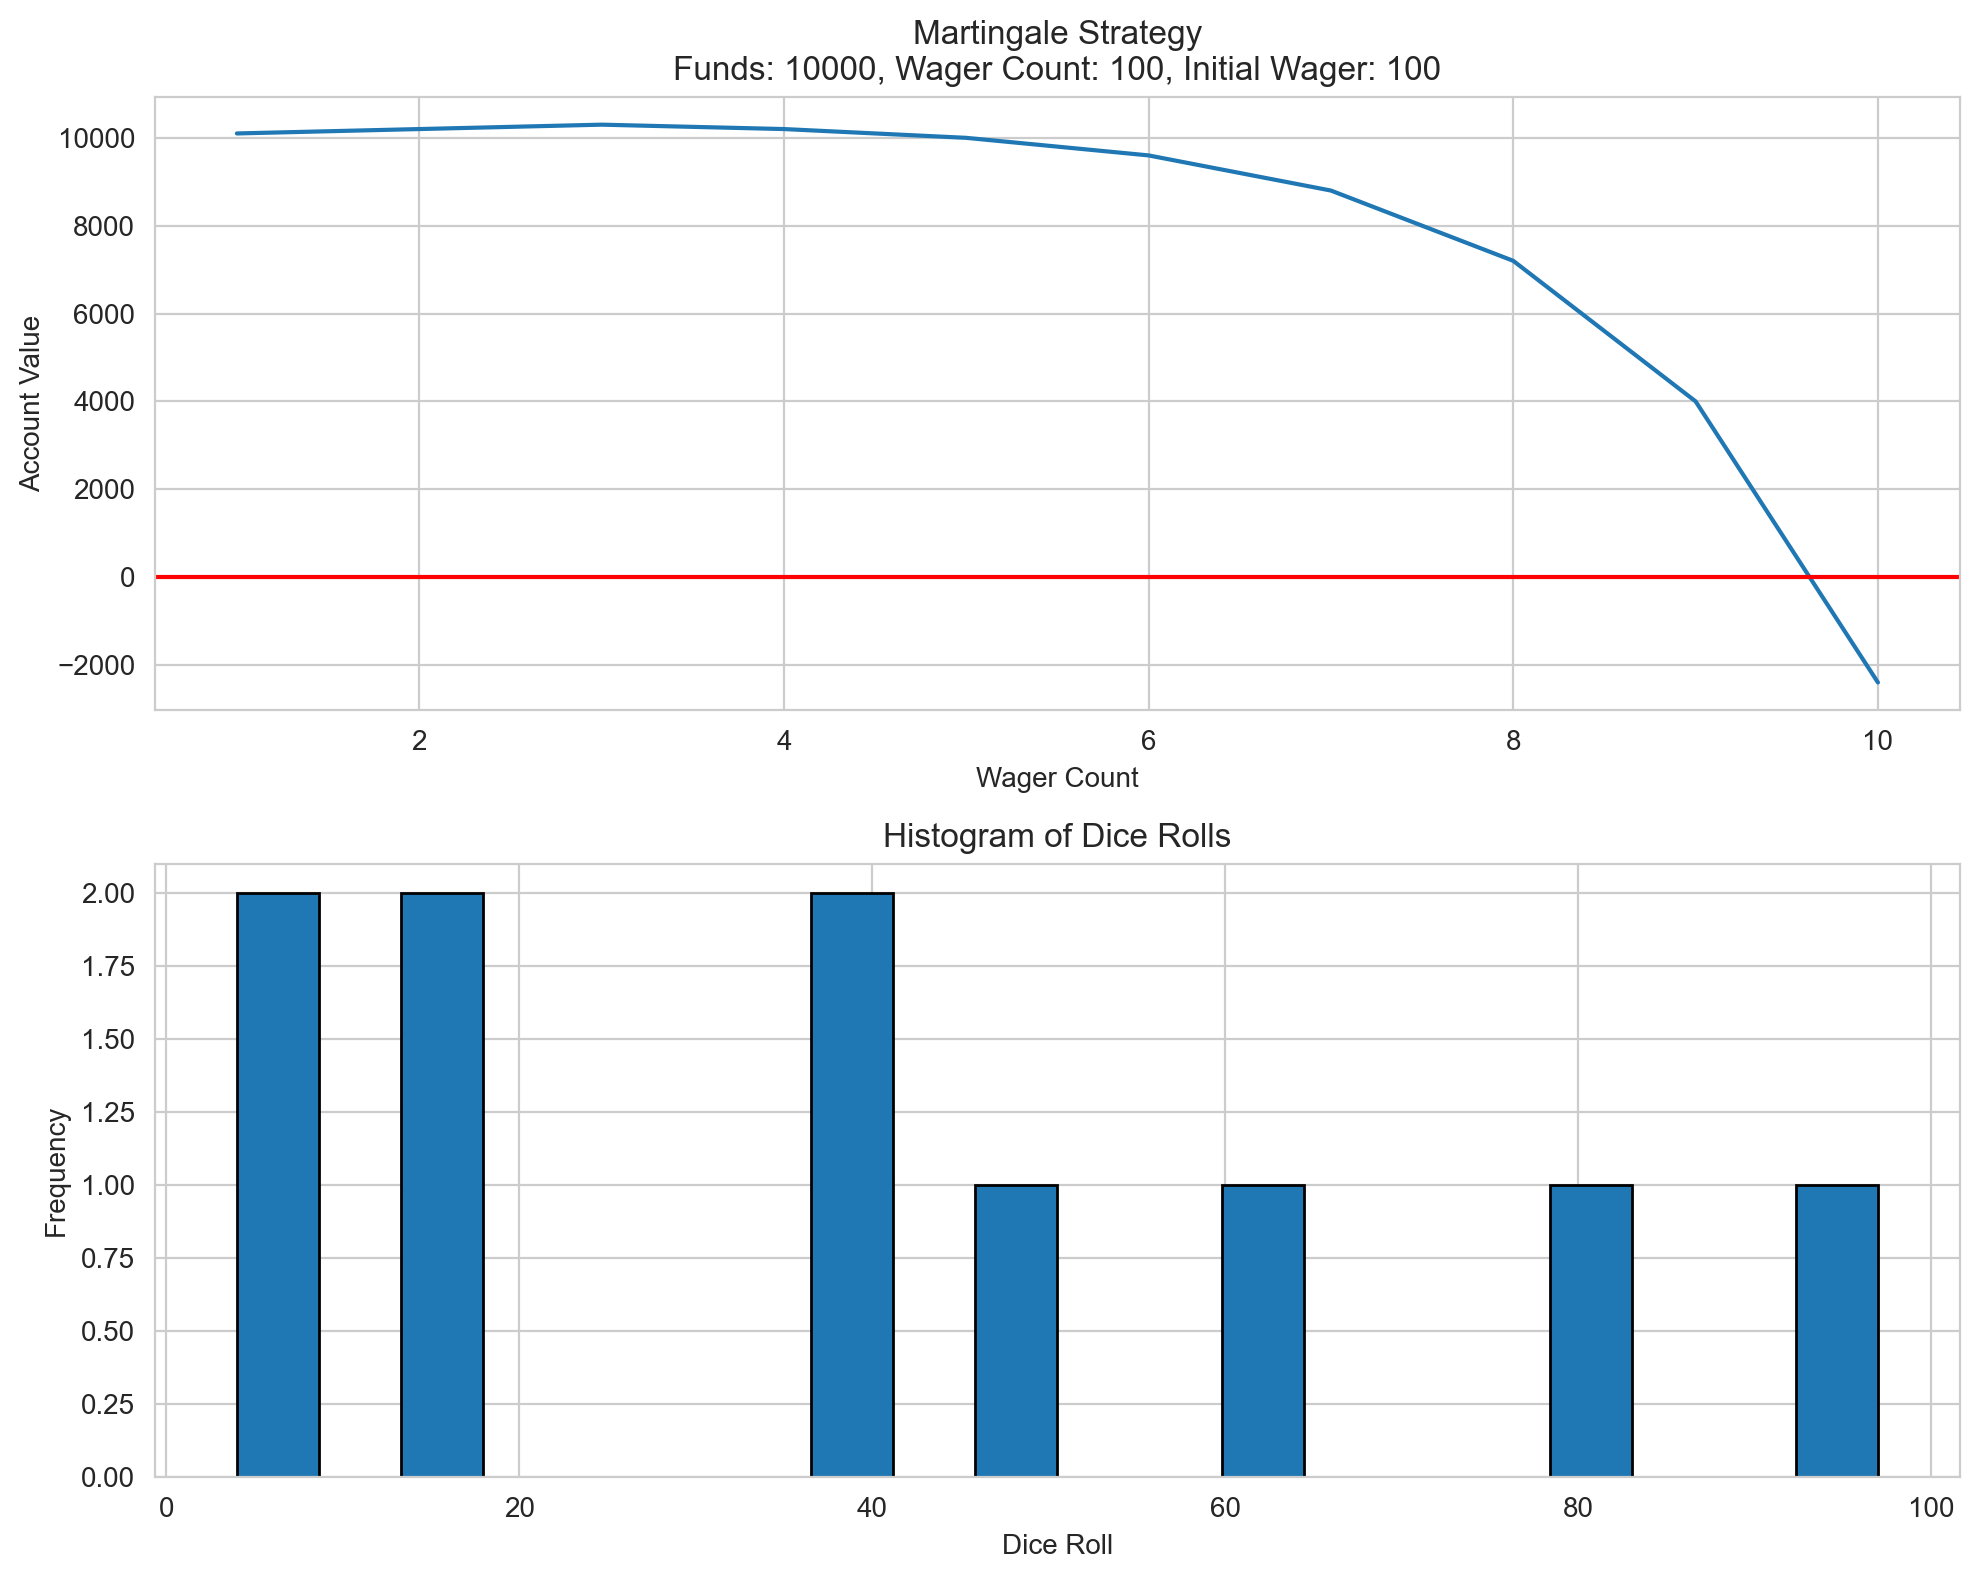

In [8]:
# better 3
martingale_better(
    funds=10_000,
    initial_wager=100,
    wager_count=100
)

### Martingale Strategy: The High-Roller’s Delight (Or Disaster)

The Martingale betting strategy is like a magic trick that works as long as you don’t run out of rabbits in your hat. The idea is simple: every time you lose, just double your wager. Eventually, when you win, you’ll recover all your losses and even pocket a little extra. Sounds like a gambler’s dream, right? Well, let’s see how it played out for our three bettors:

1. **Bettor 1 and Bettor 2**:
   - **Outcome**: These two were on a roll—or should we say a lucky streak. They managed to recover from their losses and walked away with more money than they started with. 
   - **Success**: The strategy worked because they didn’t face a string of losses long enough to drain their wallets. Lucky them!
   - **Observation**: It’s like they were playing with Monopoly money—no sweat, no stress, just a smooth recovery and a happy ending.

2. **Bettor 3**:
   - **Outcome**: Ah, poor Bettor 3. Unlike their luckier friends, they hit a losing streak longer than a Monday morning. By the time the winning roll finally came around, Bettor 3 was already out of cash, and probably out of patience too.
   - **Reality Check**: This is where the Martingale strategy shows its true colors—if your luck runs out, so does your bank account. Bettor 3 learned the hard way that you can’t double nothing.

### The Pitfall of the Martingale Strategy

The Martingale strategy is like playing a game of chicken with Lady Luck—eventually, she’s going to win. It assumes you have an infinite pile of cash, but unless you’re the love child of Scrooge McDuck and a bank vault, that’s just not realistic. In the end, the strategy can turn a few unlucky rolls into a one-way ticket to Brokesville.

C:\Users\Asif Sayyed\AppData\Local\Temp\ipykernel_5628\2406756103.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 1, figsize=(10, 8))


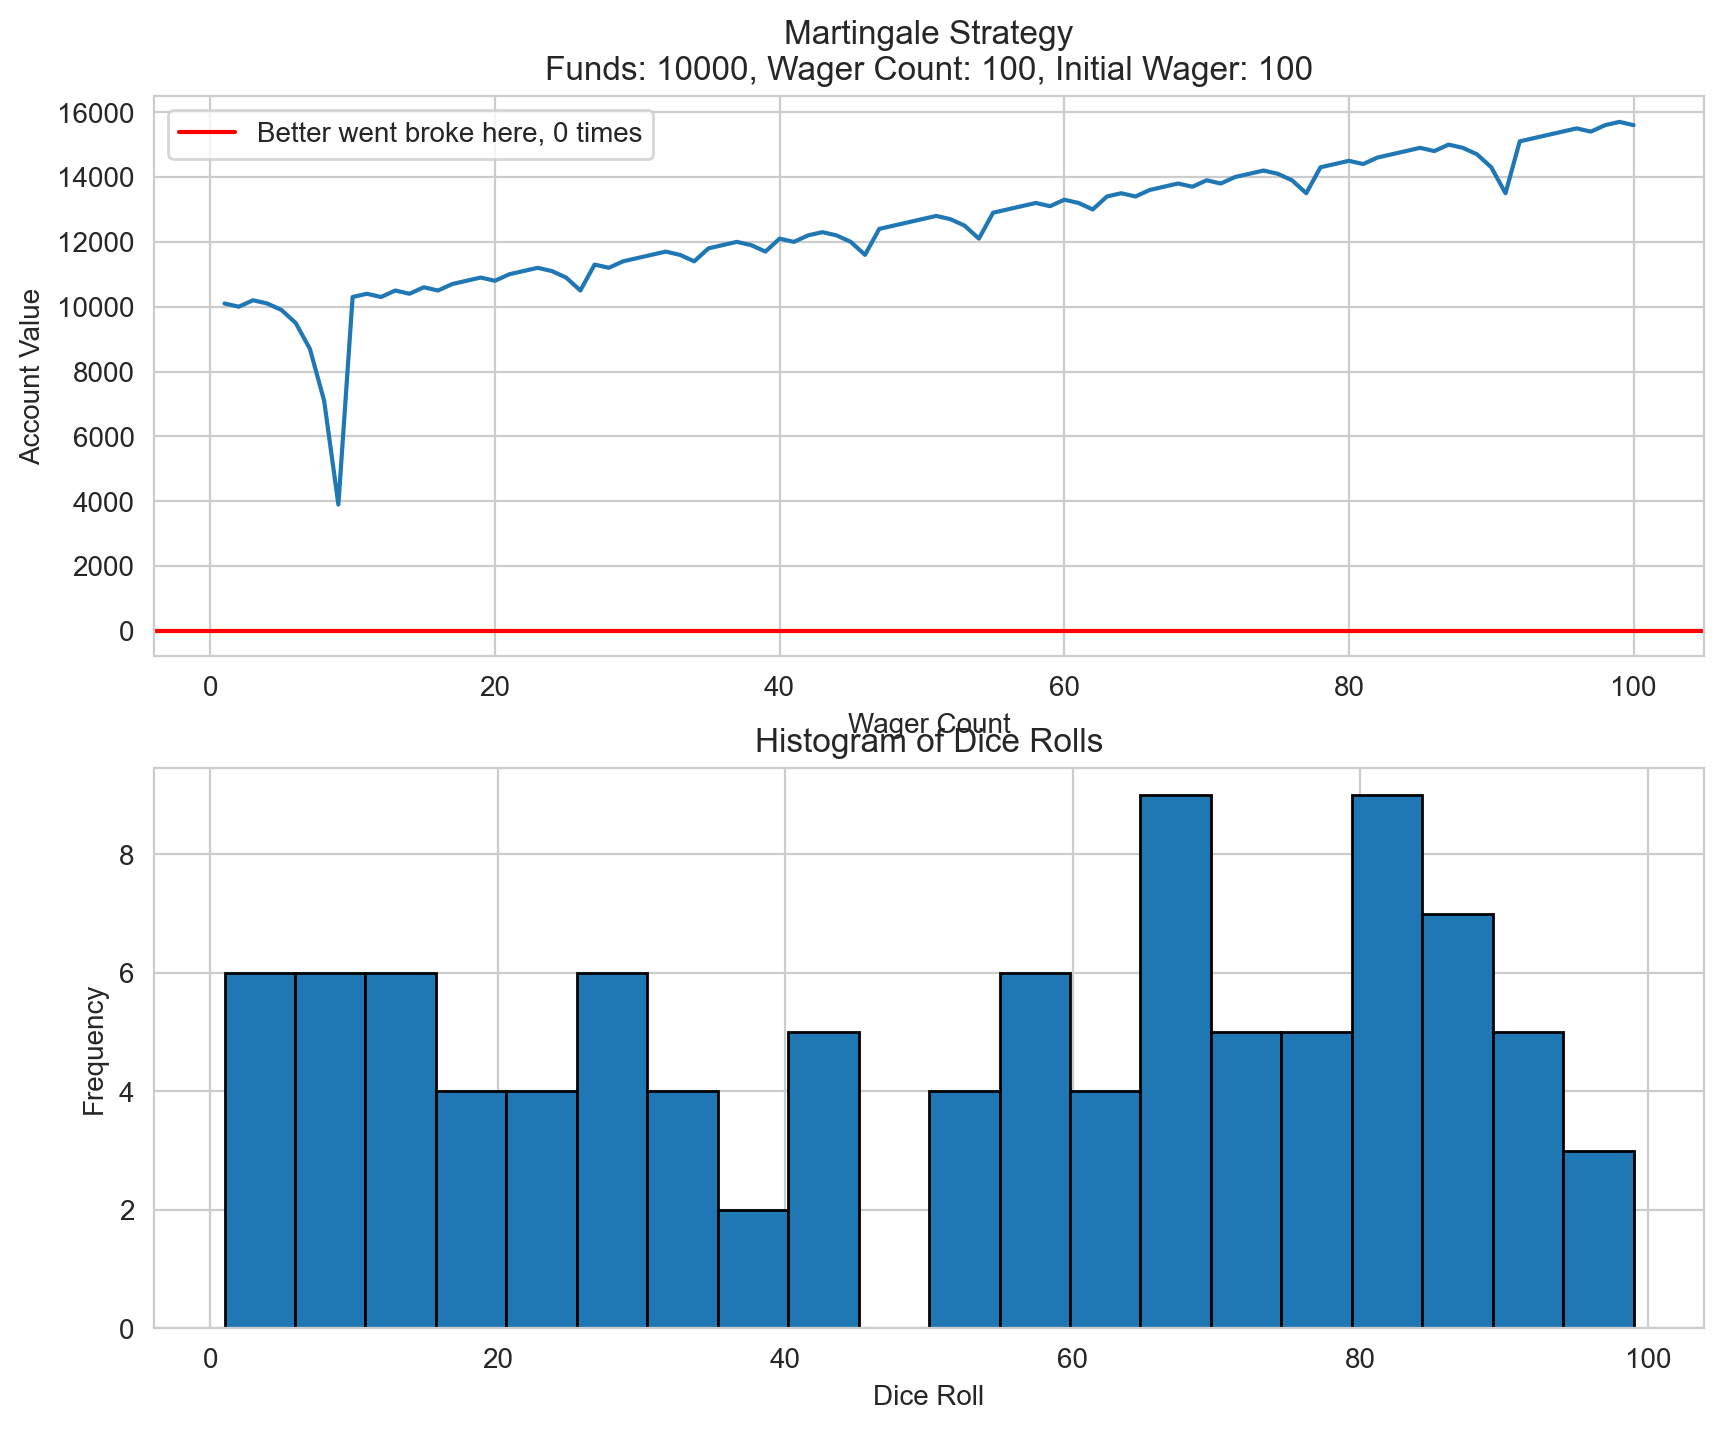

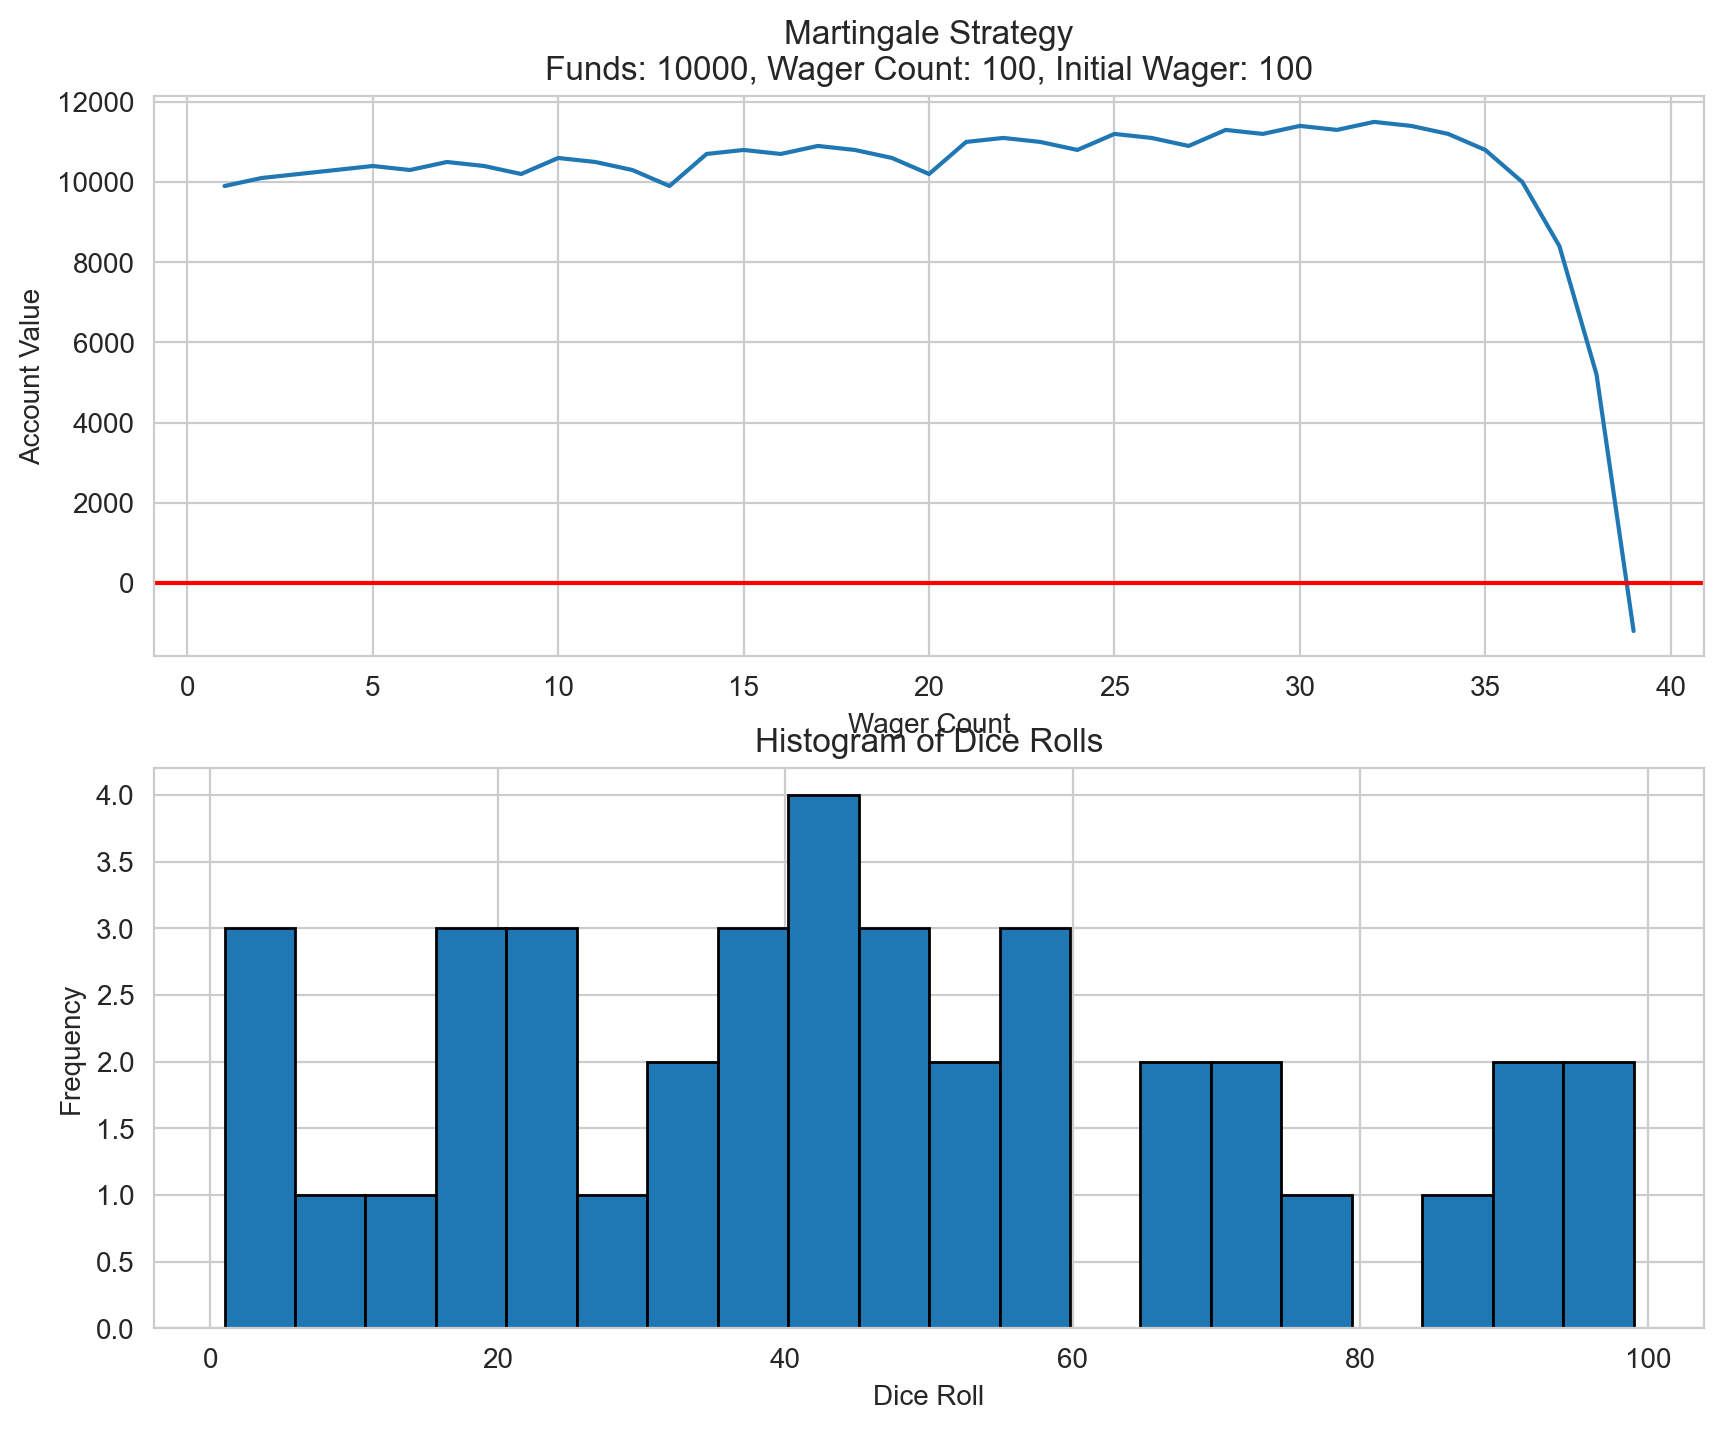

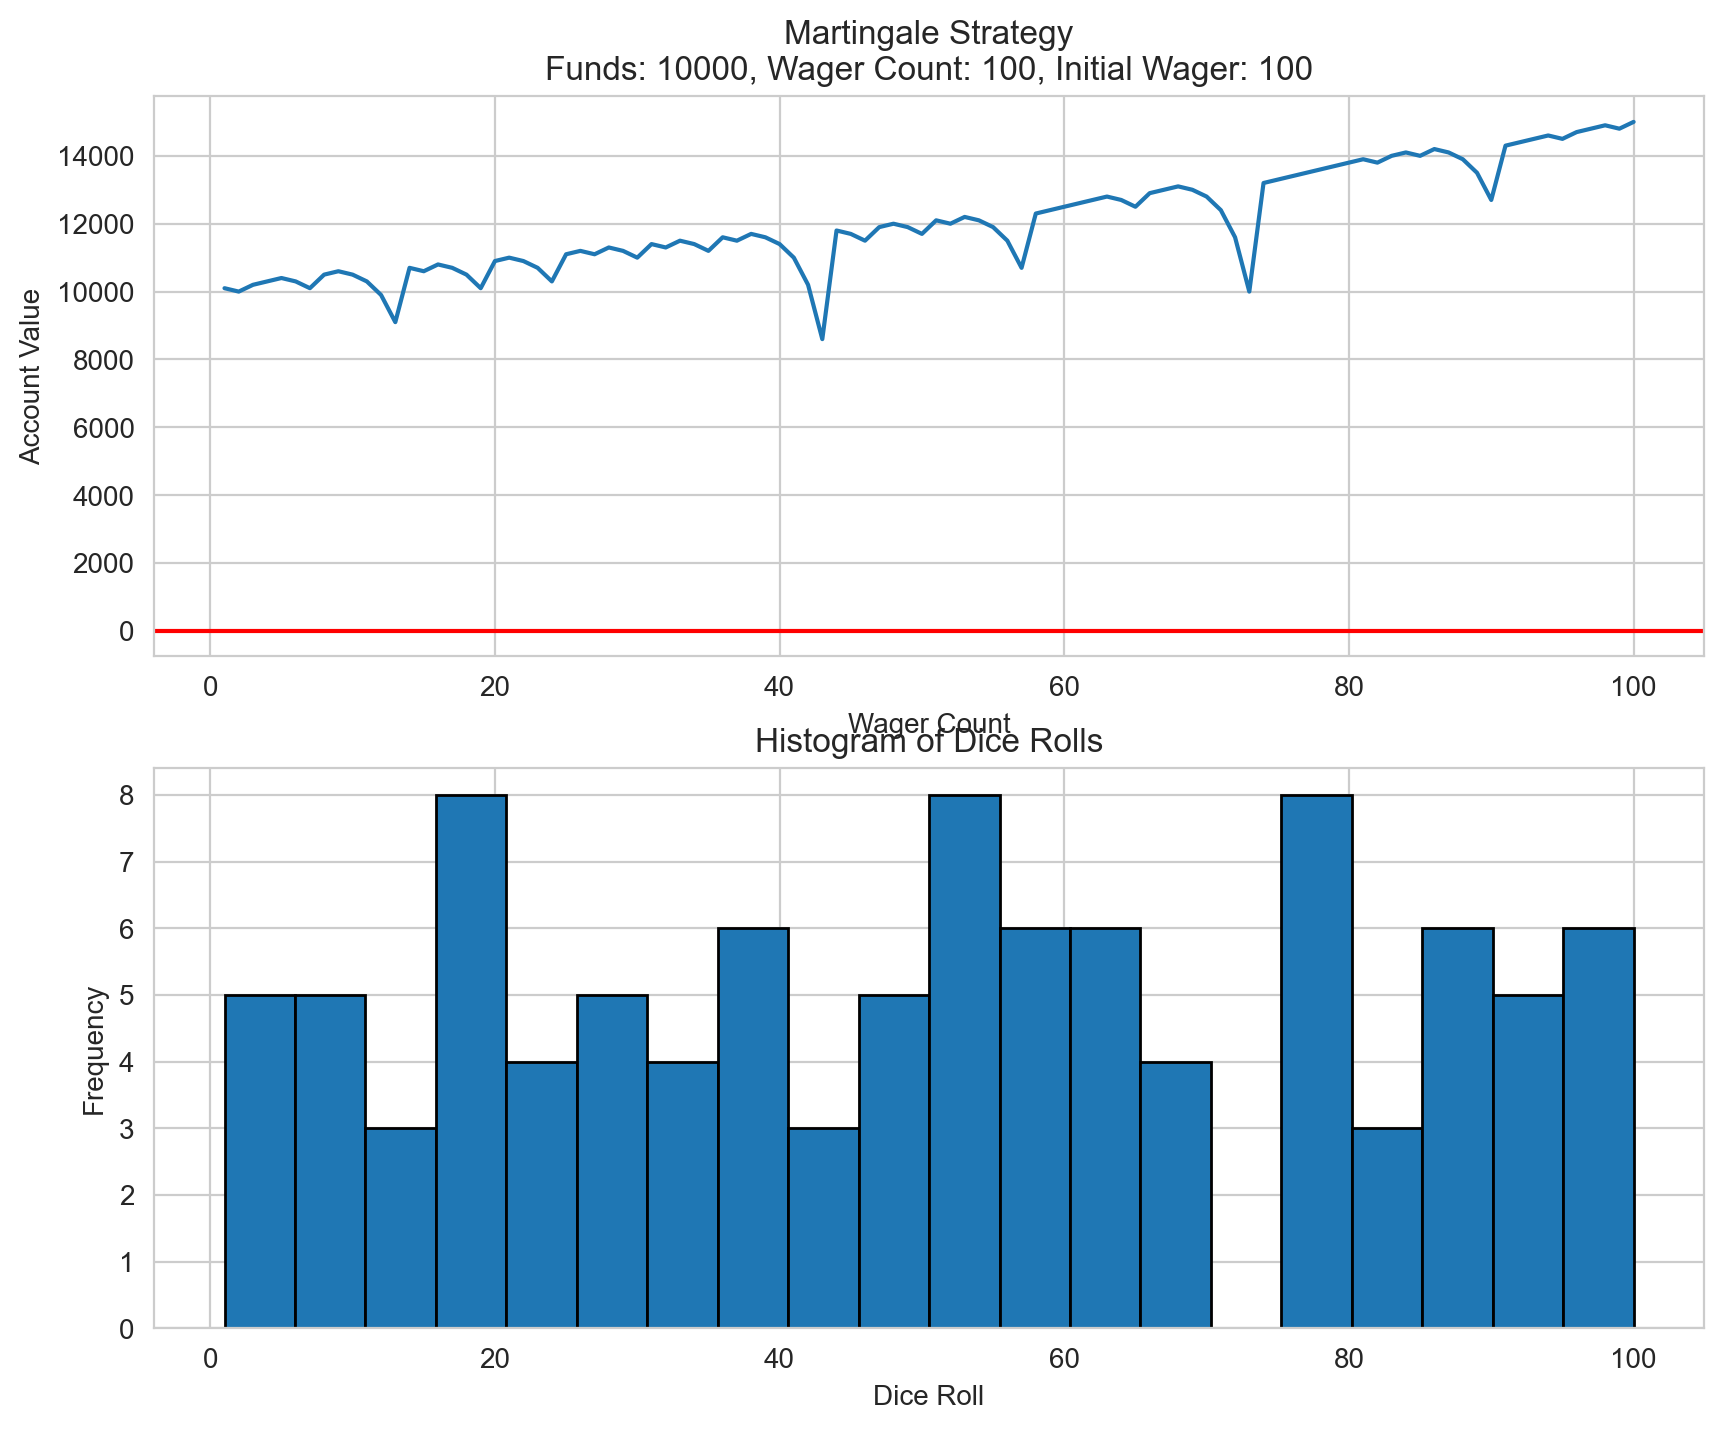

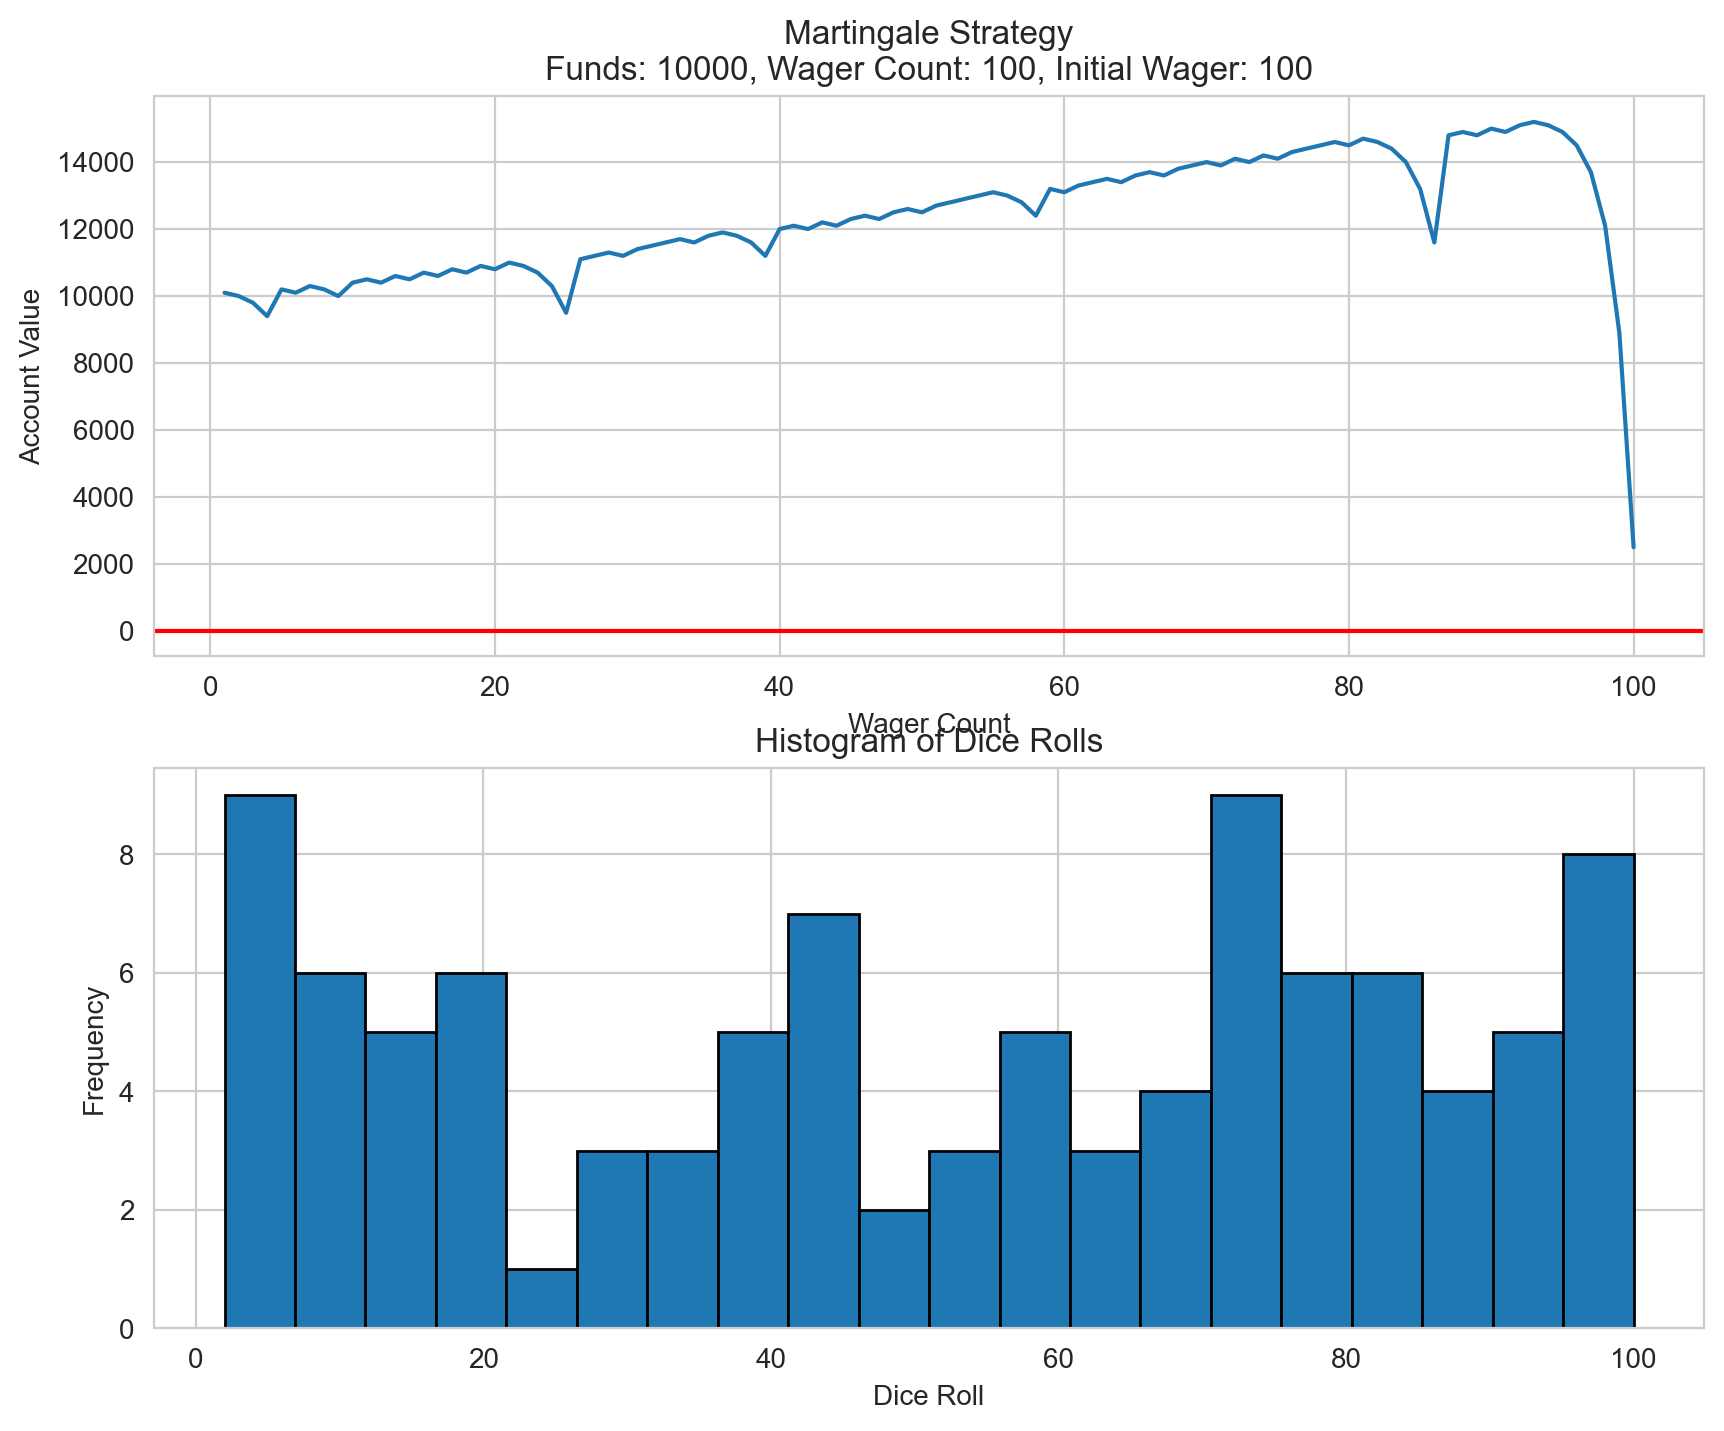

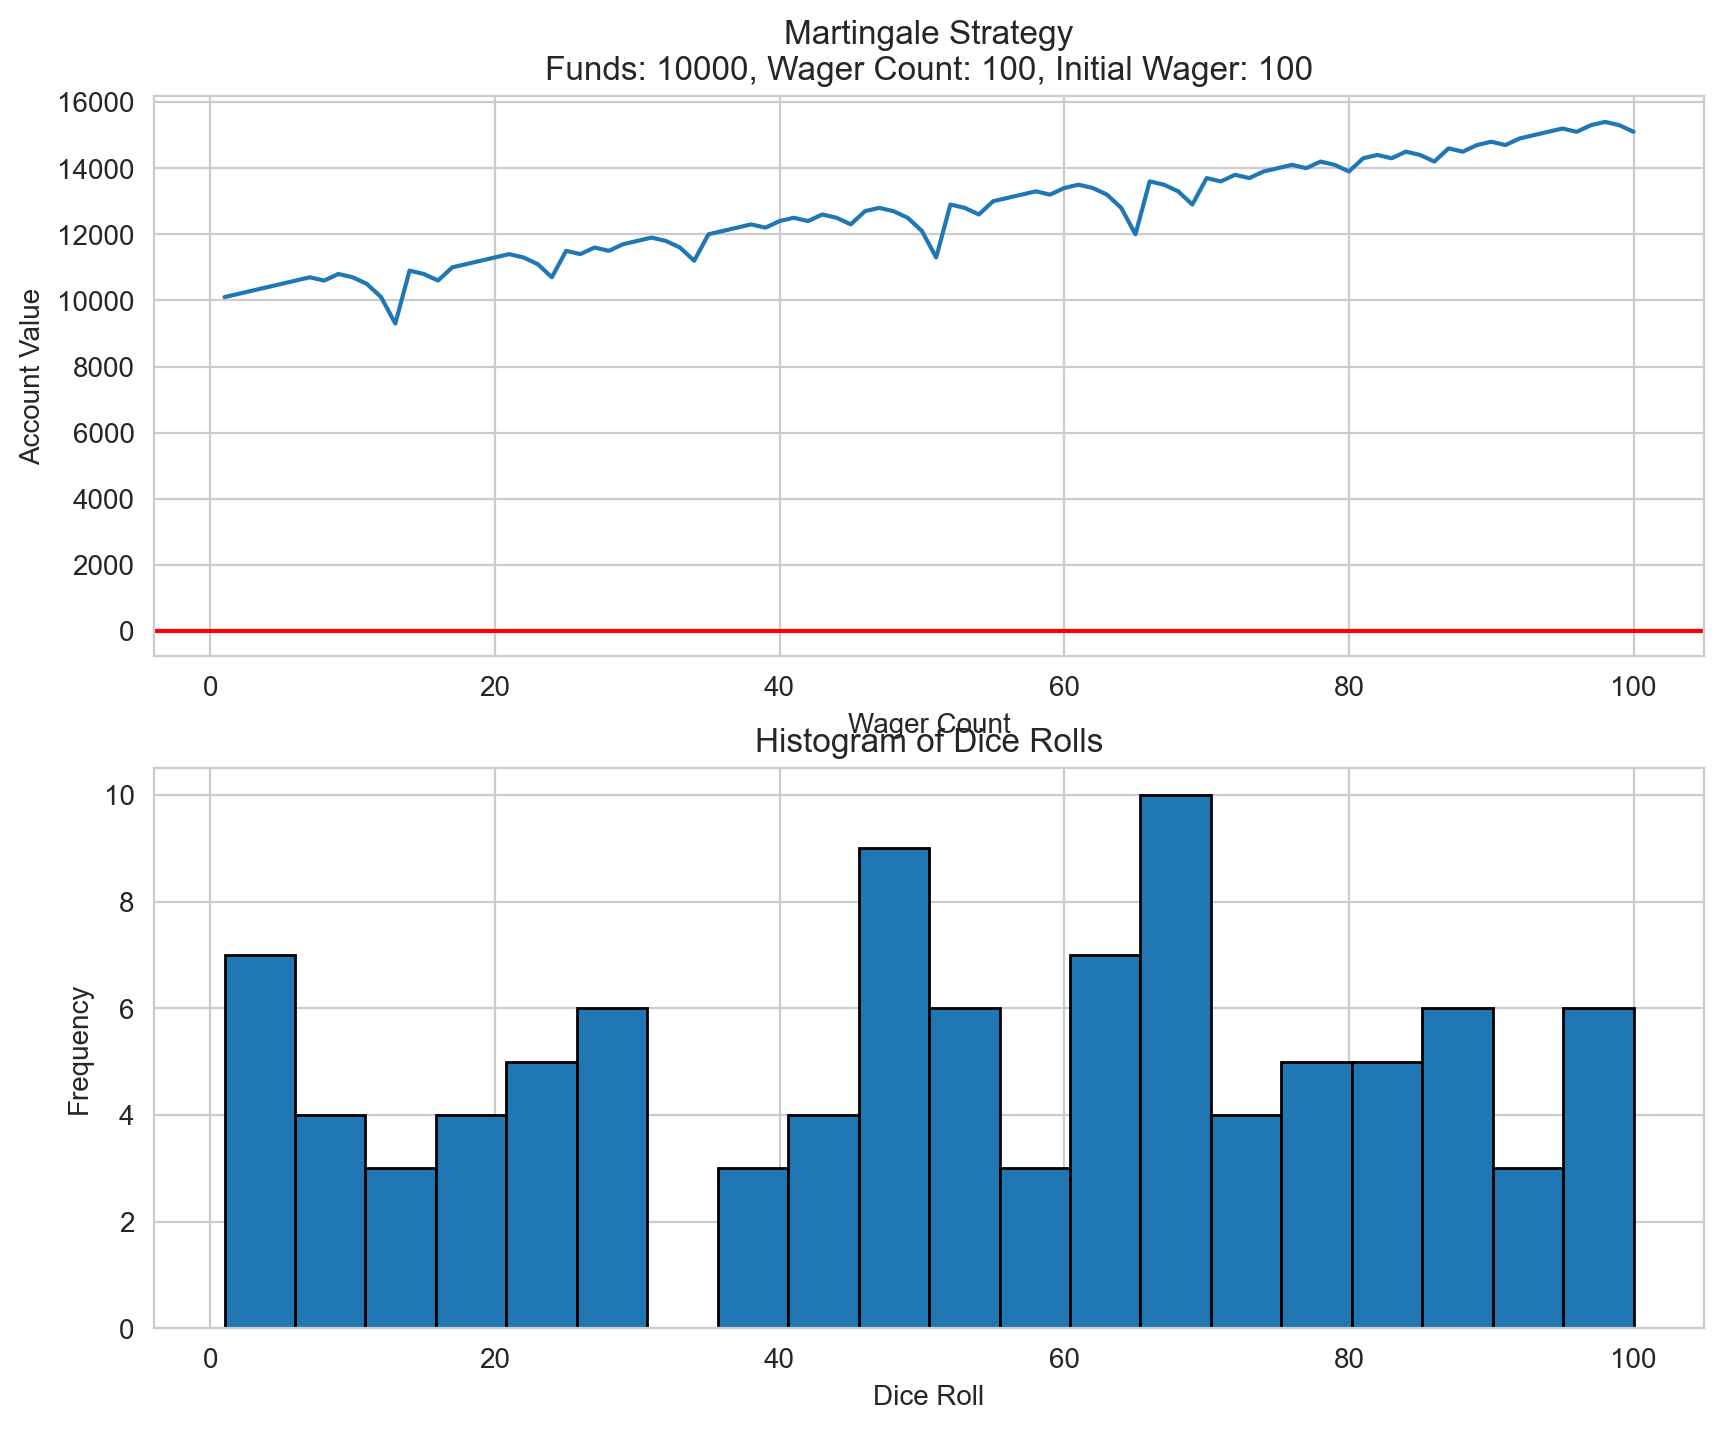

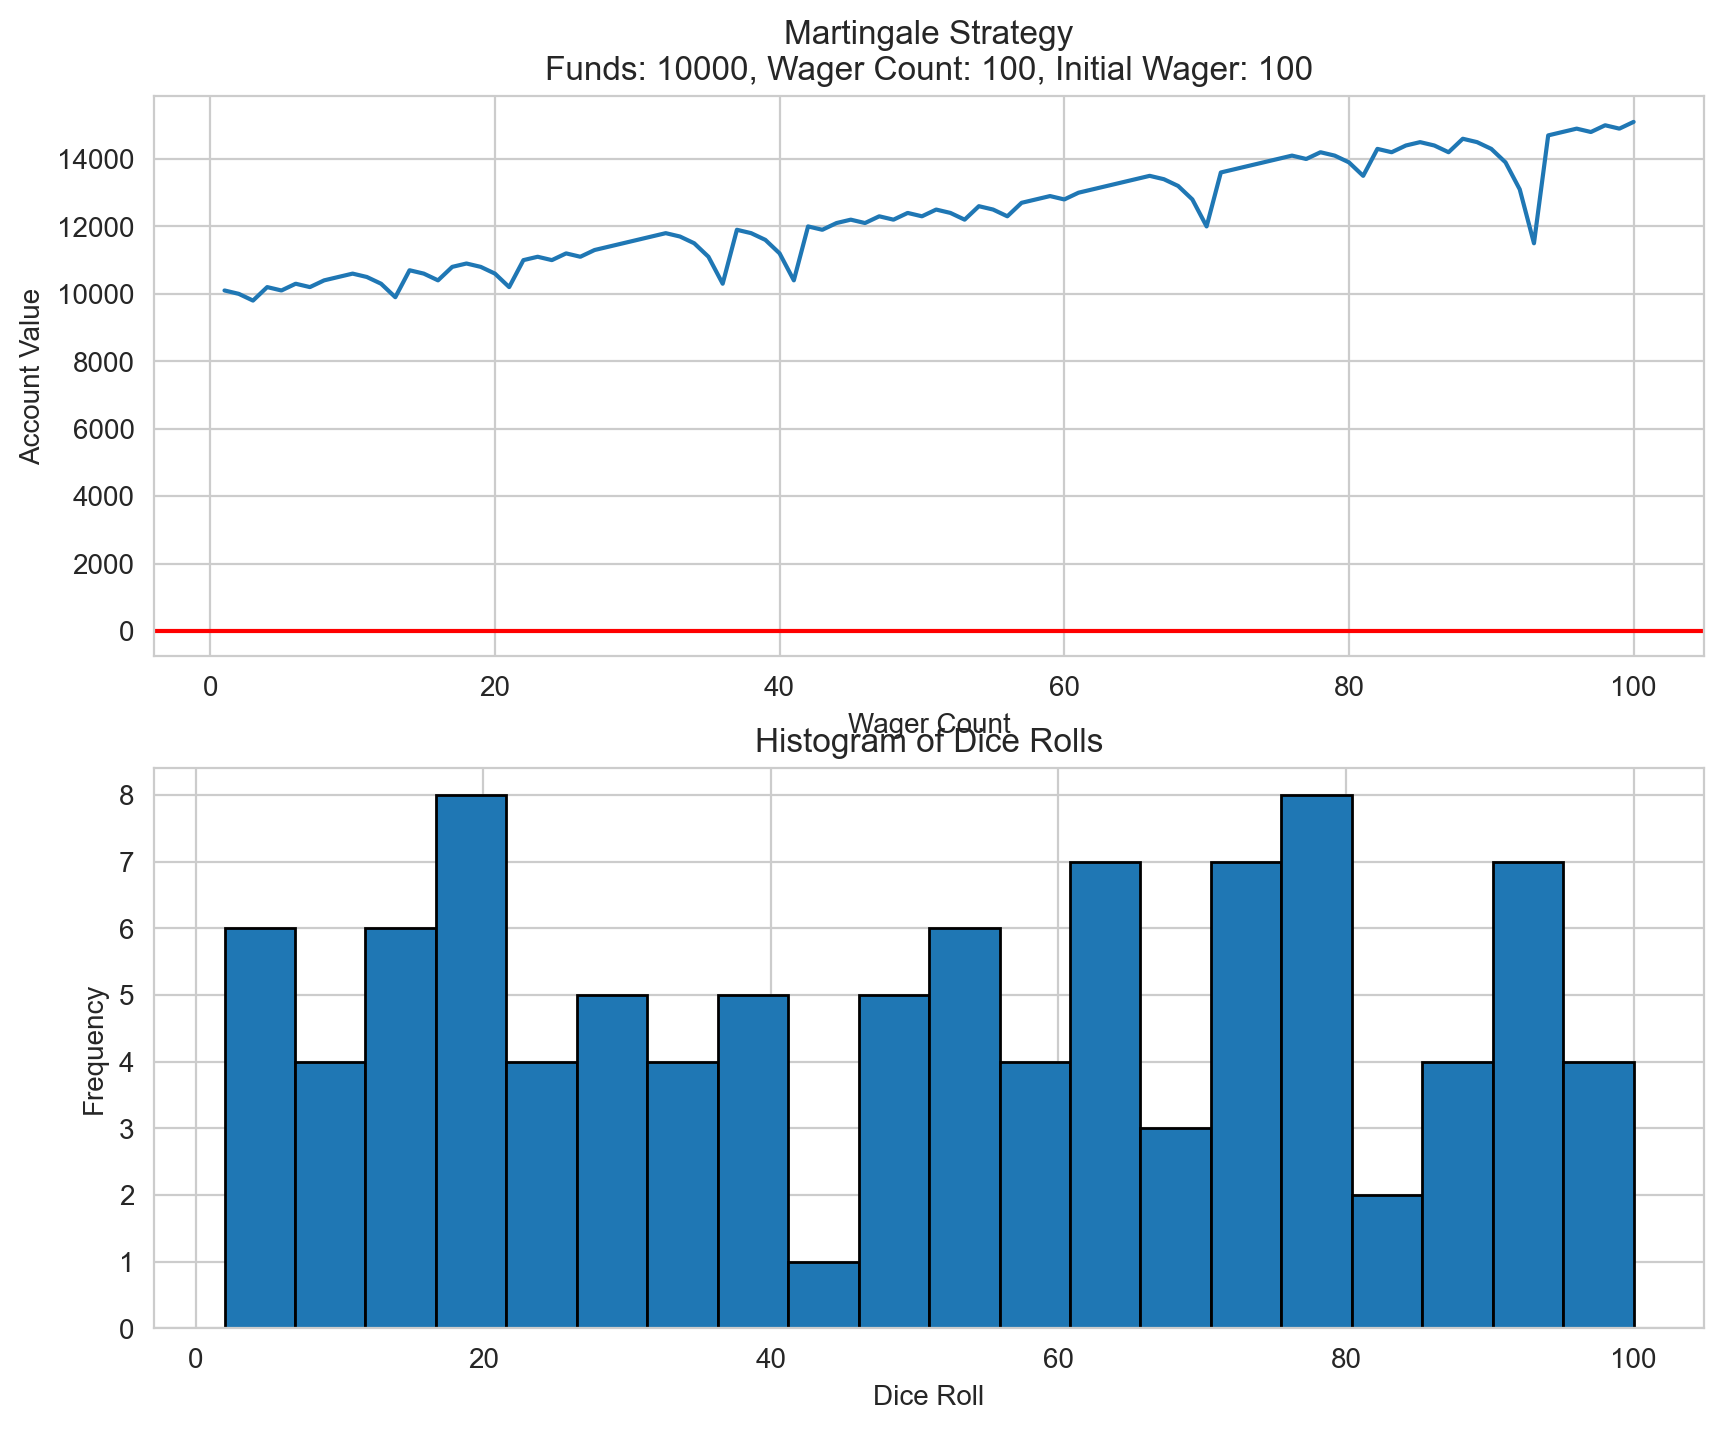

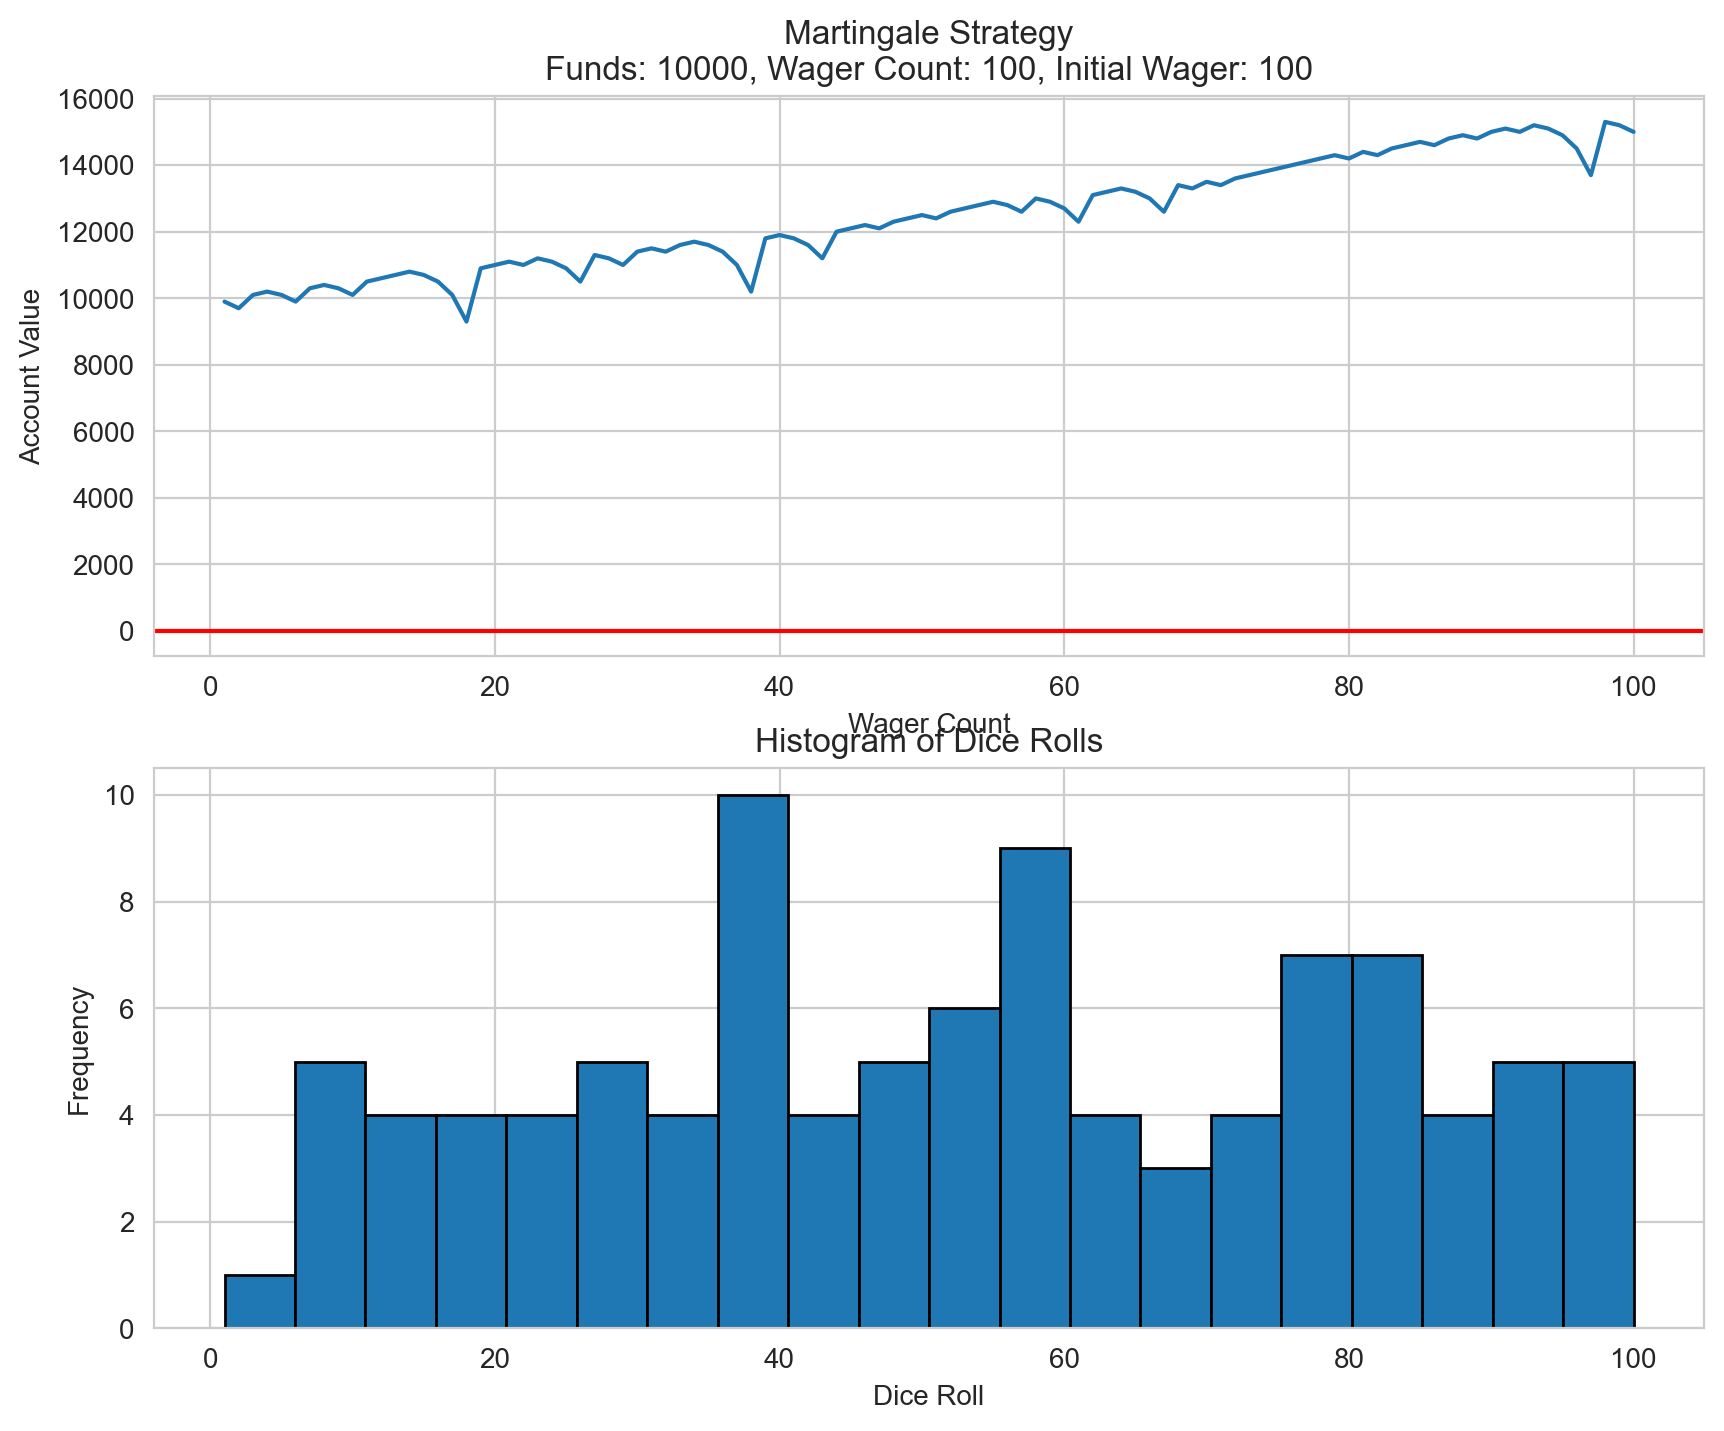

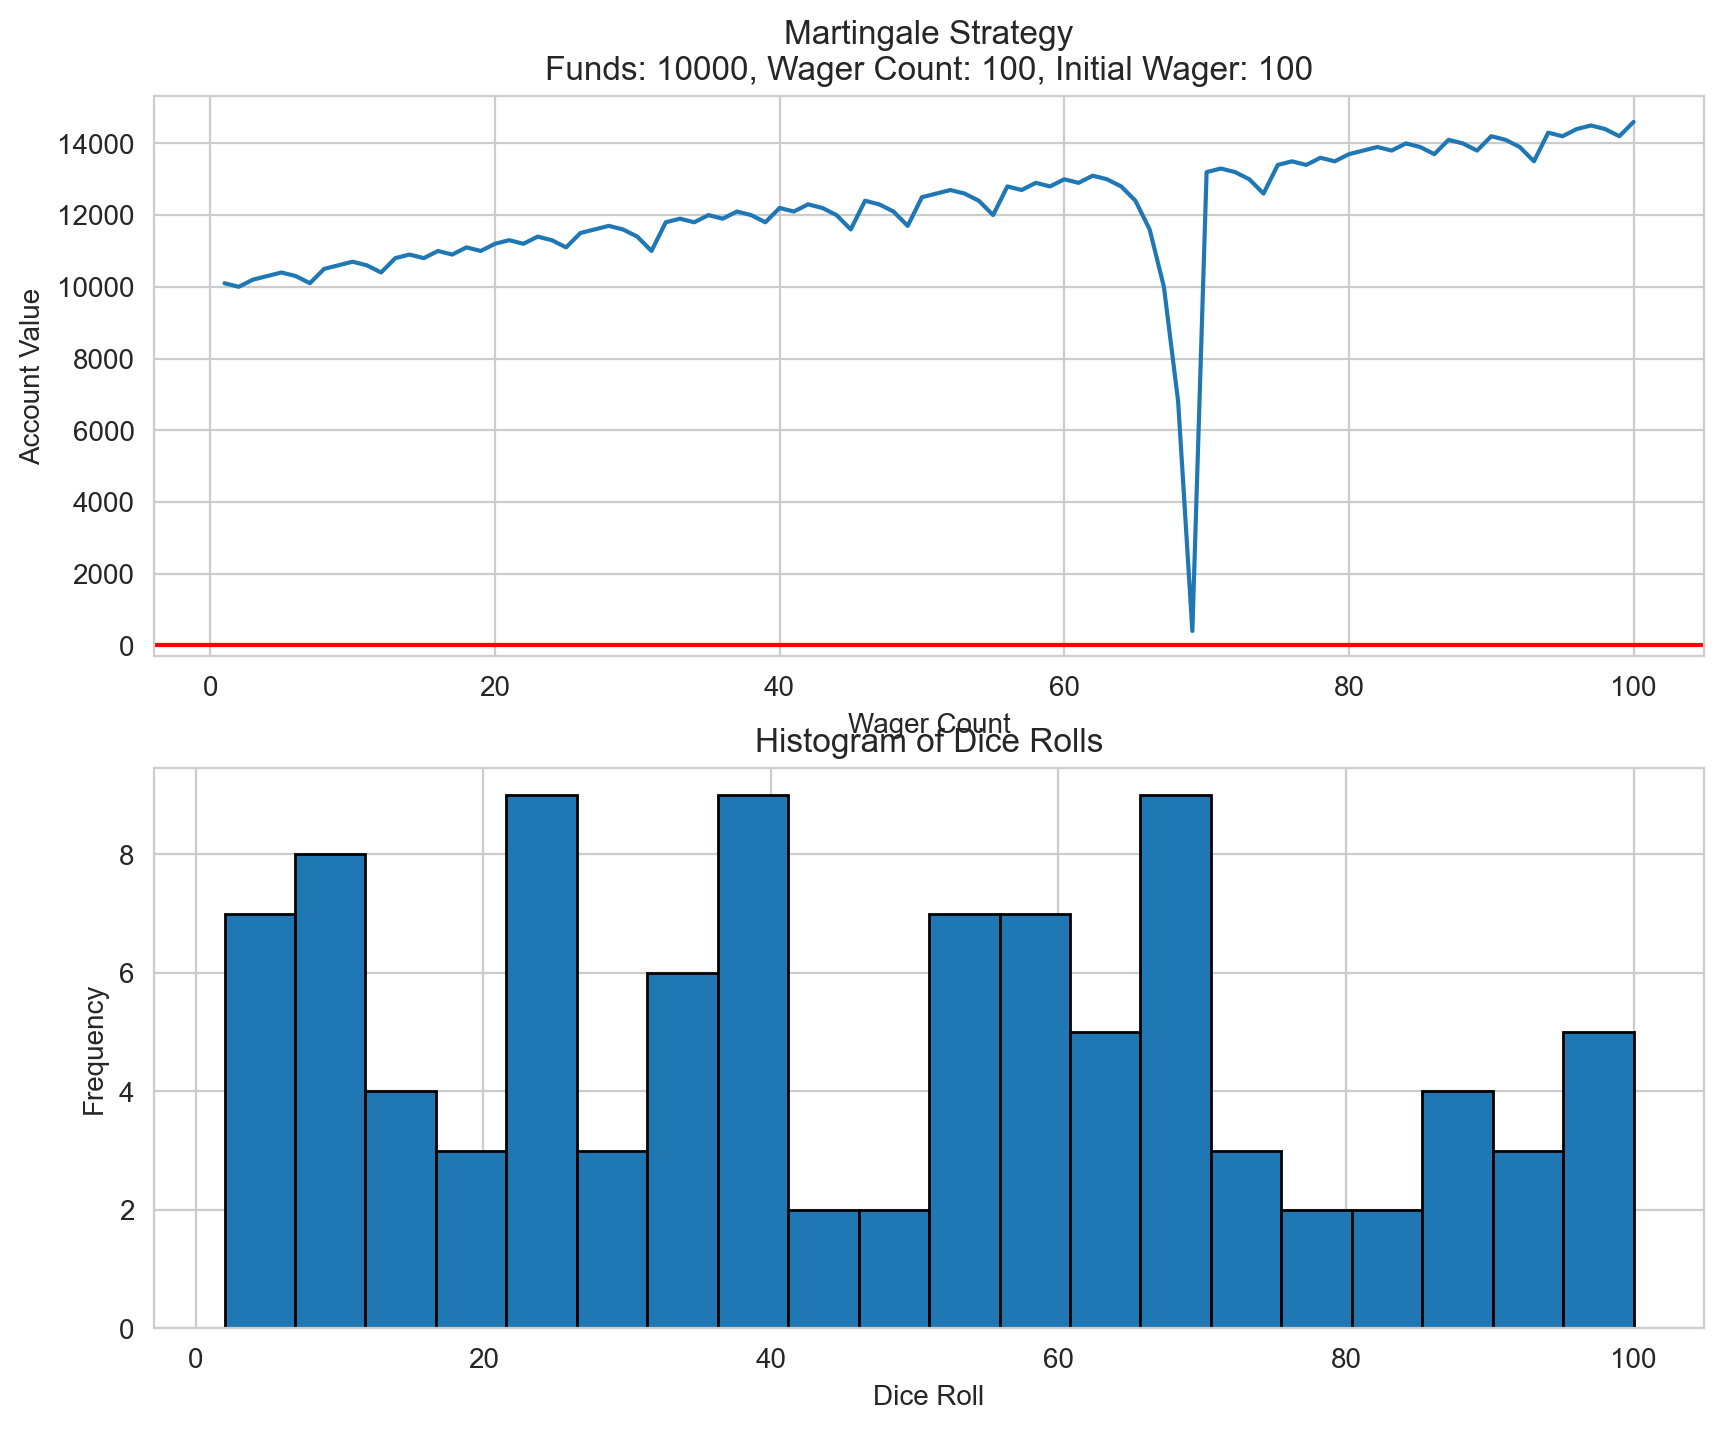

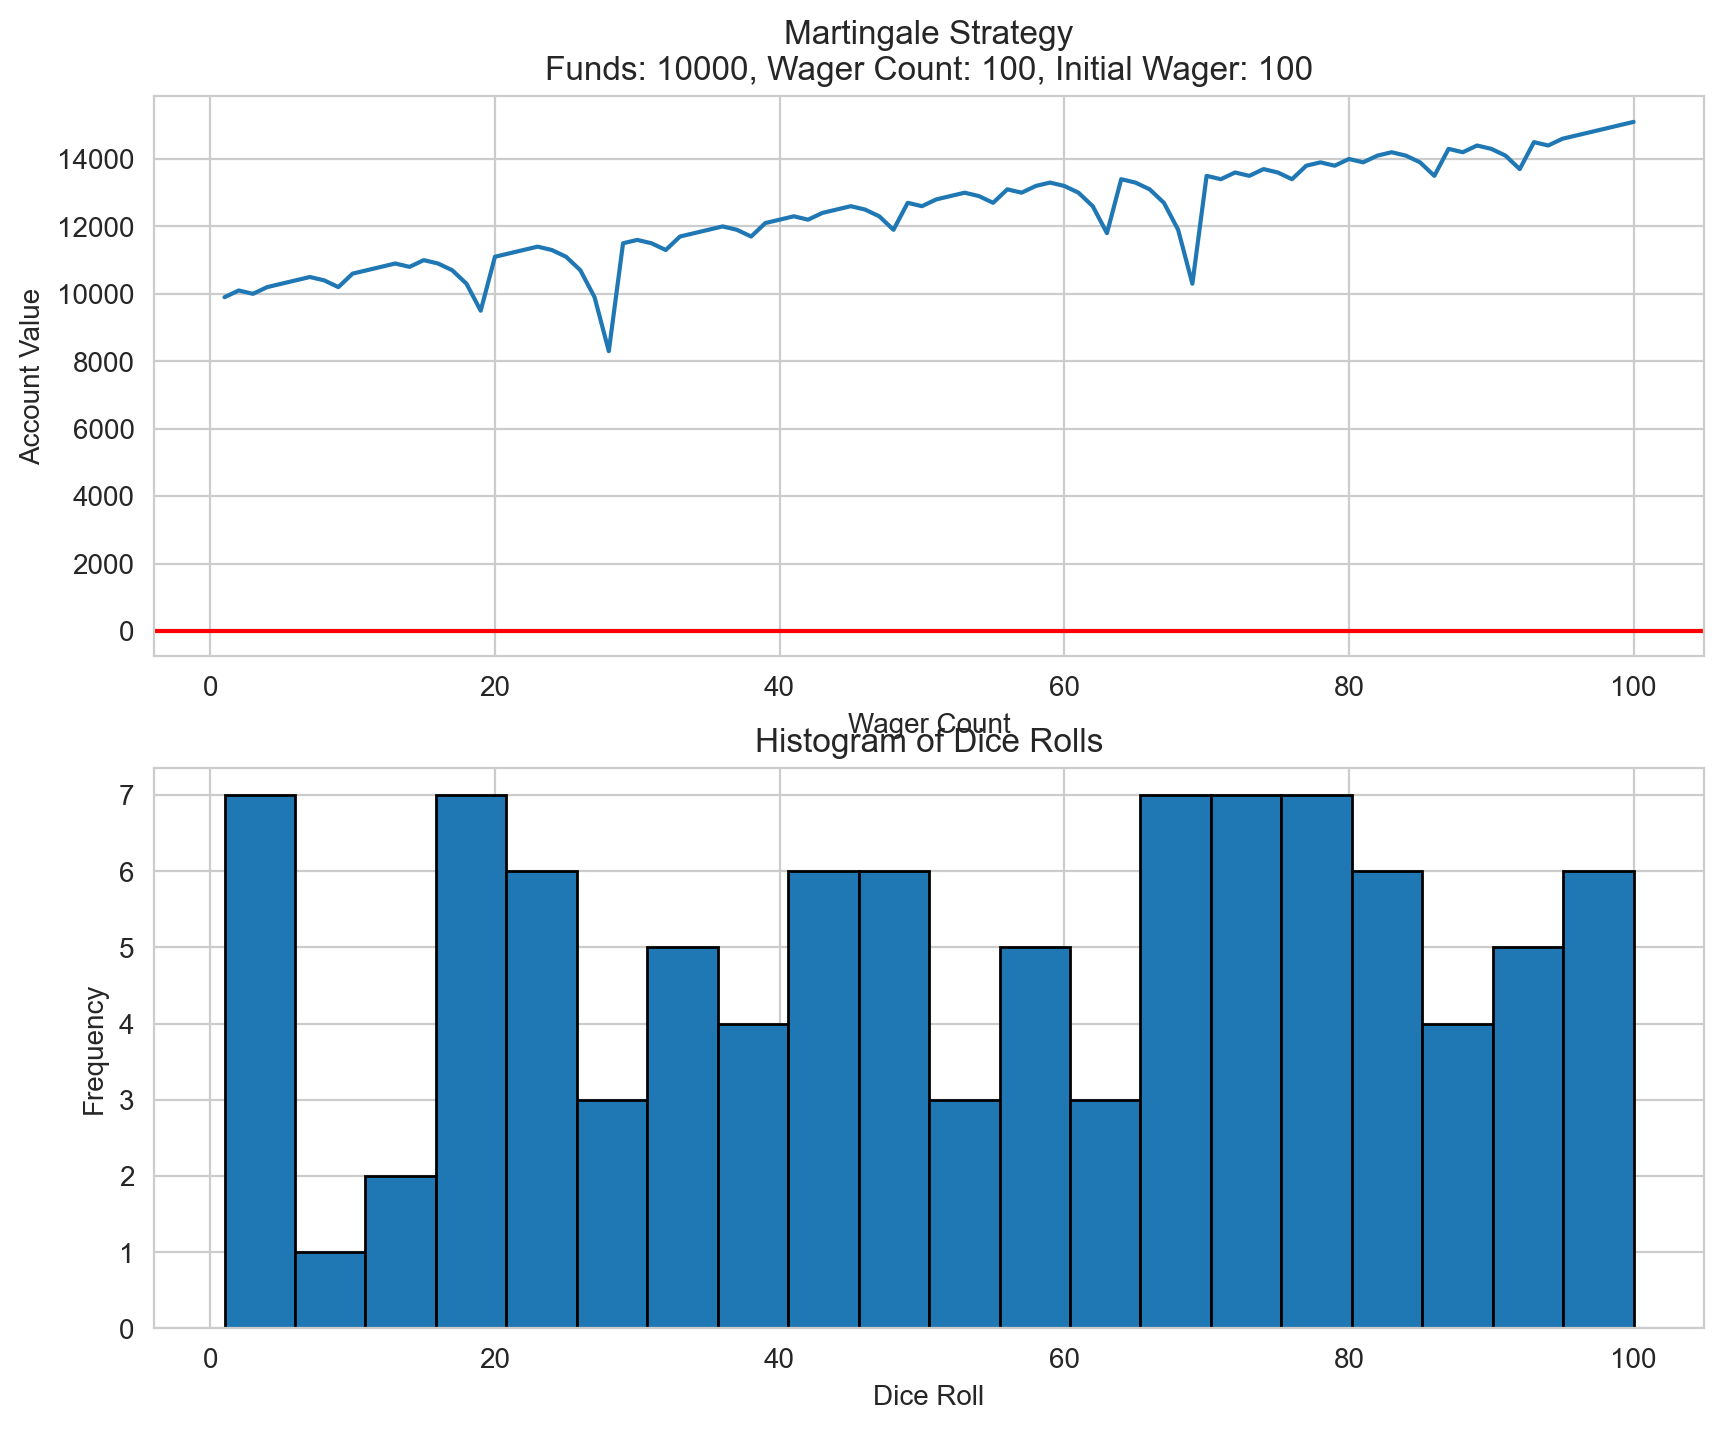

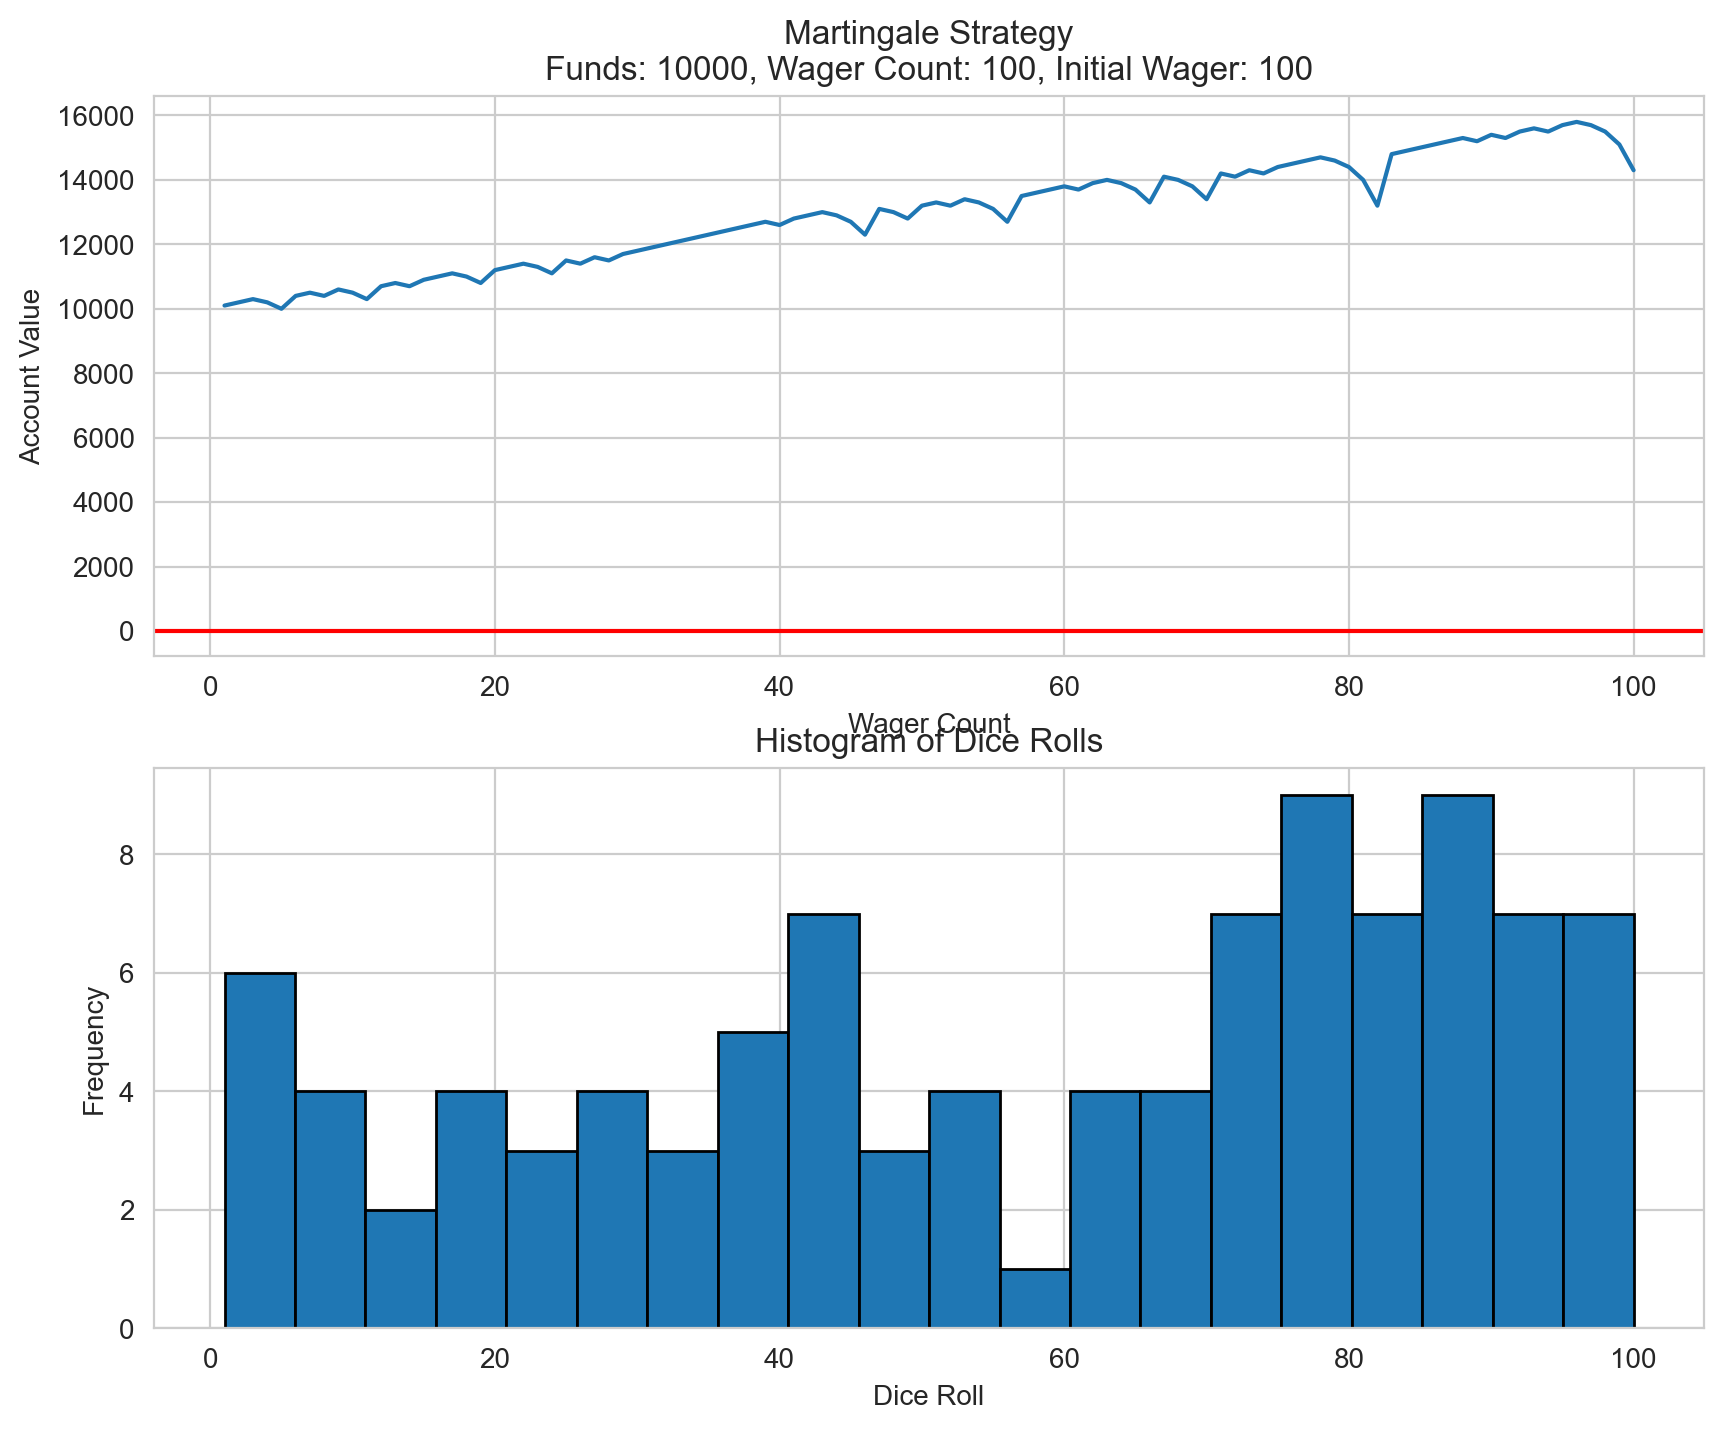

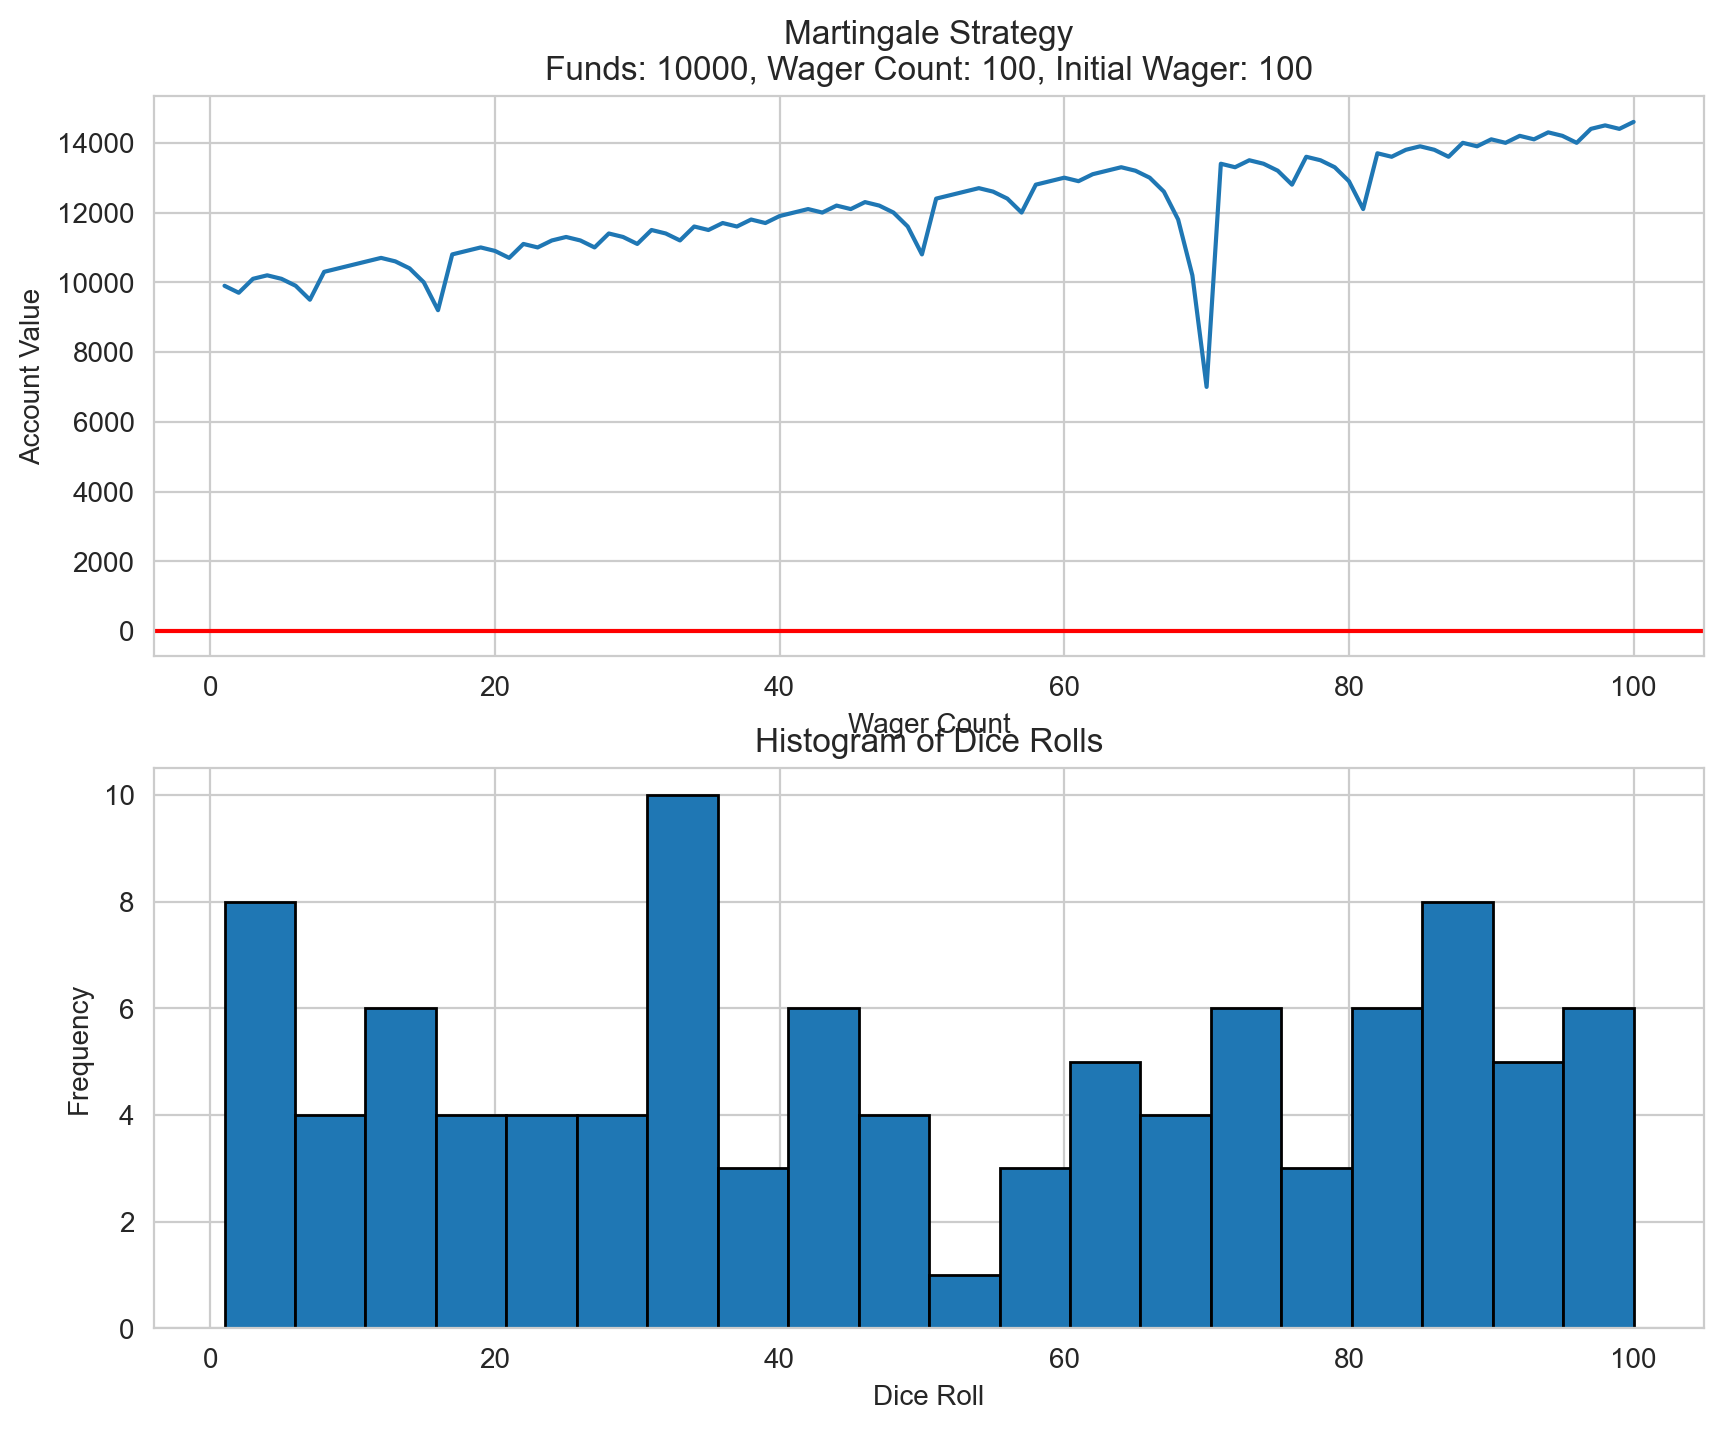

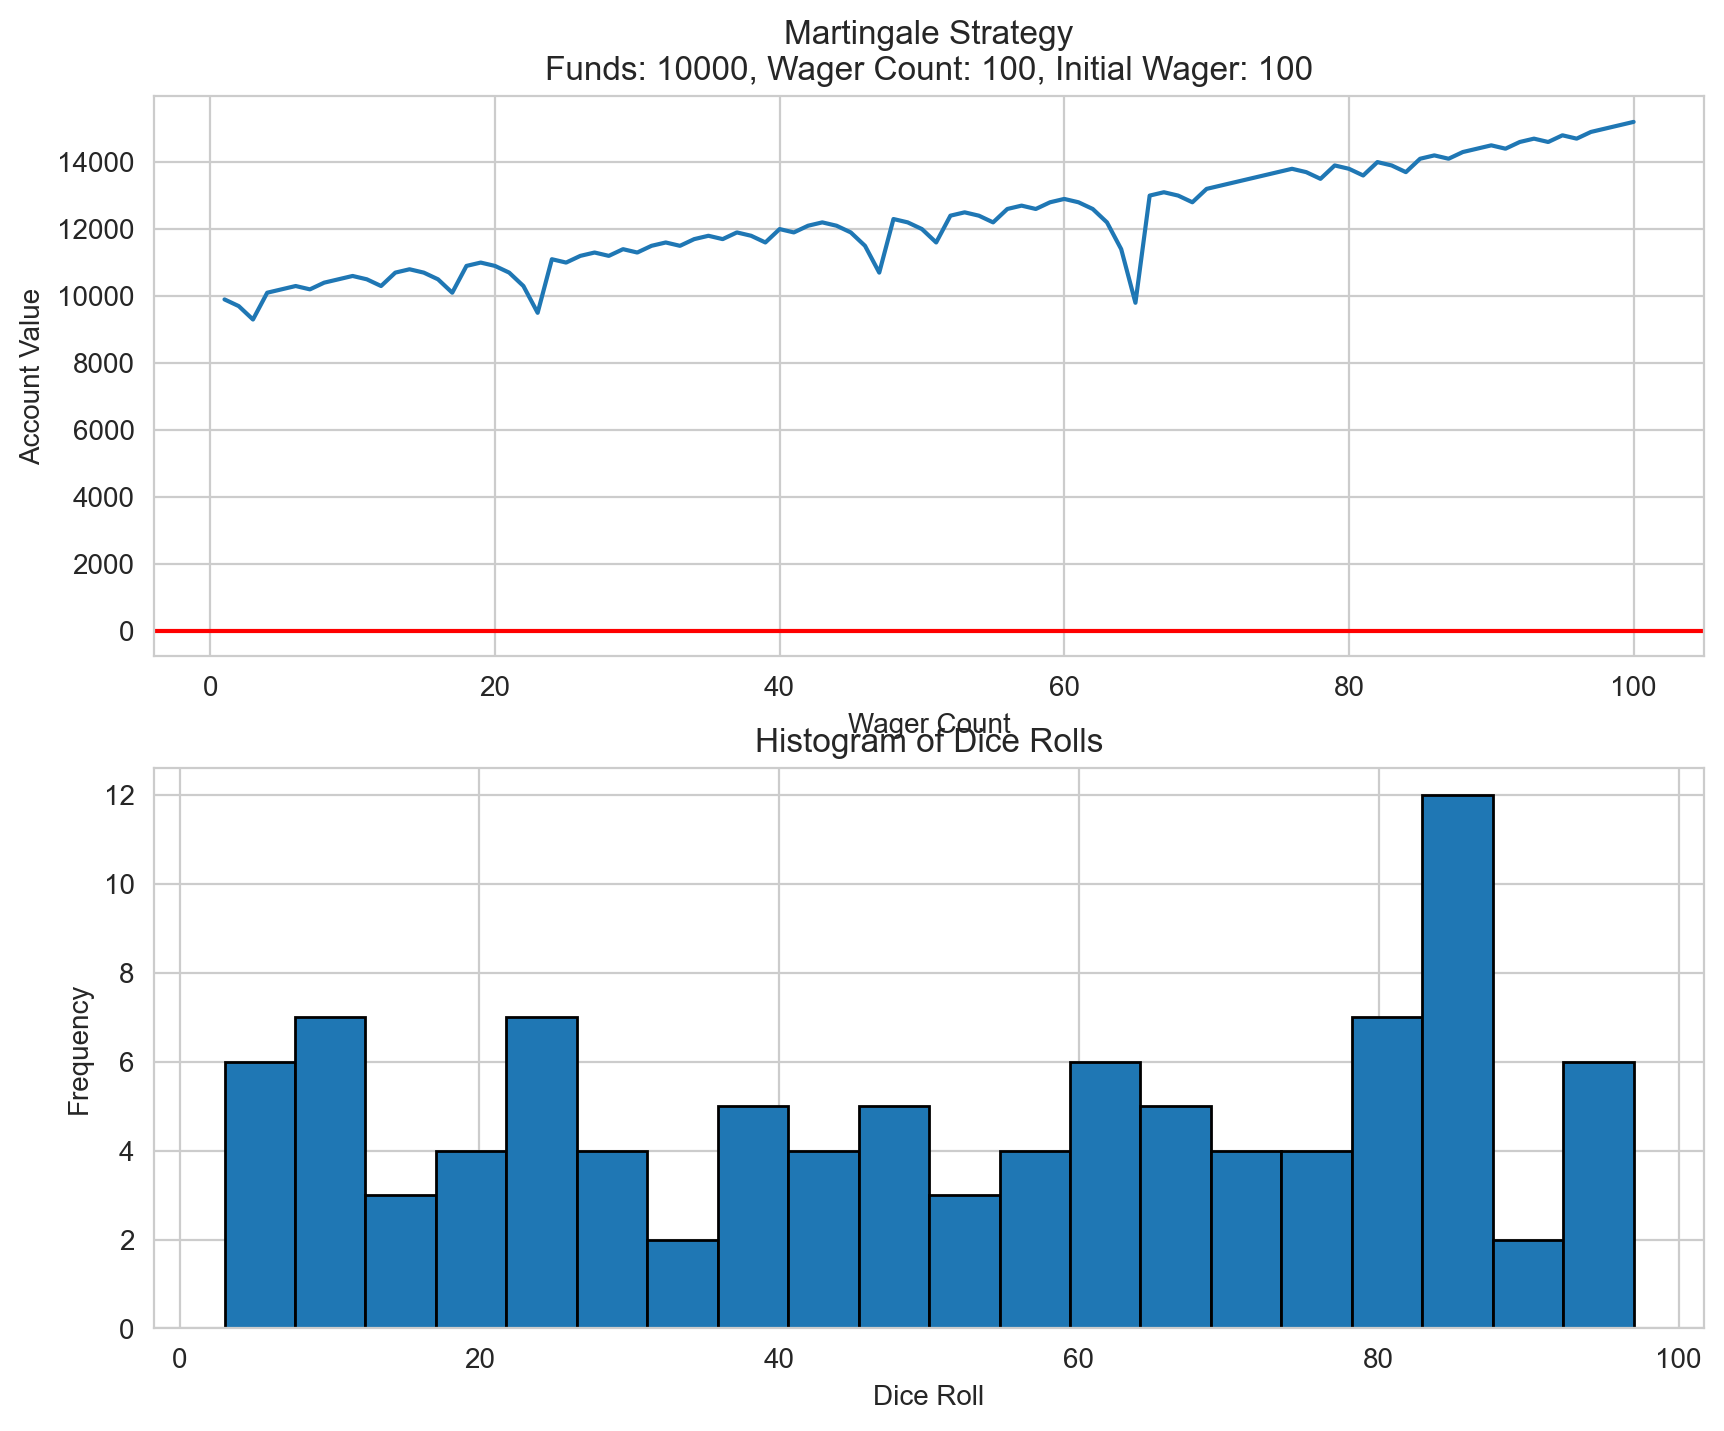

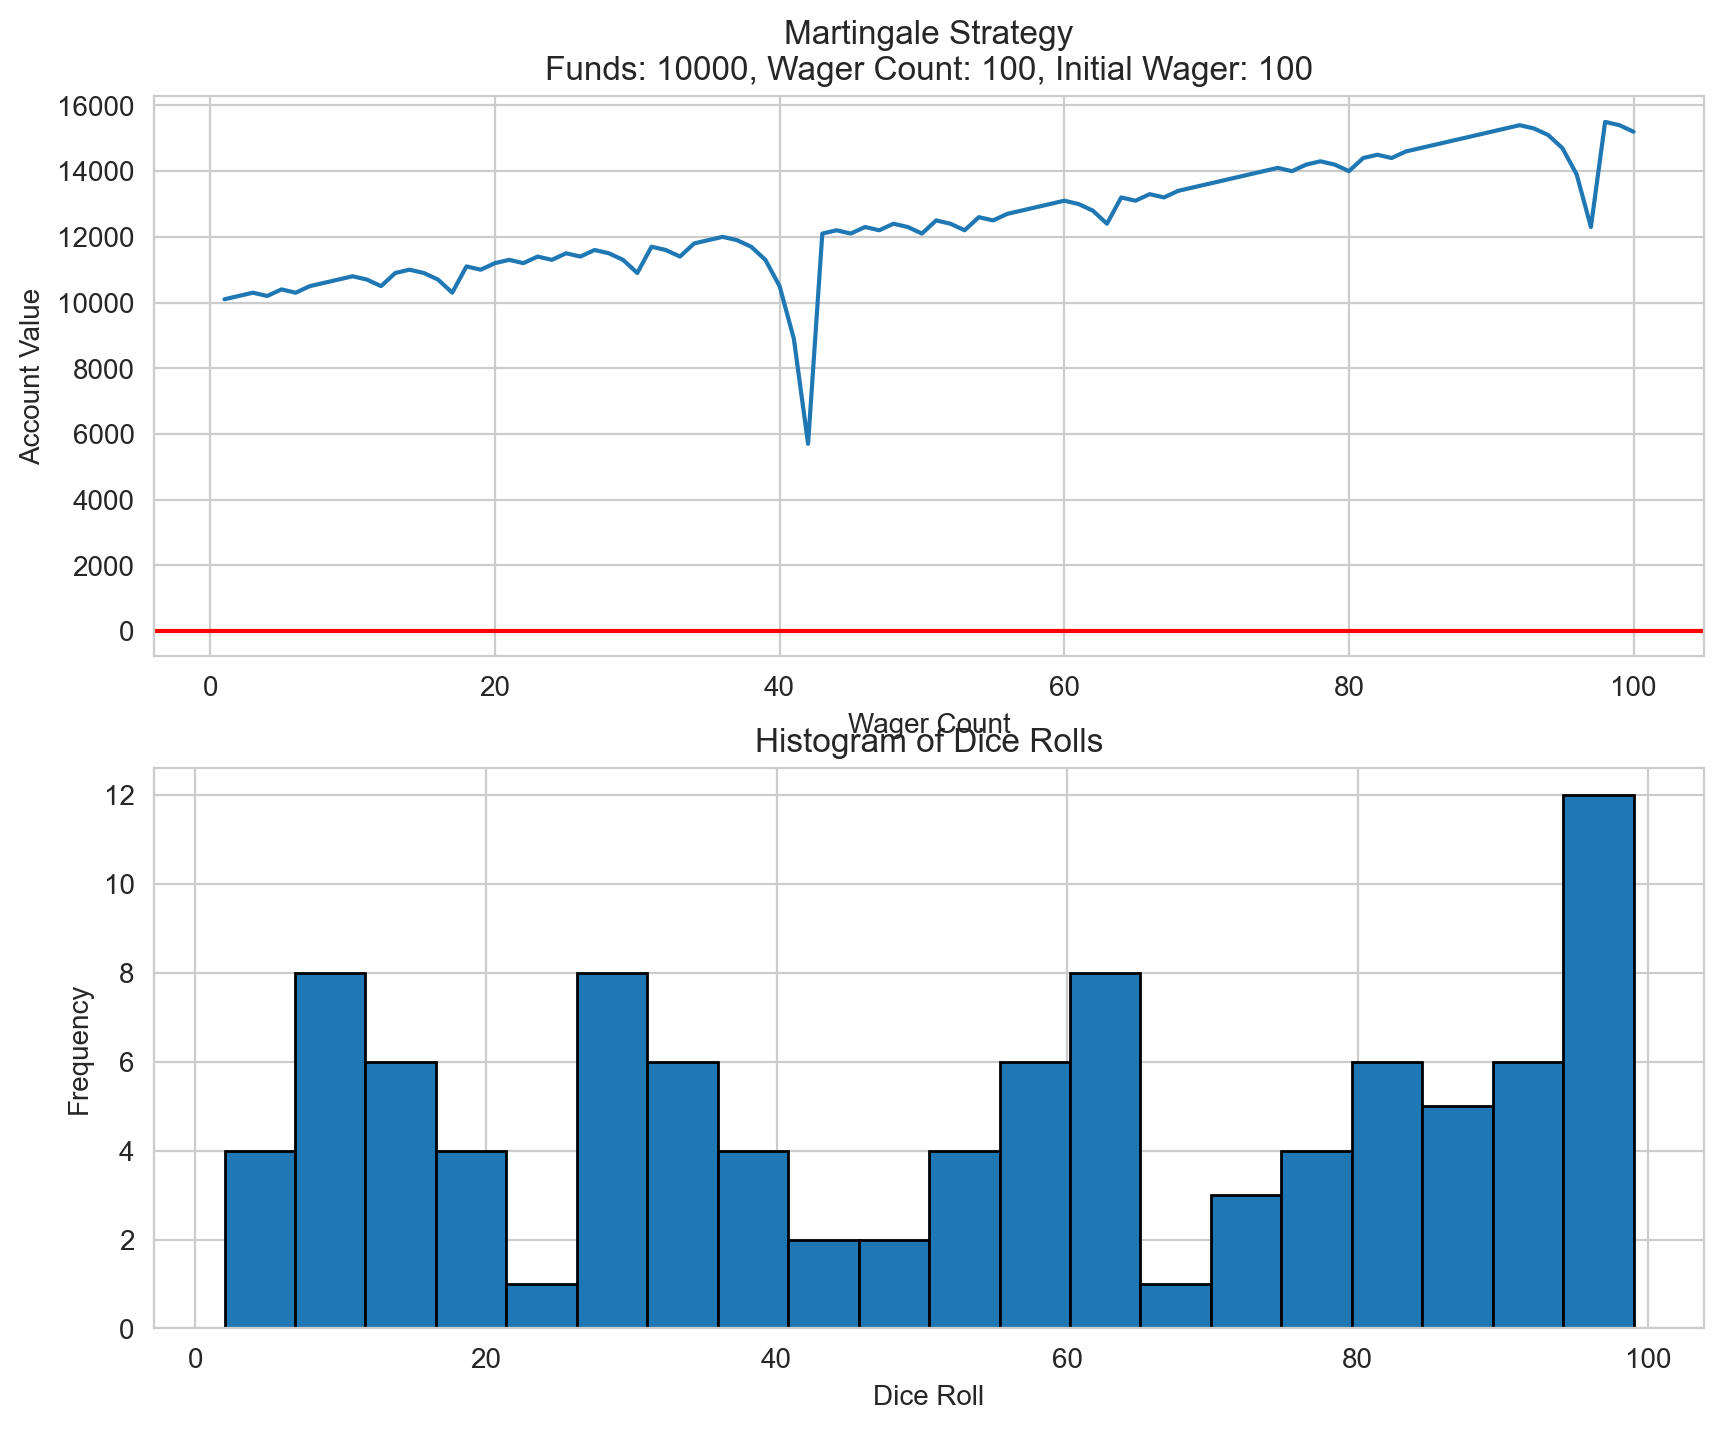

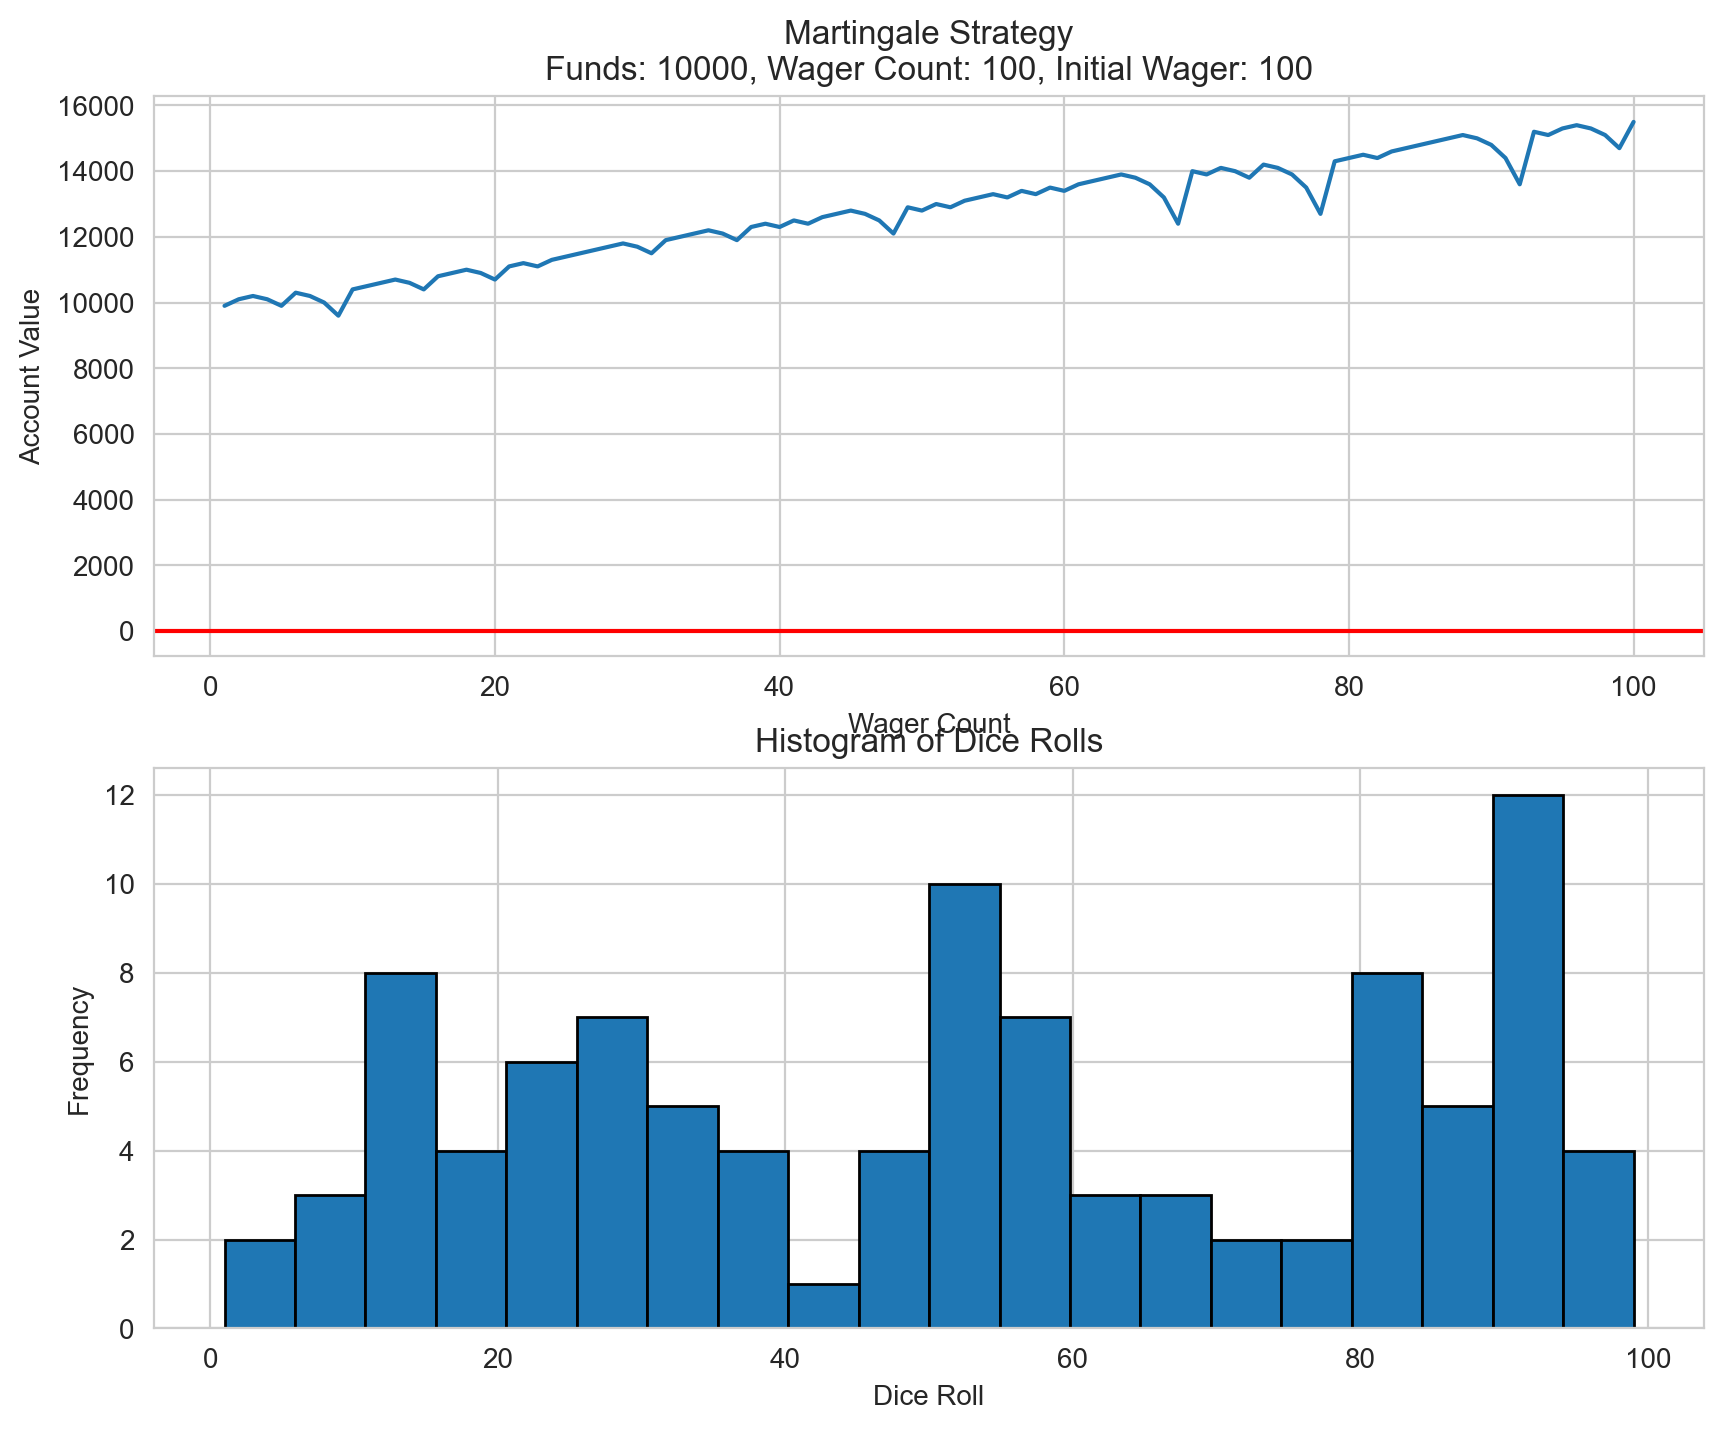

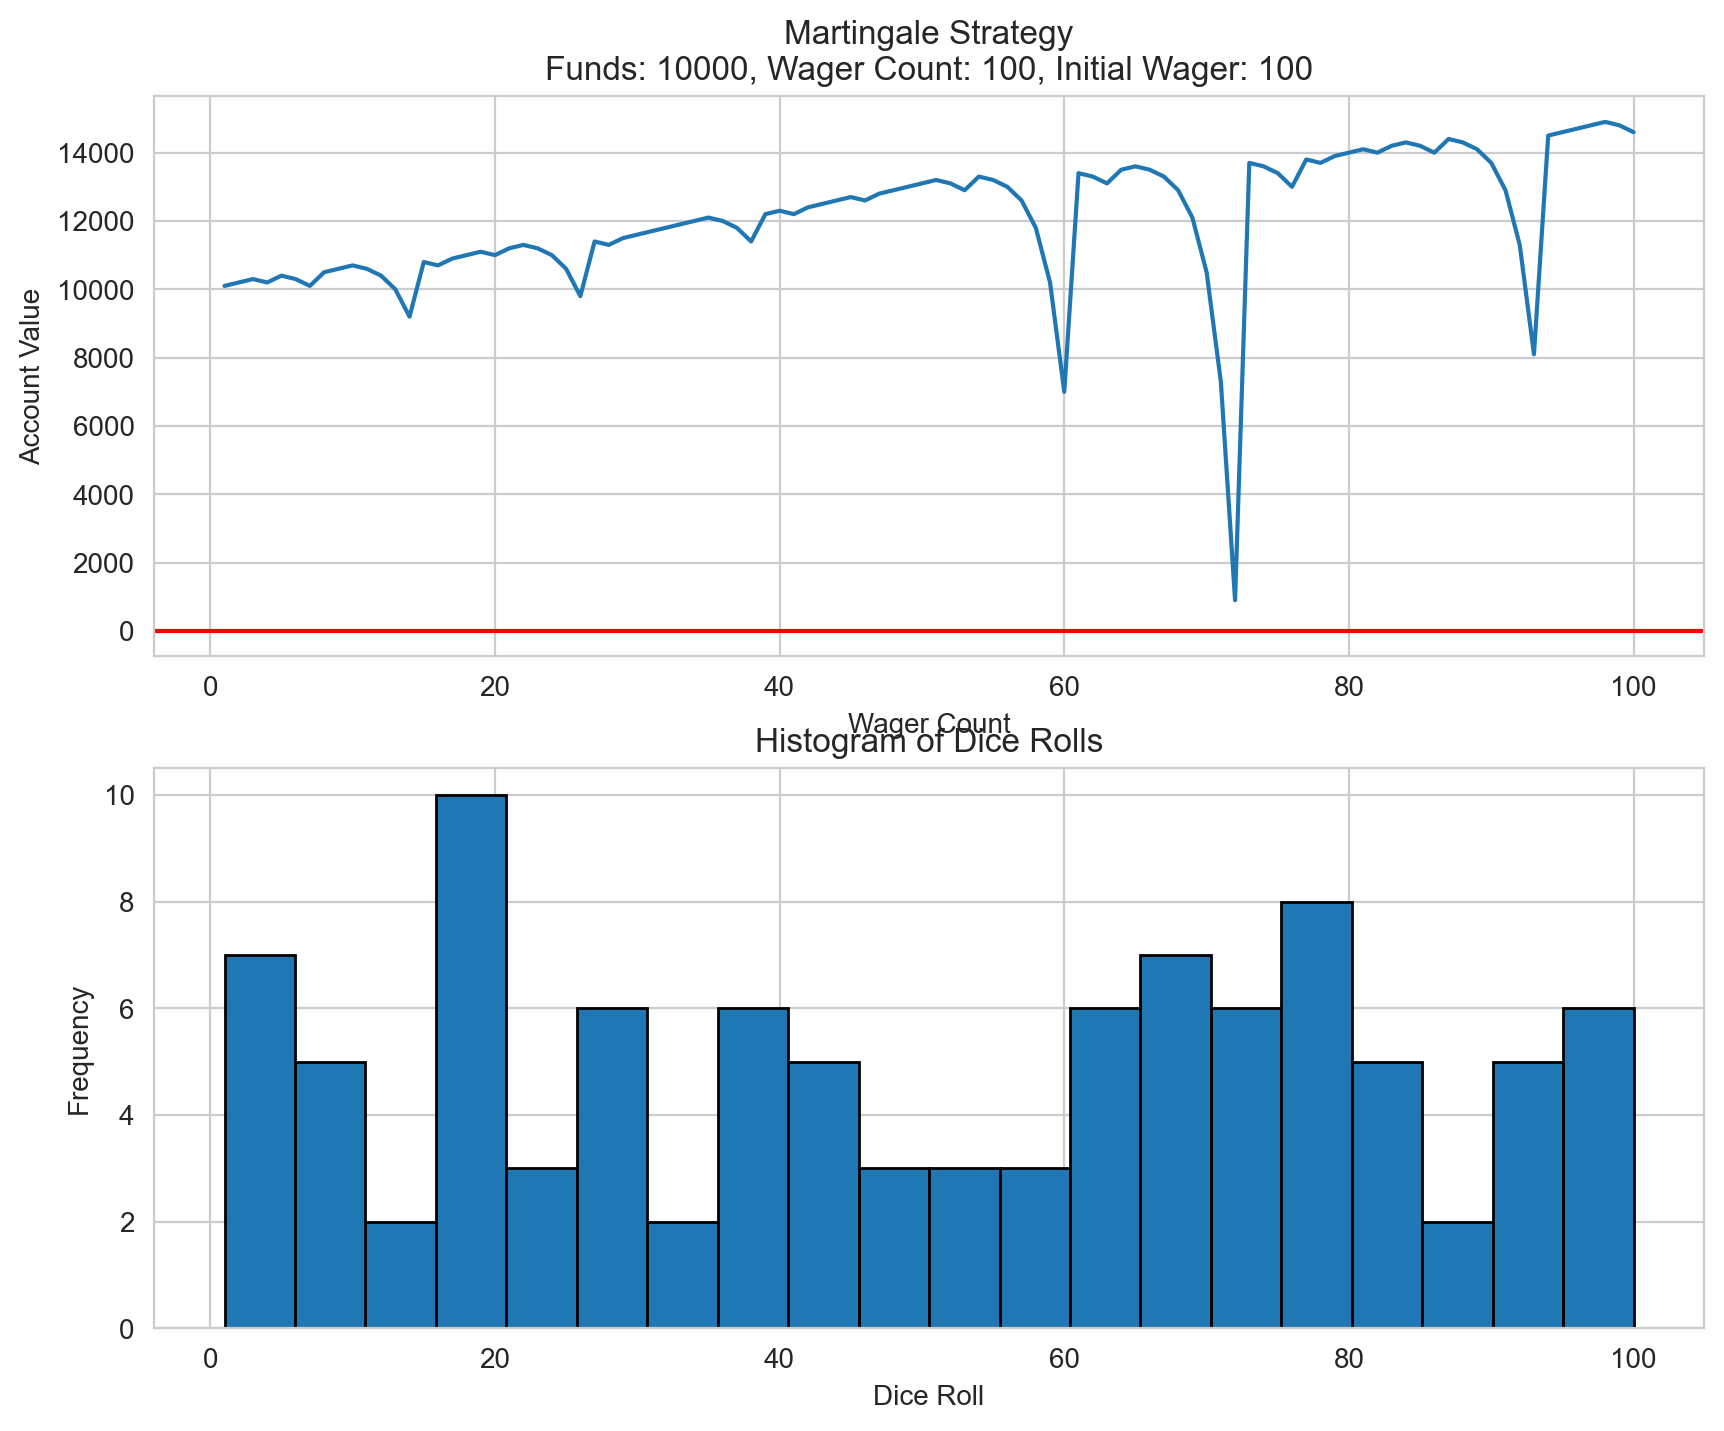

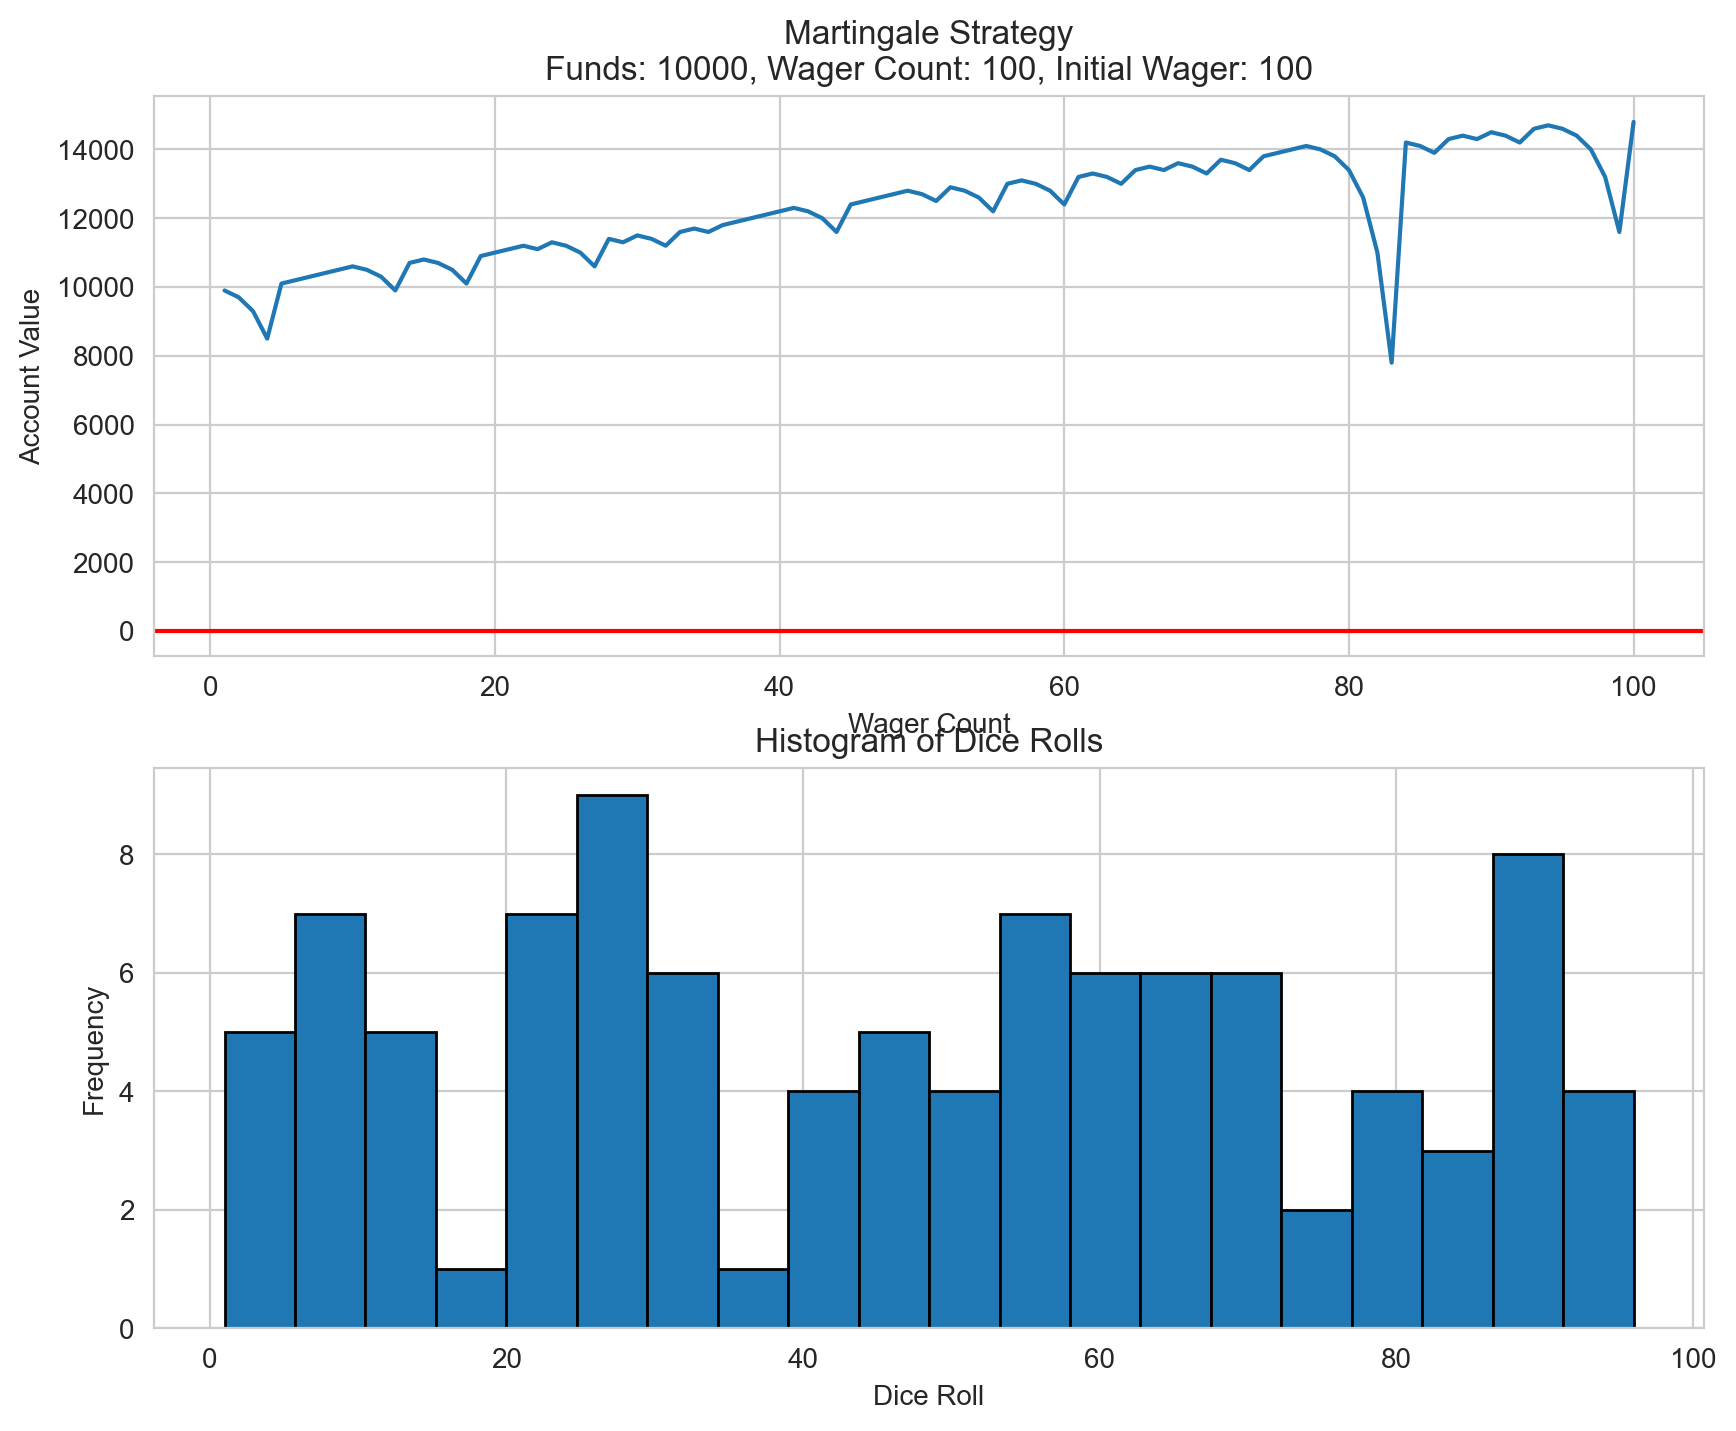

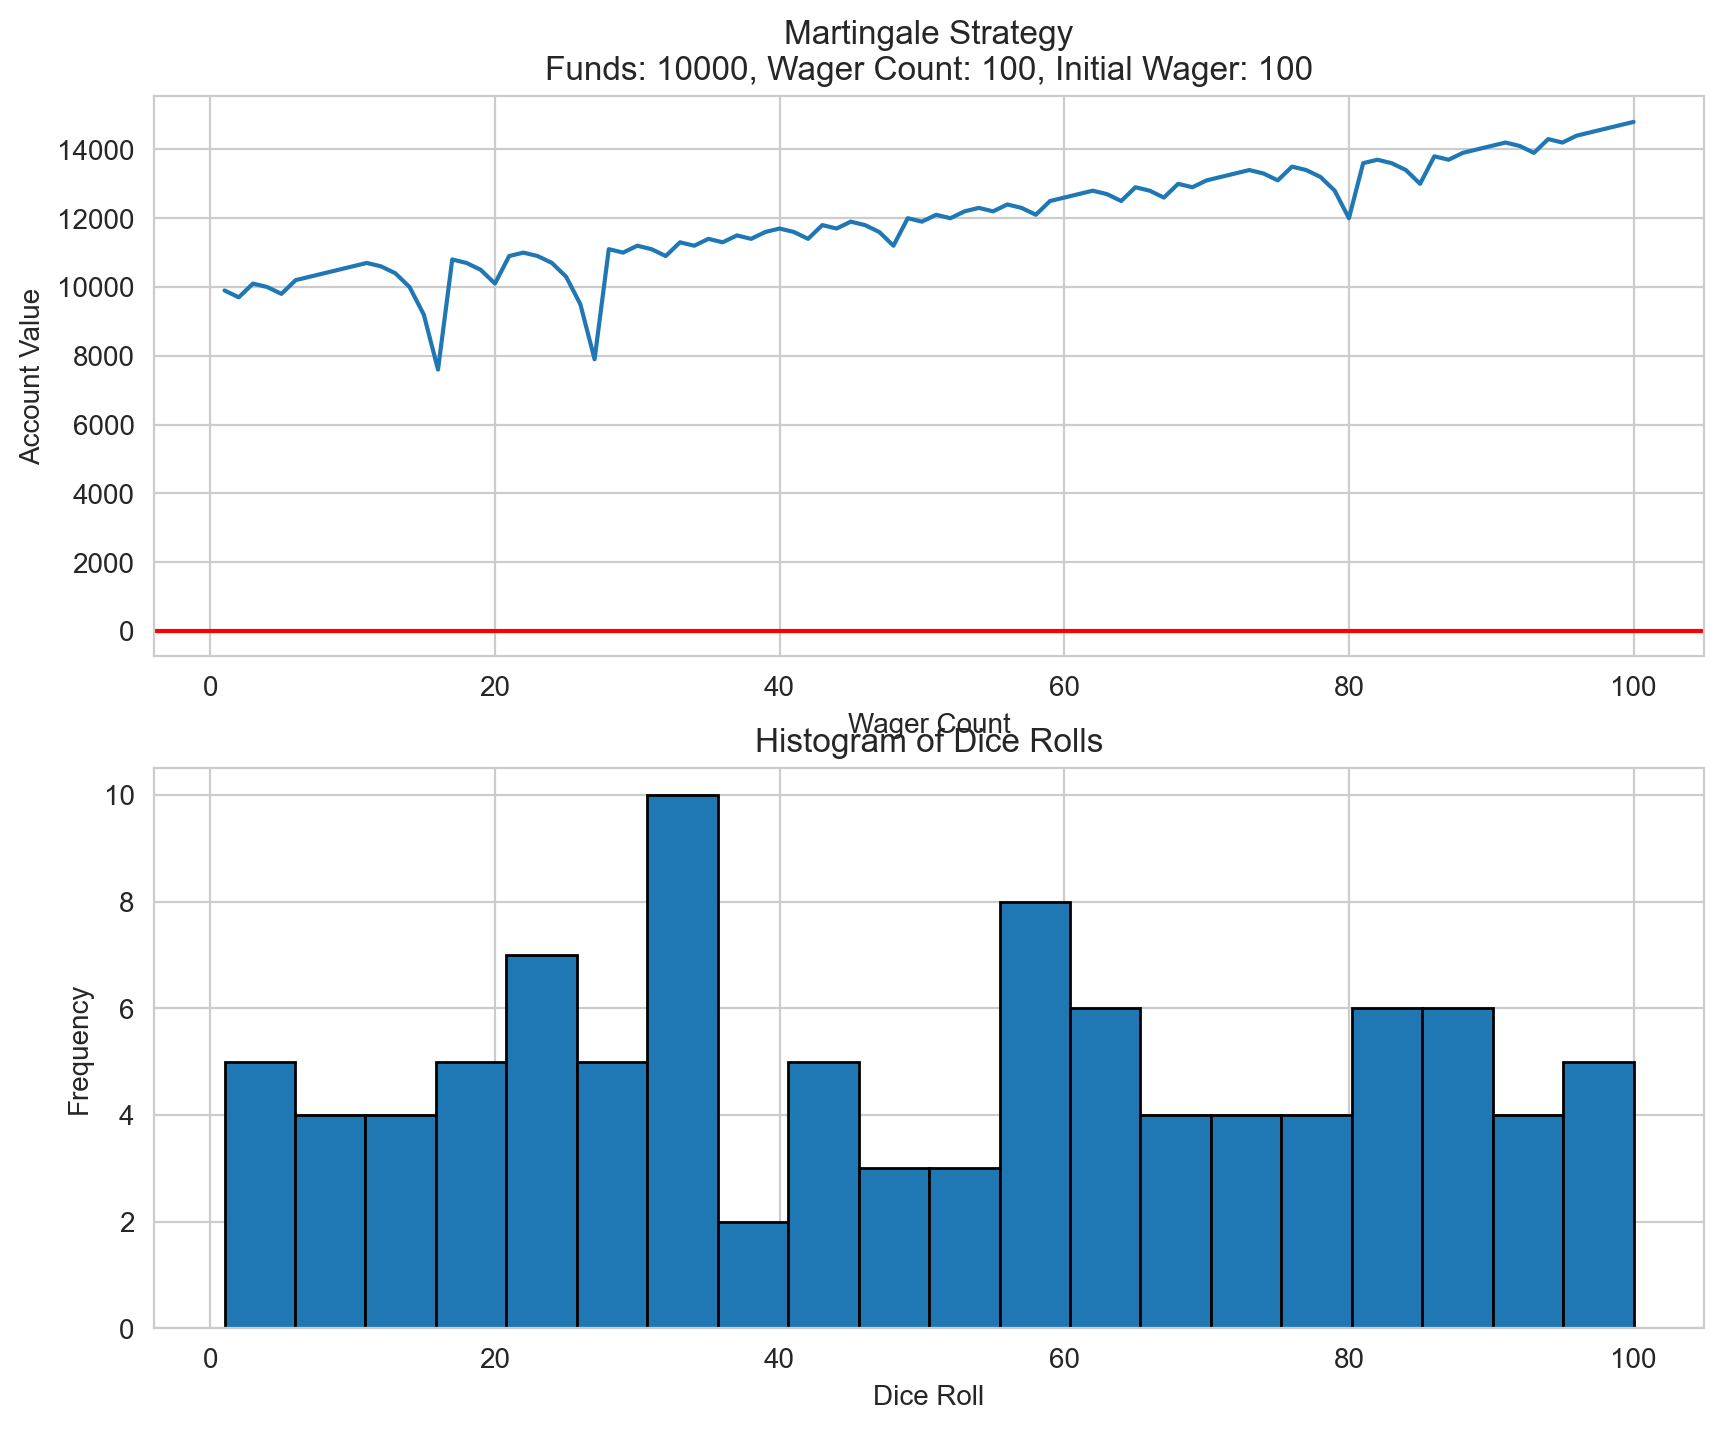

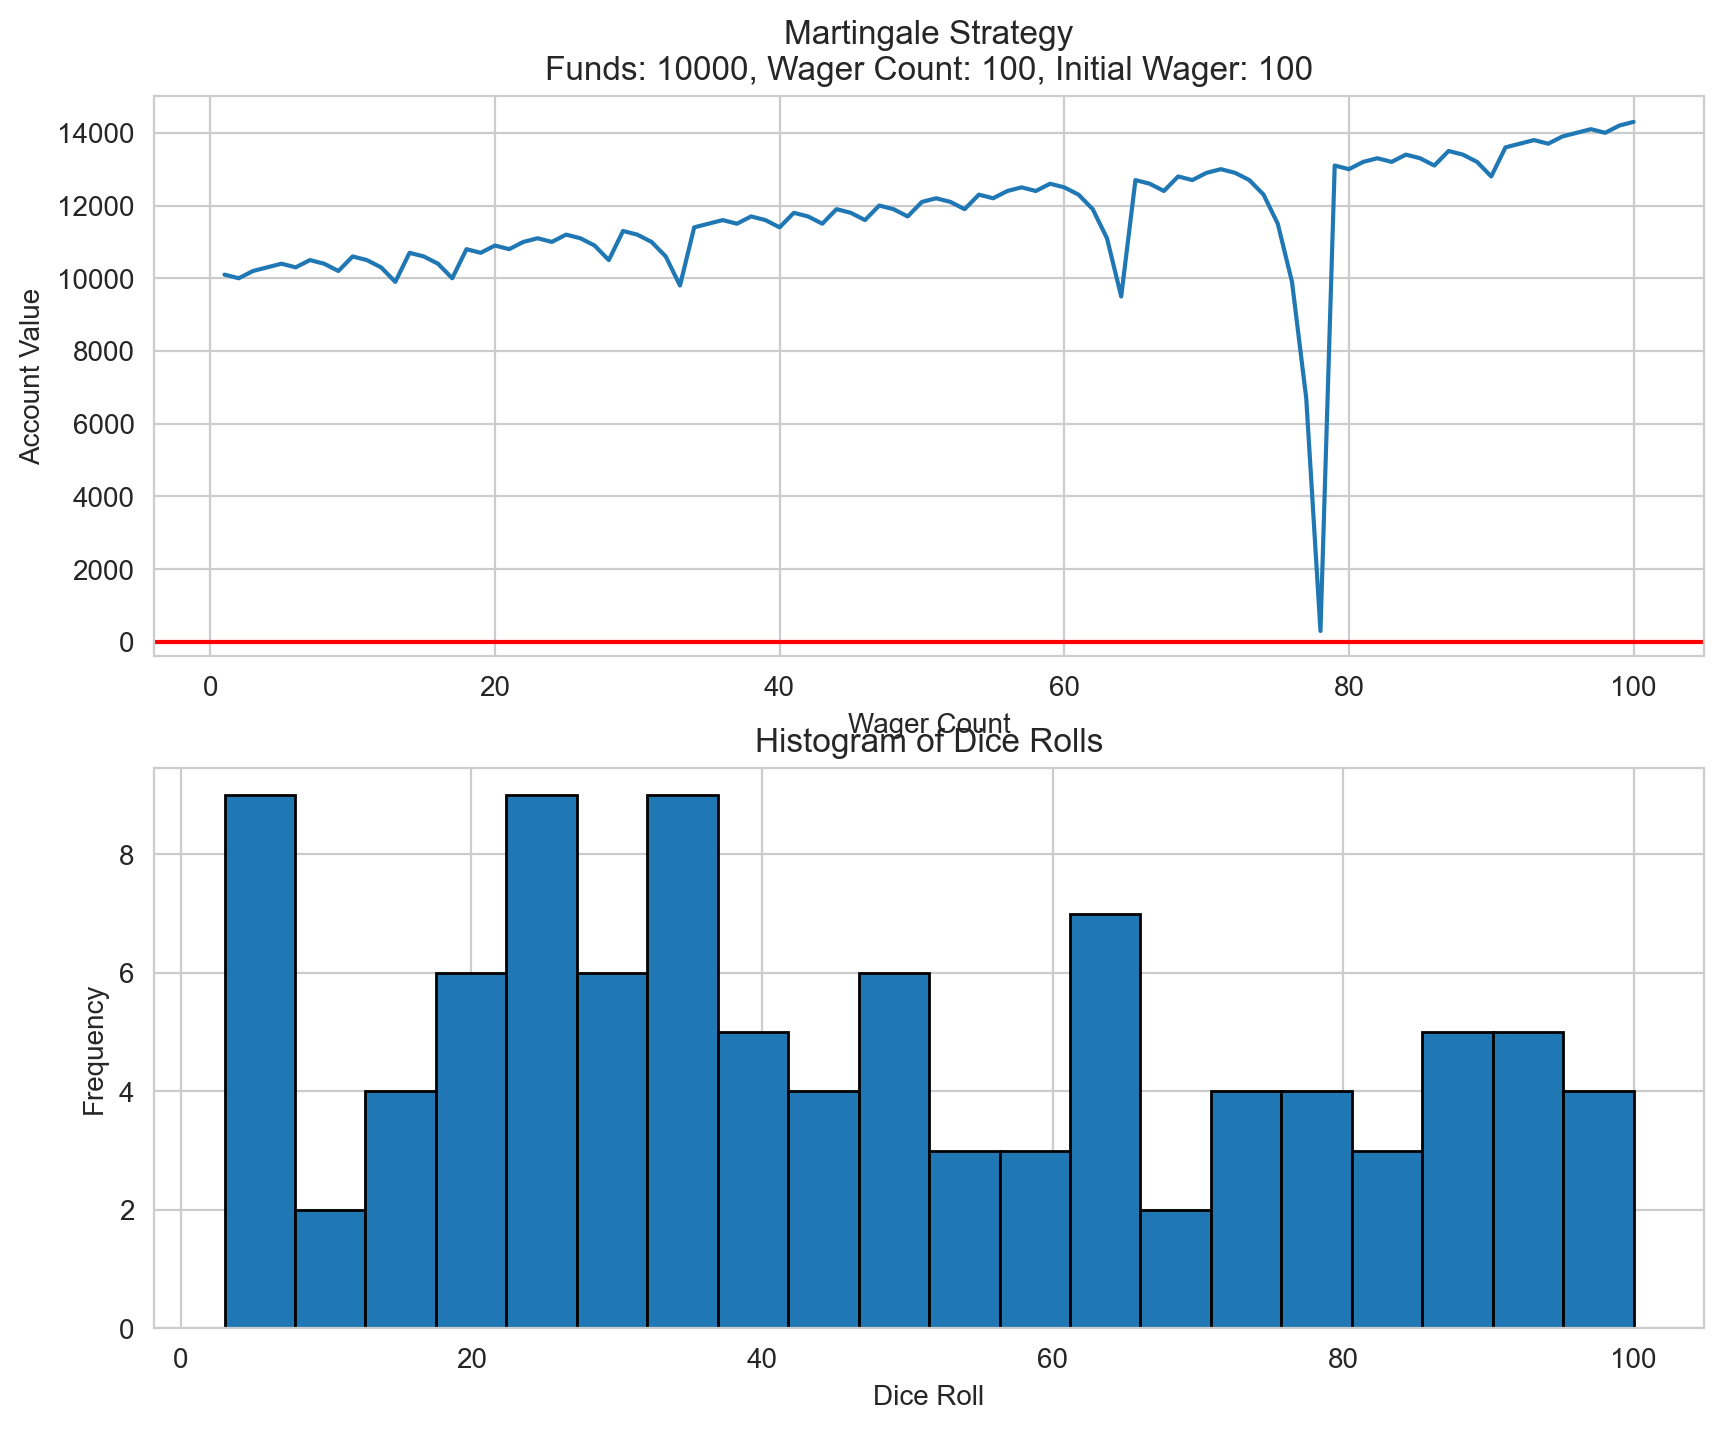

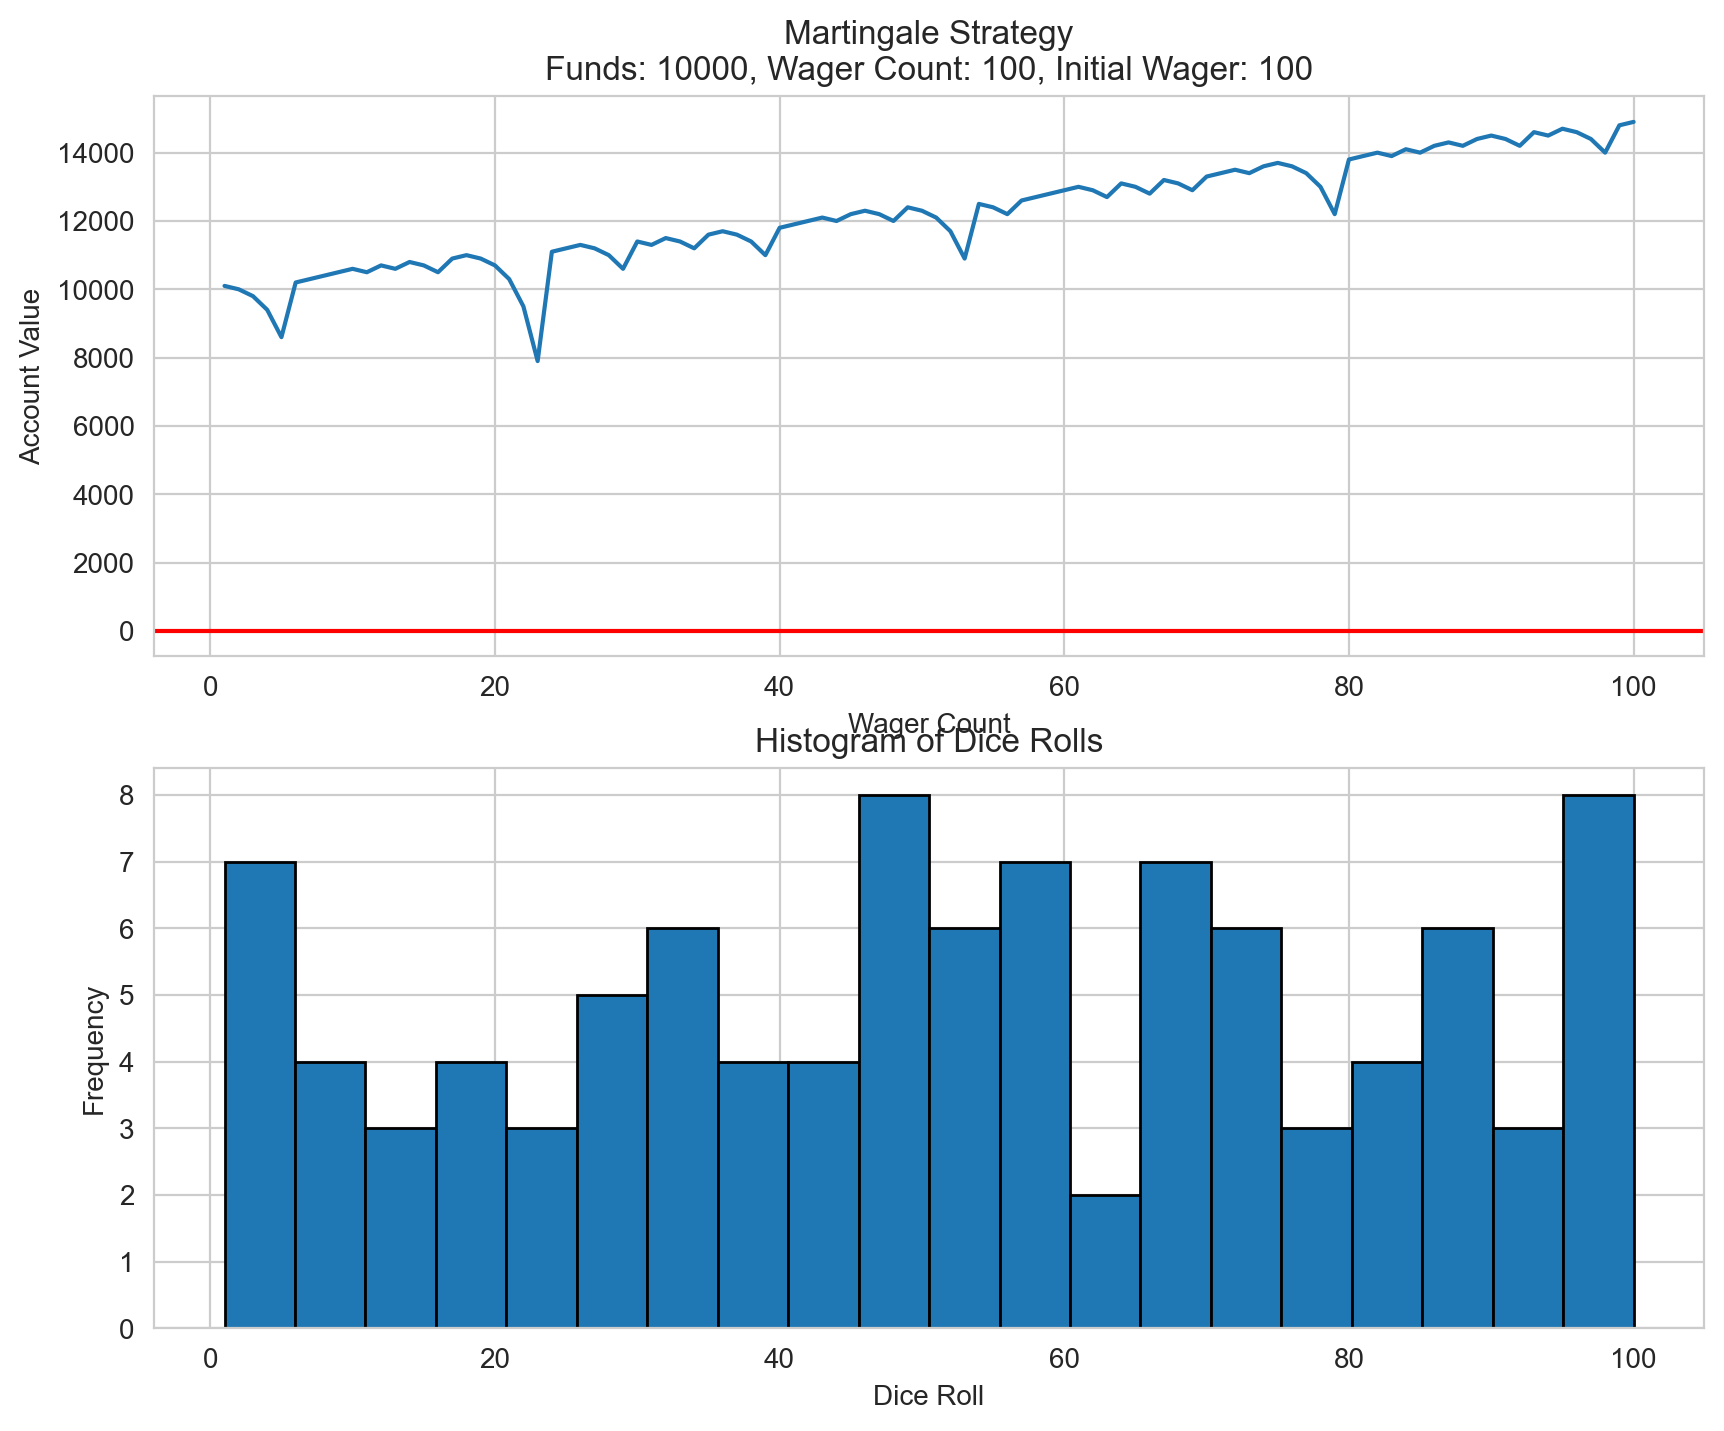

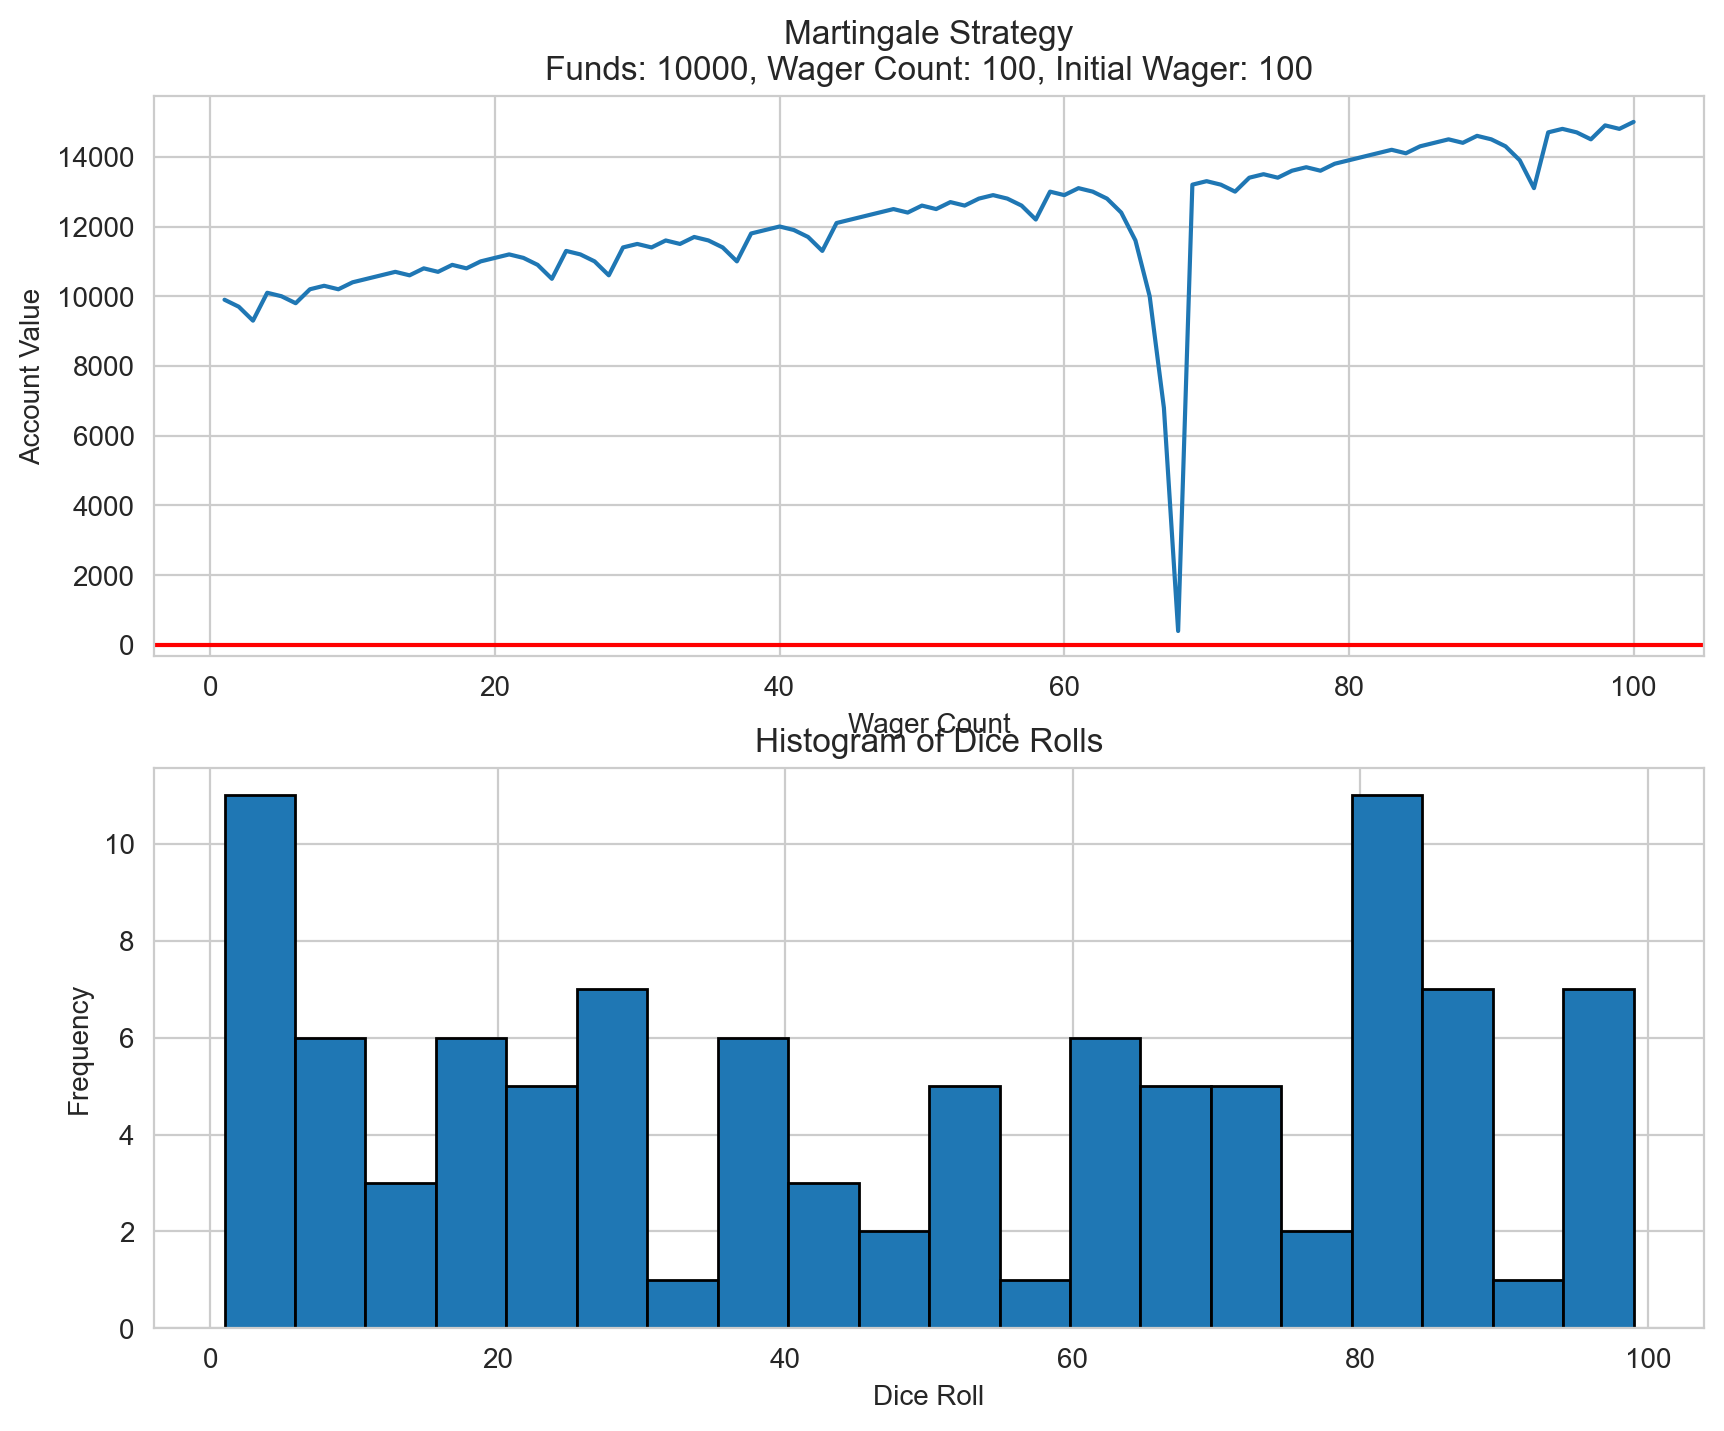

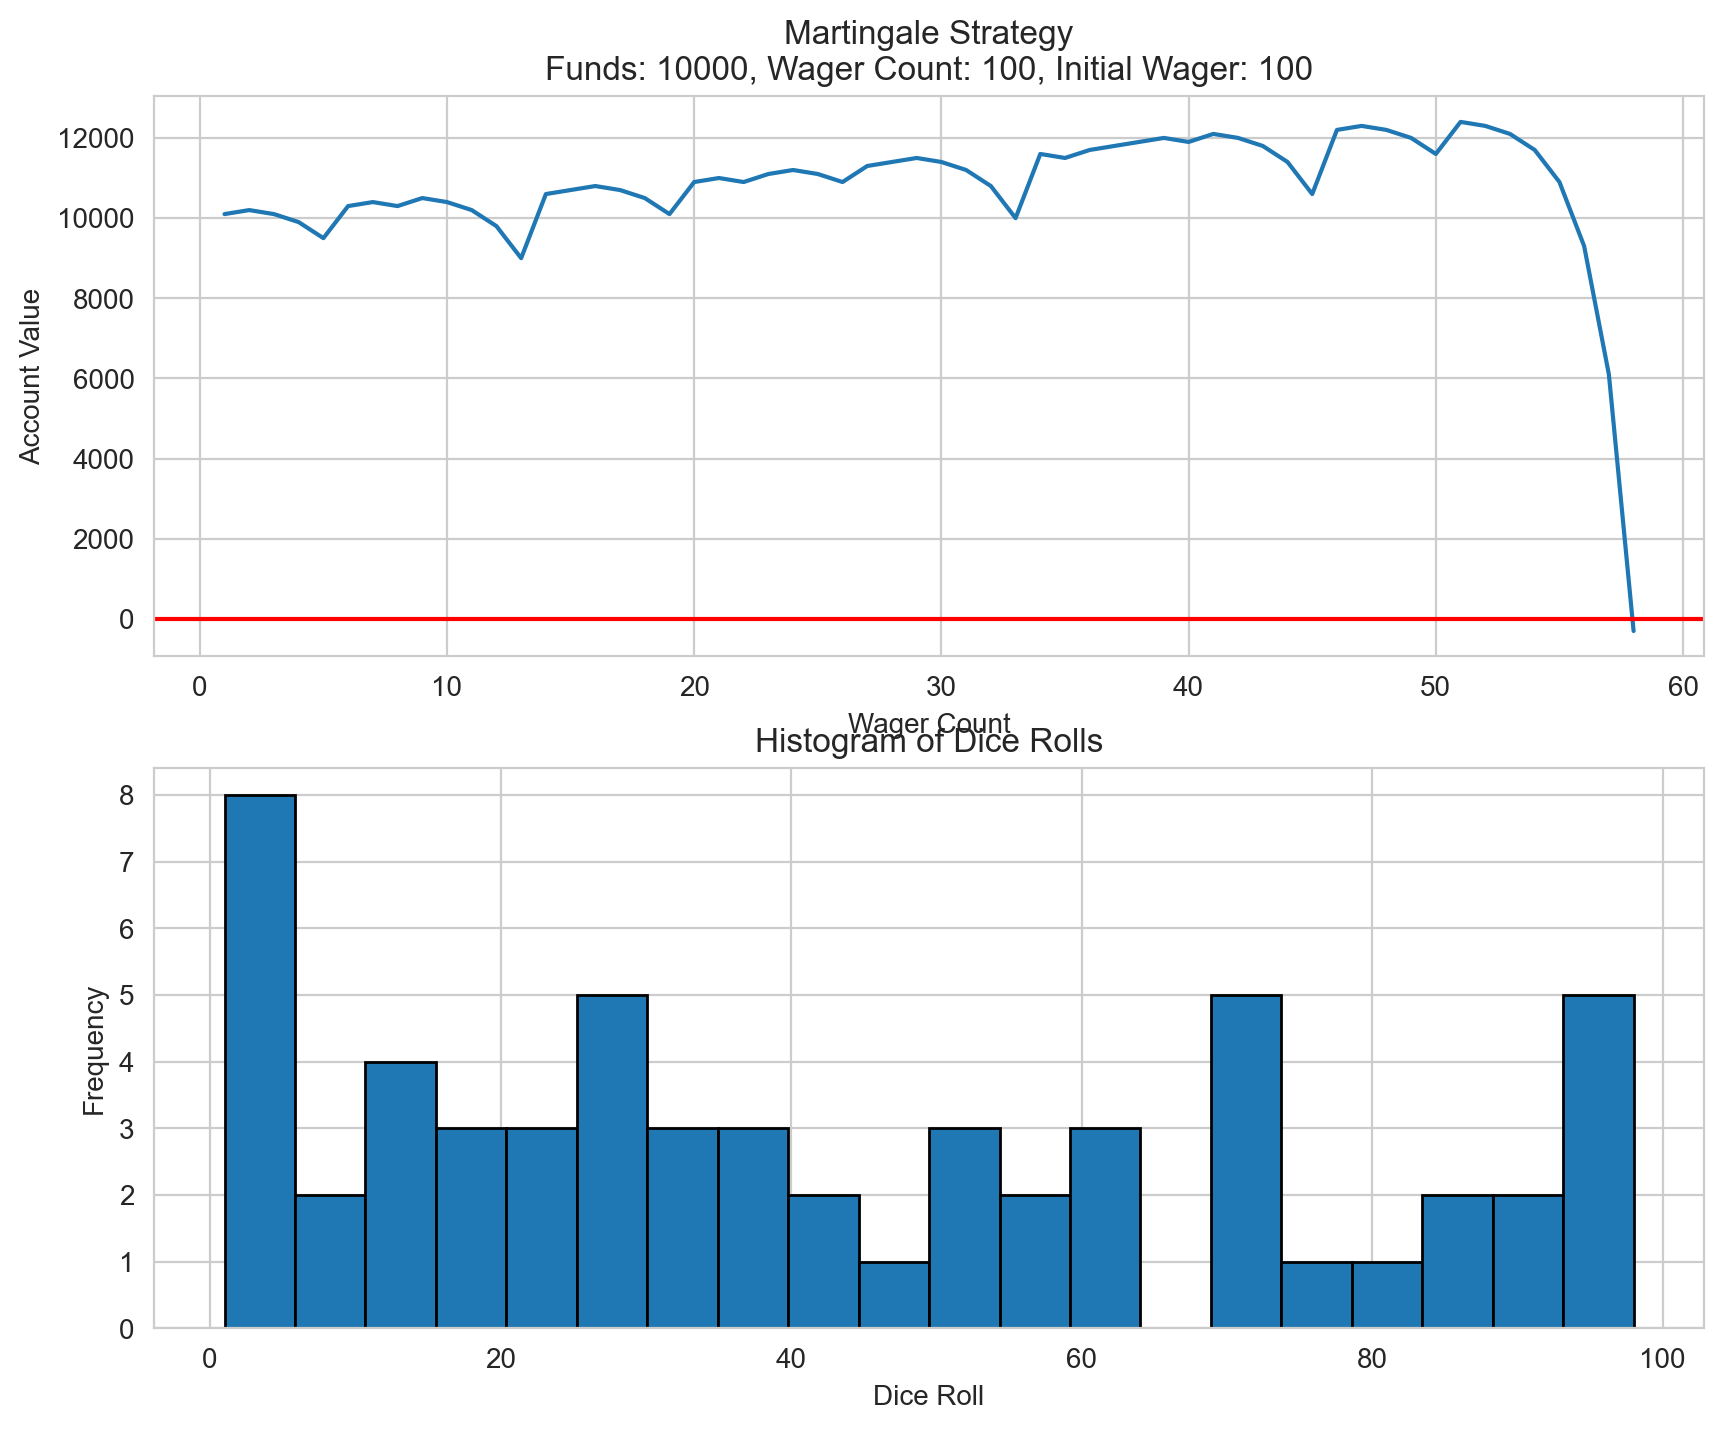

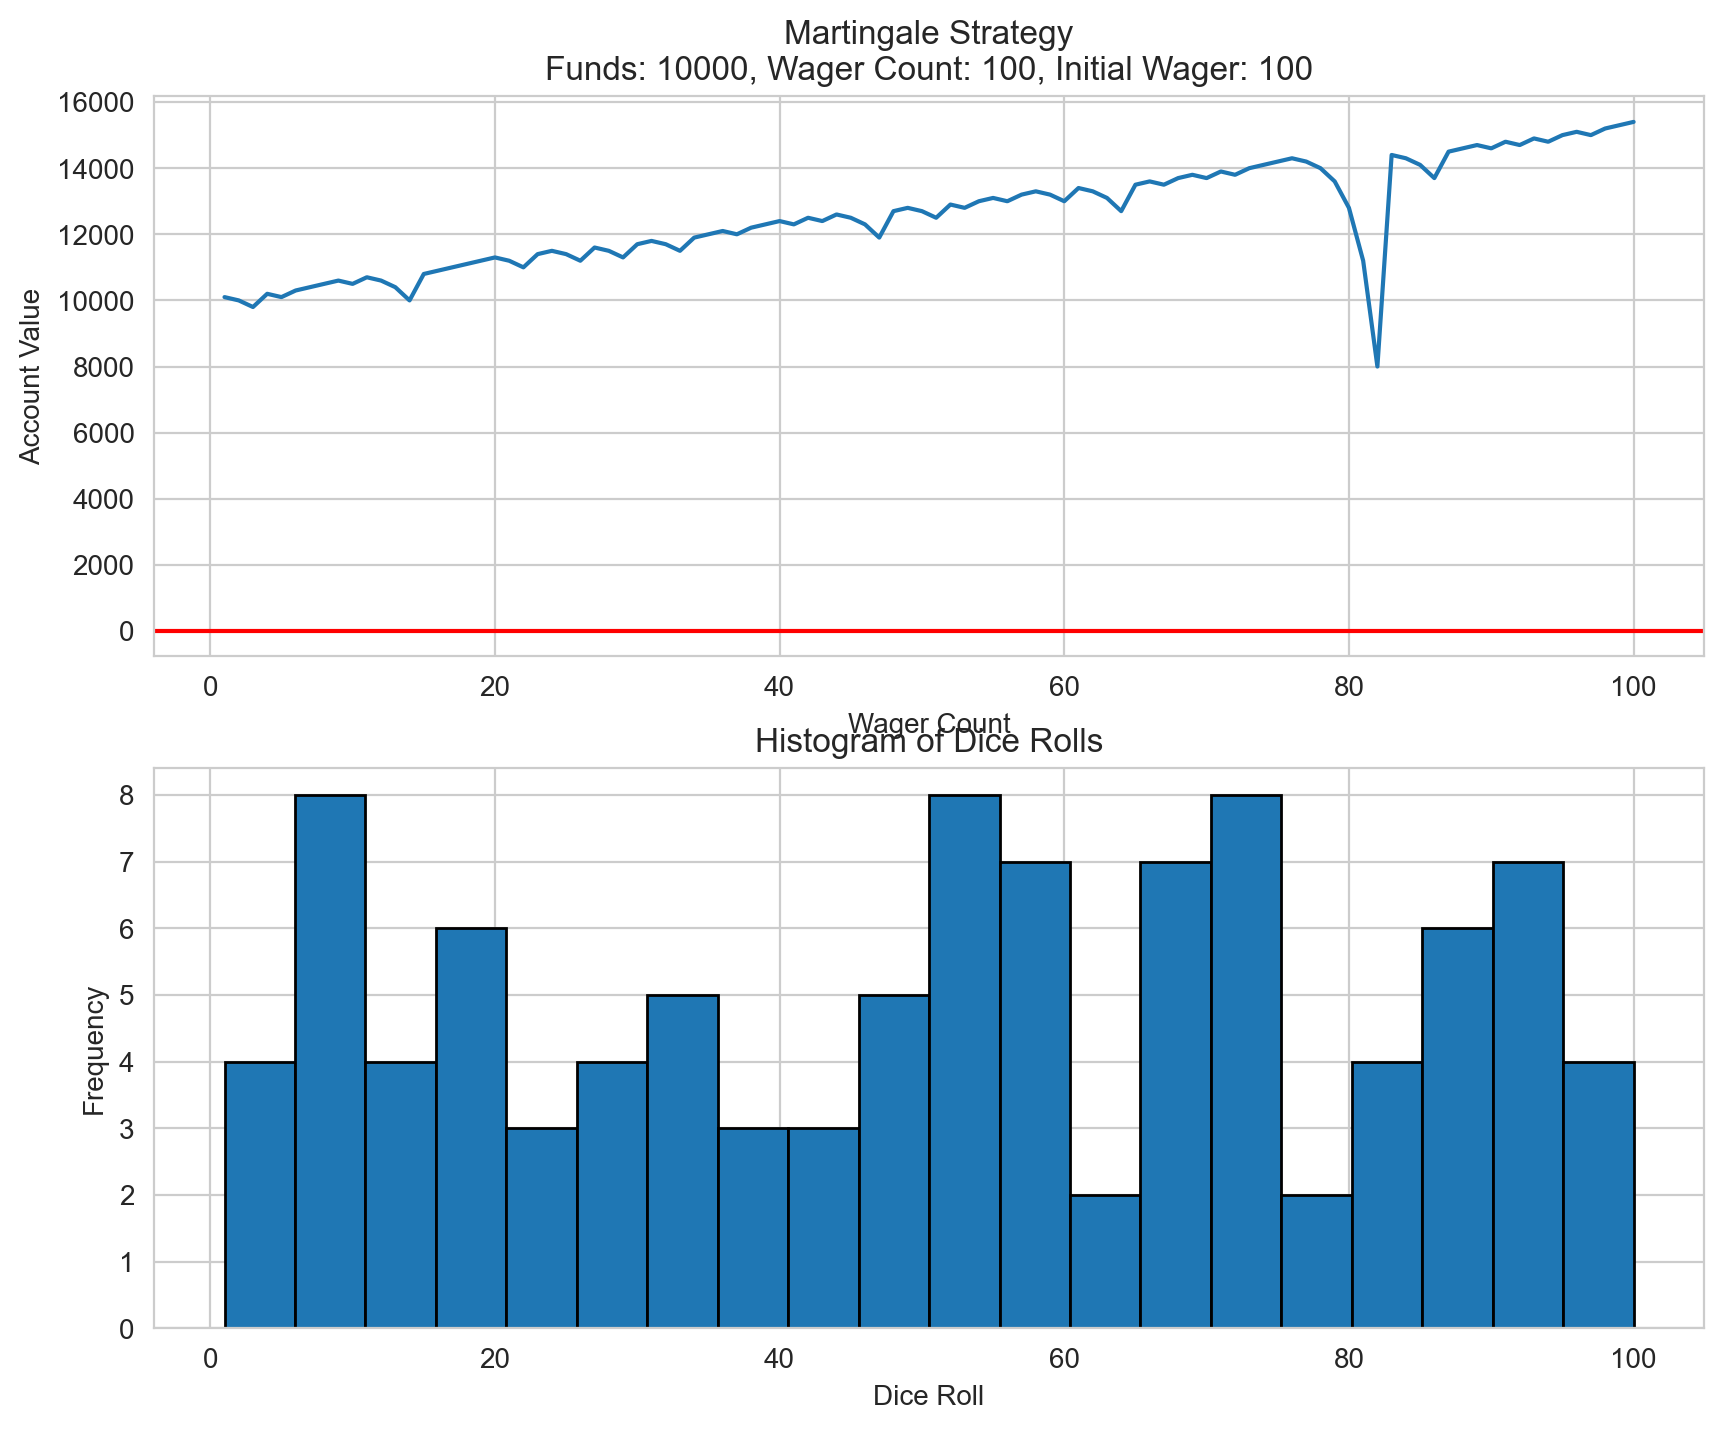

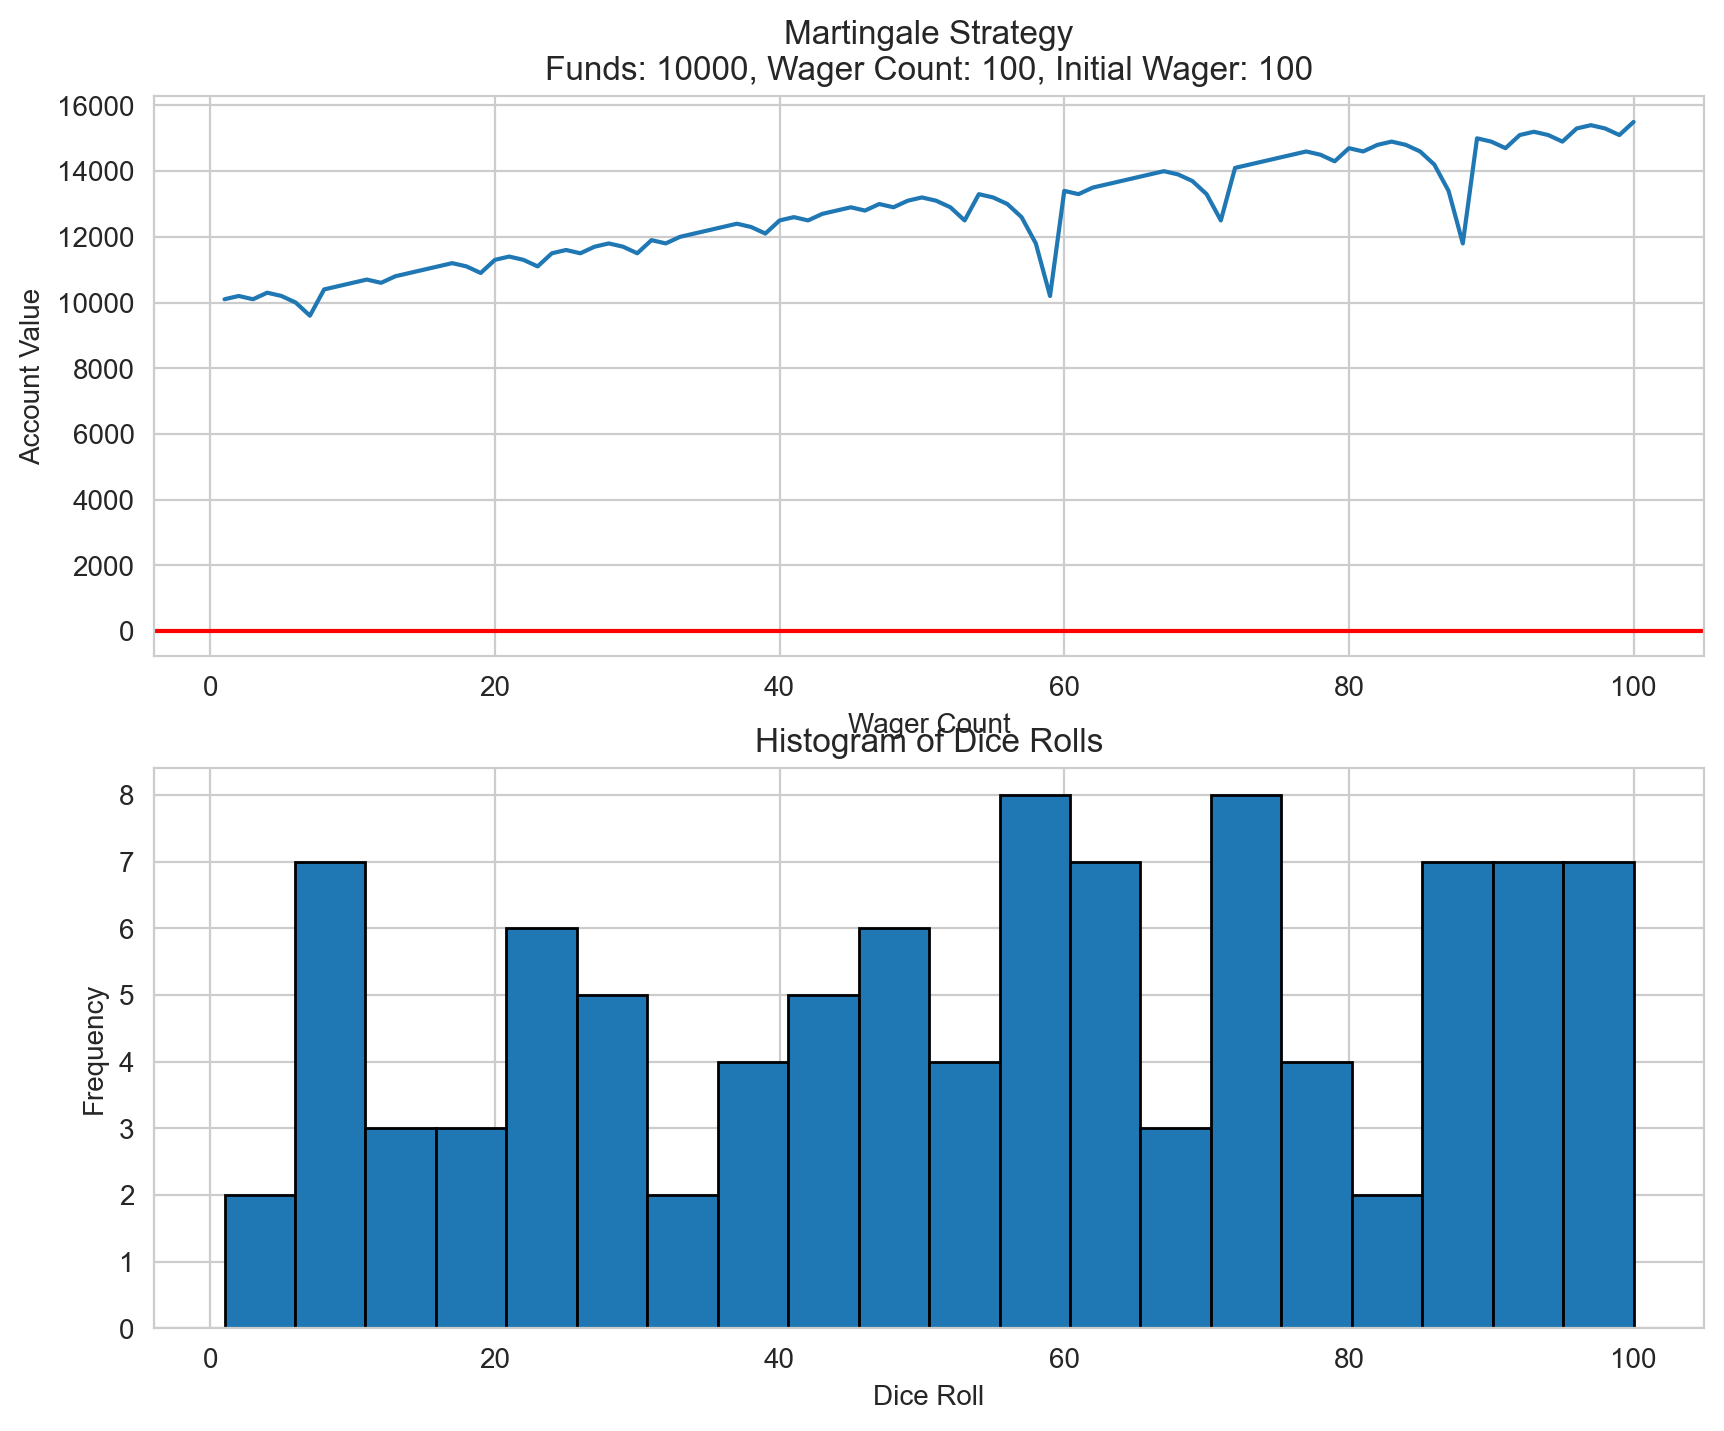

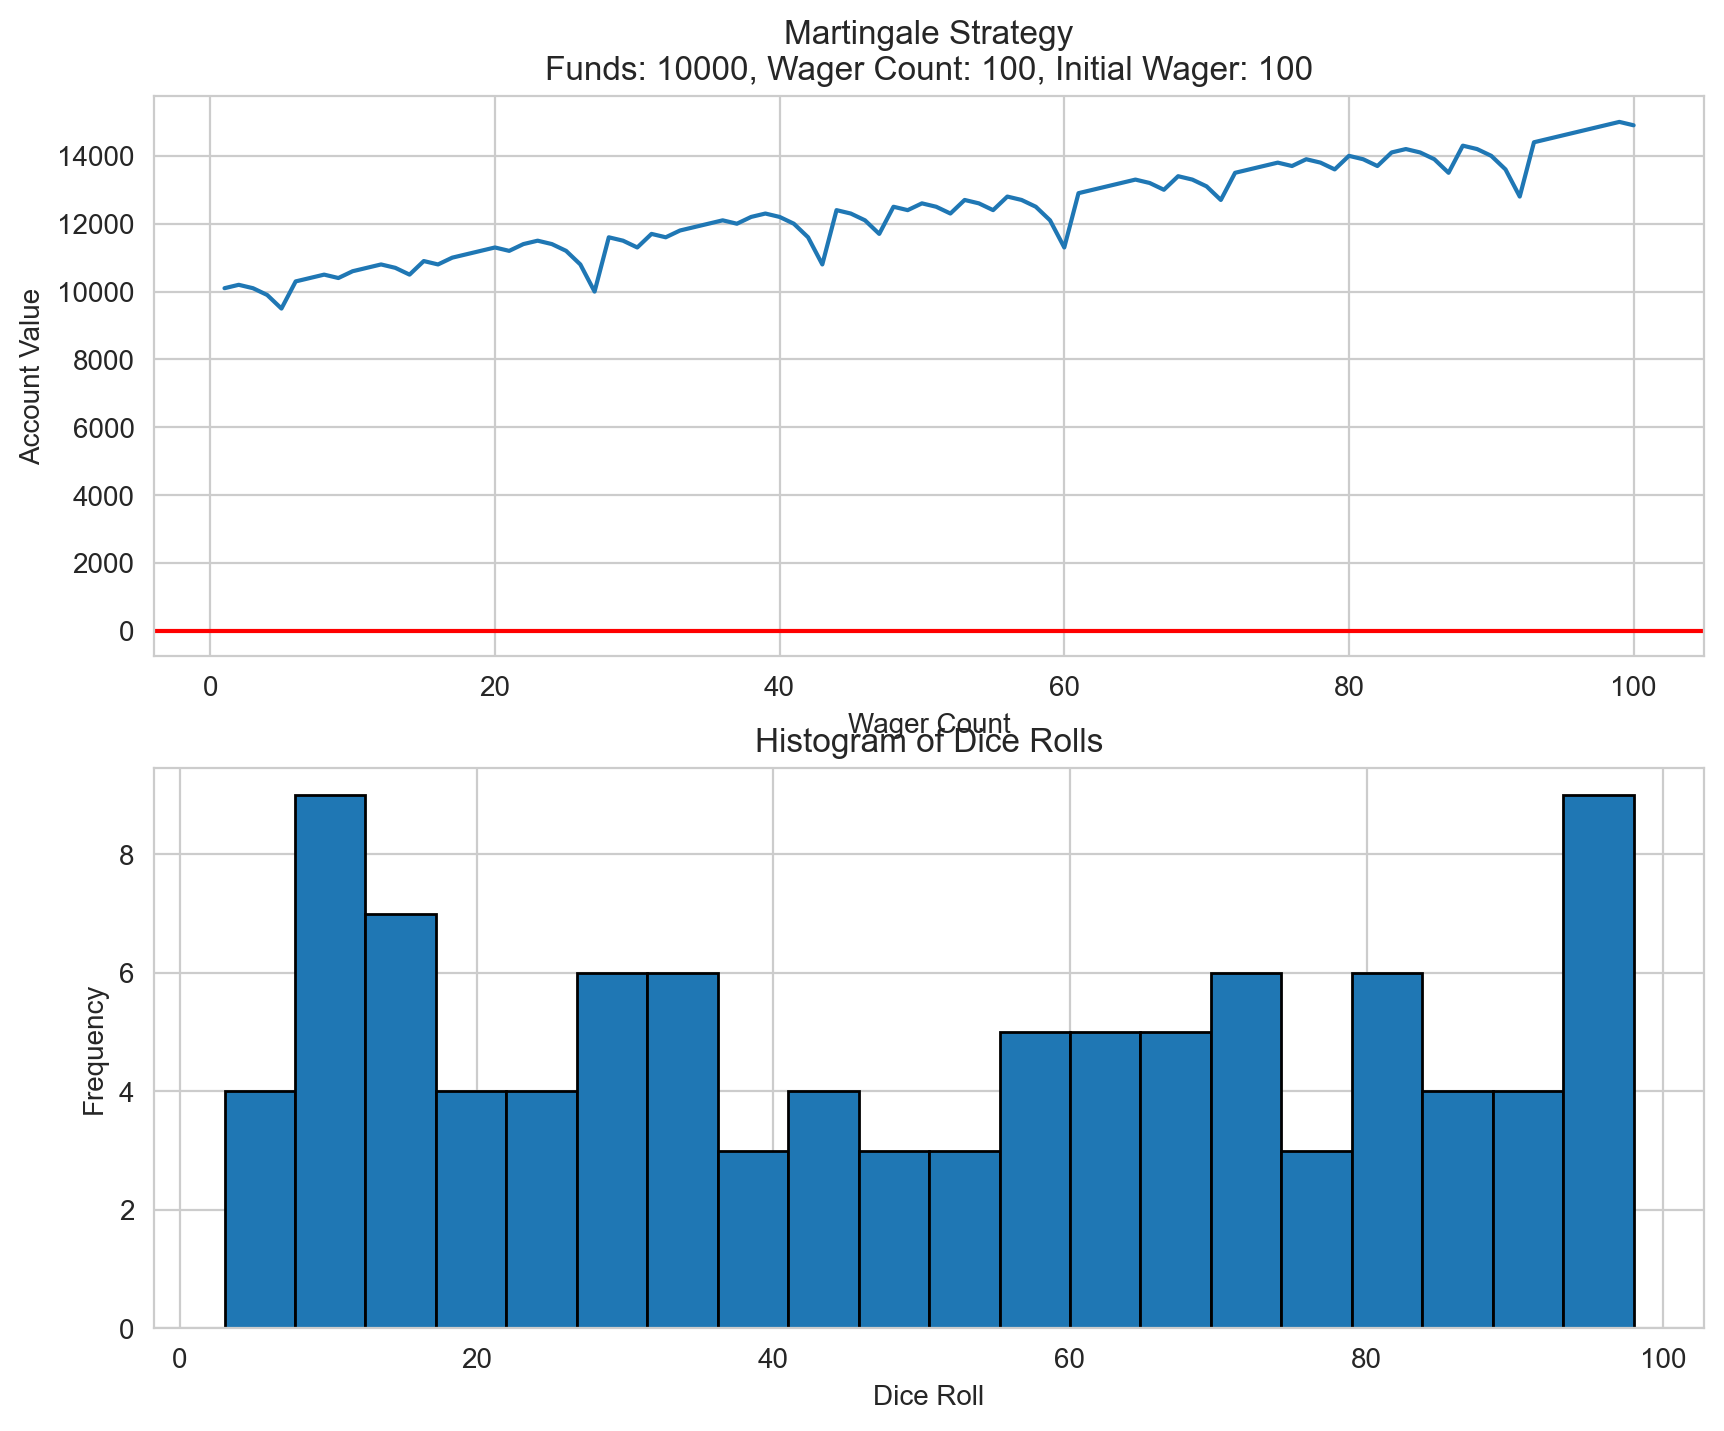

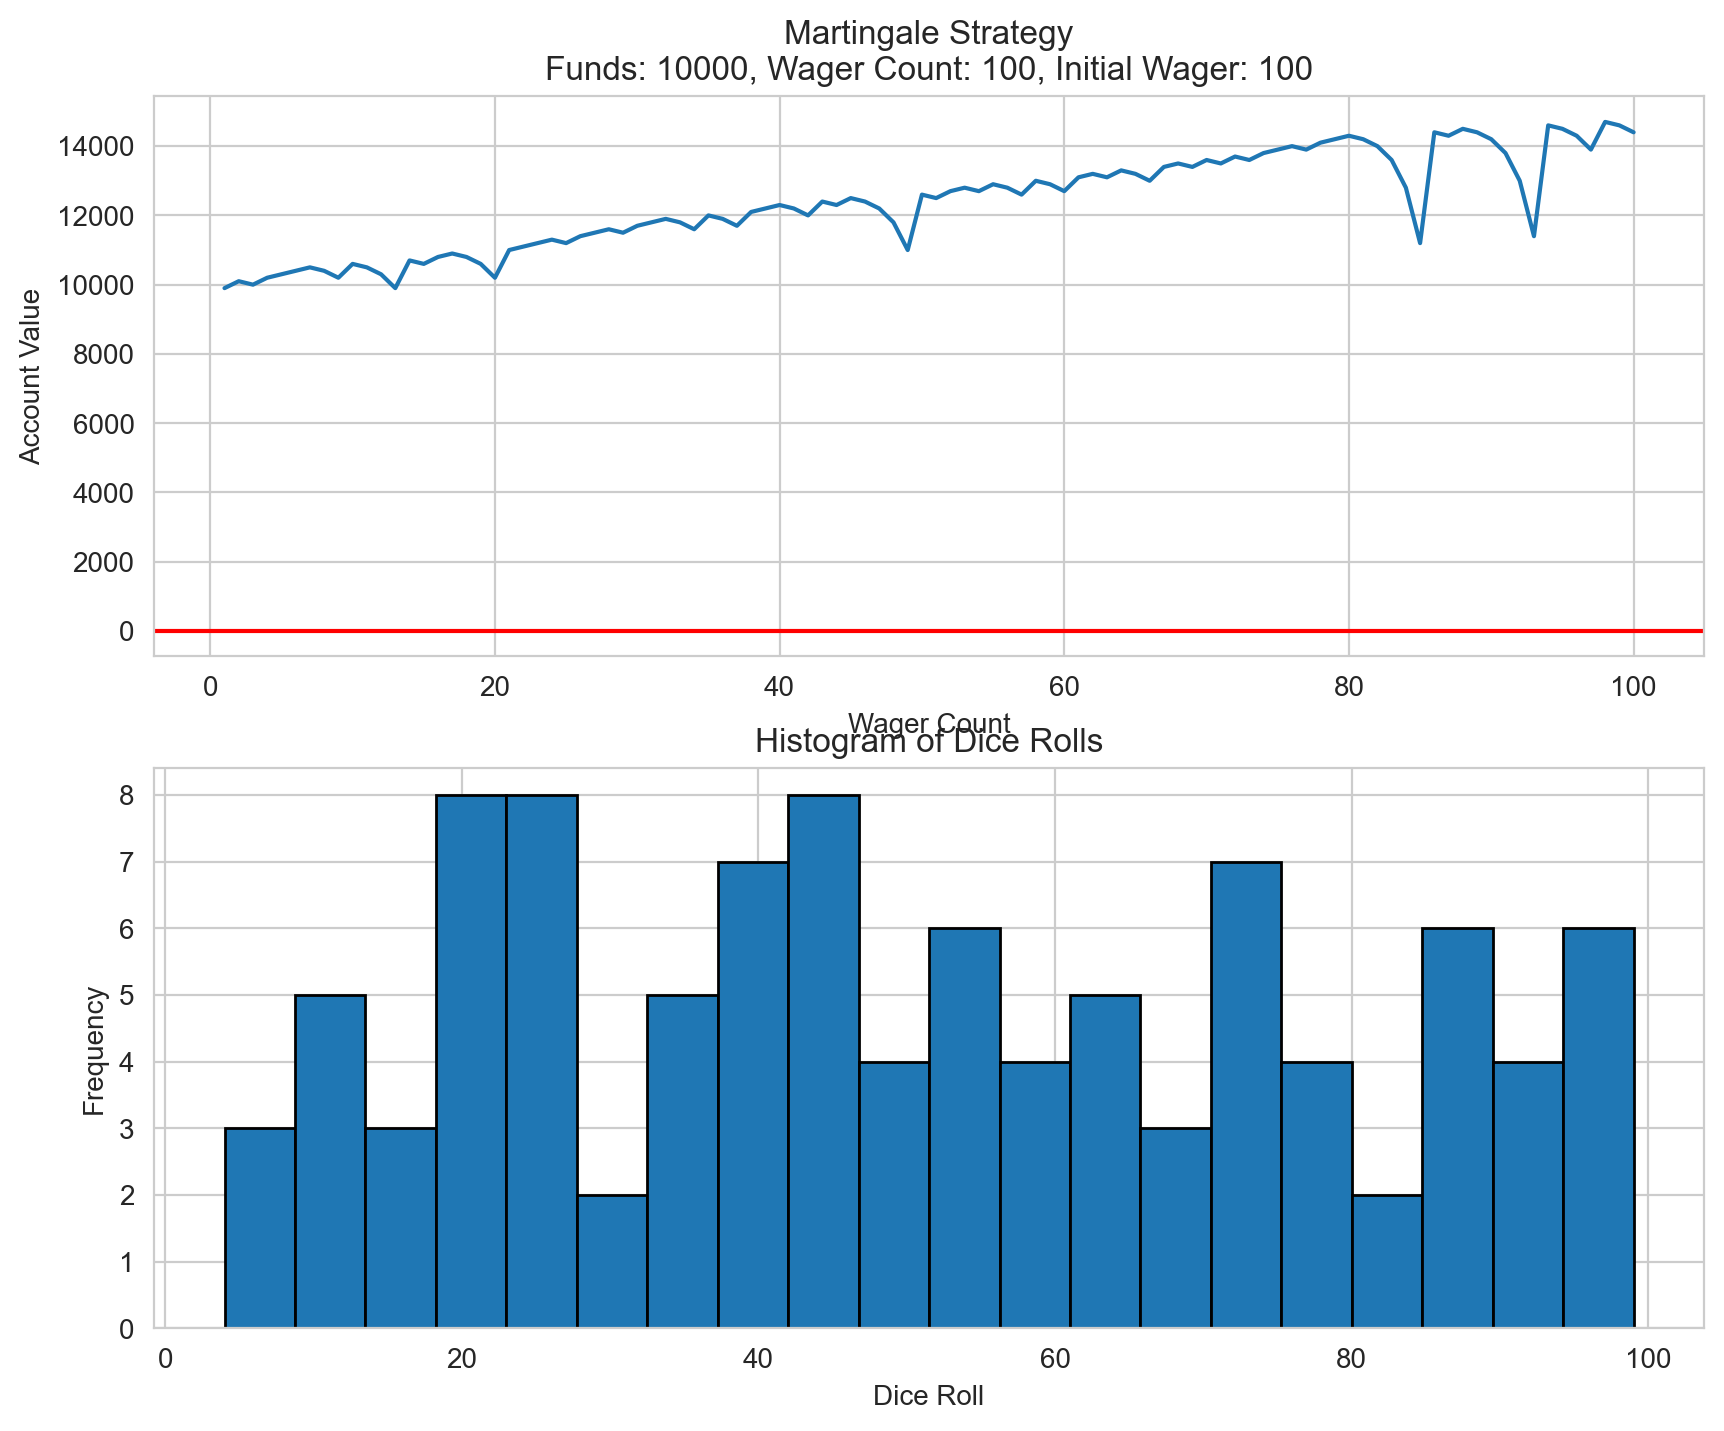

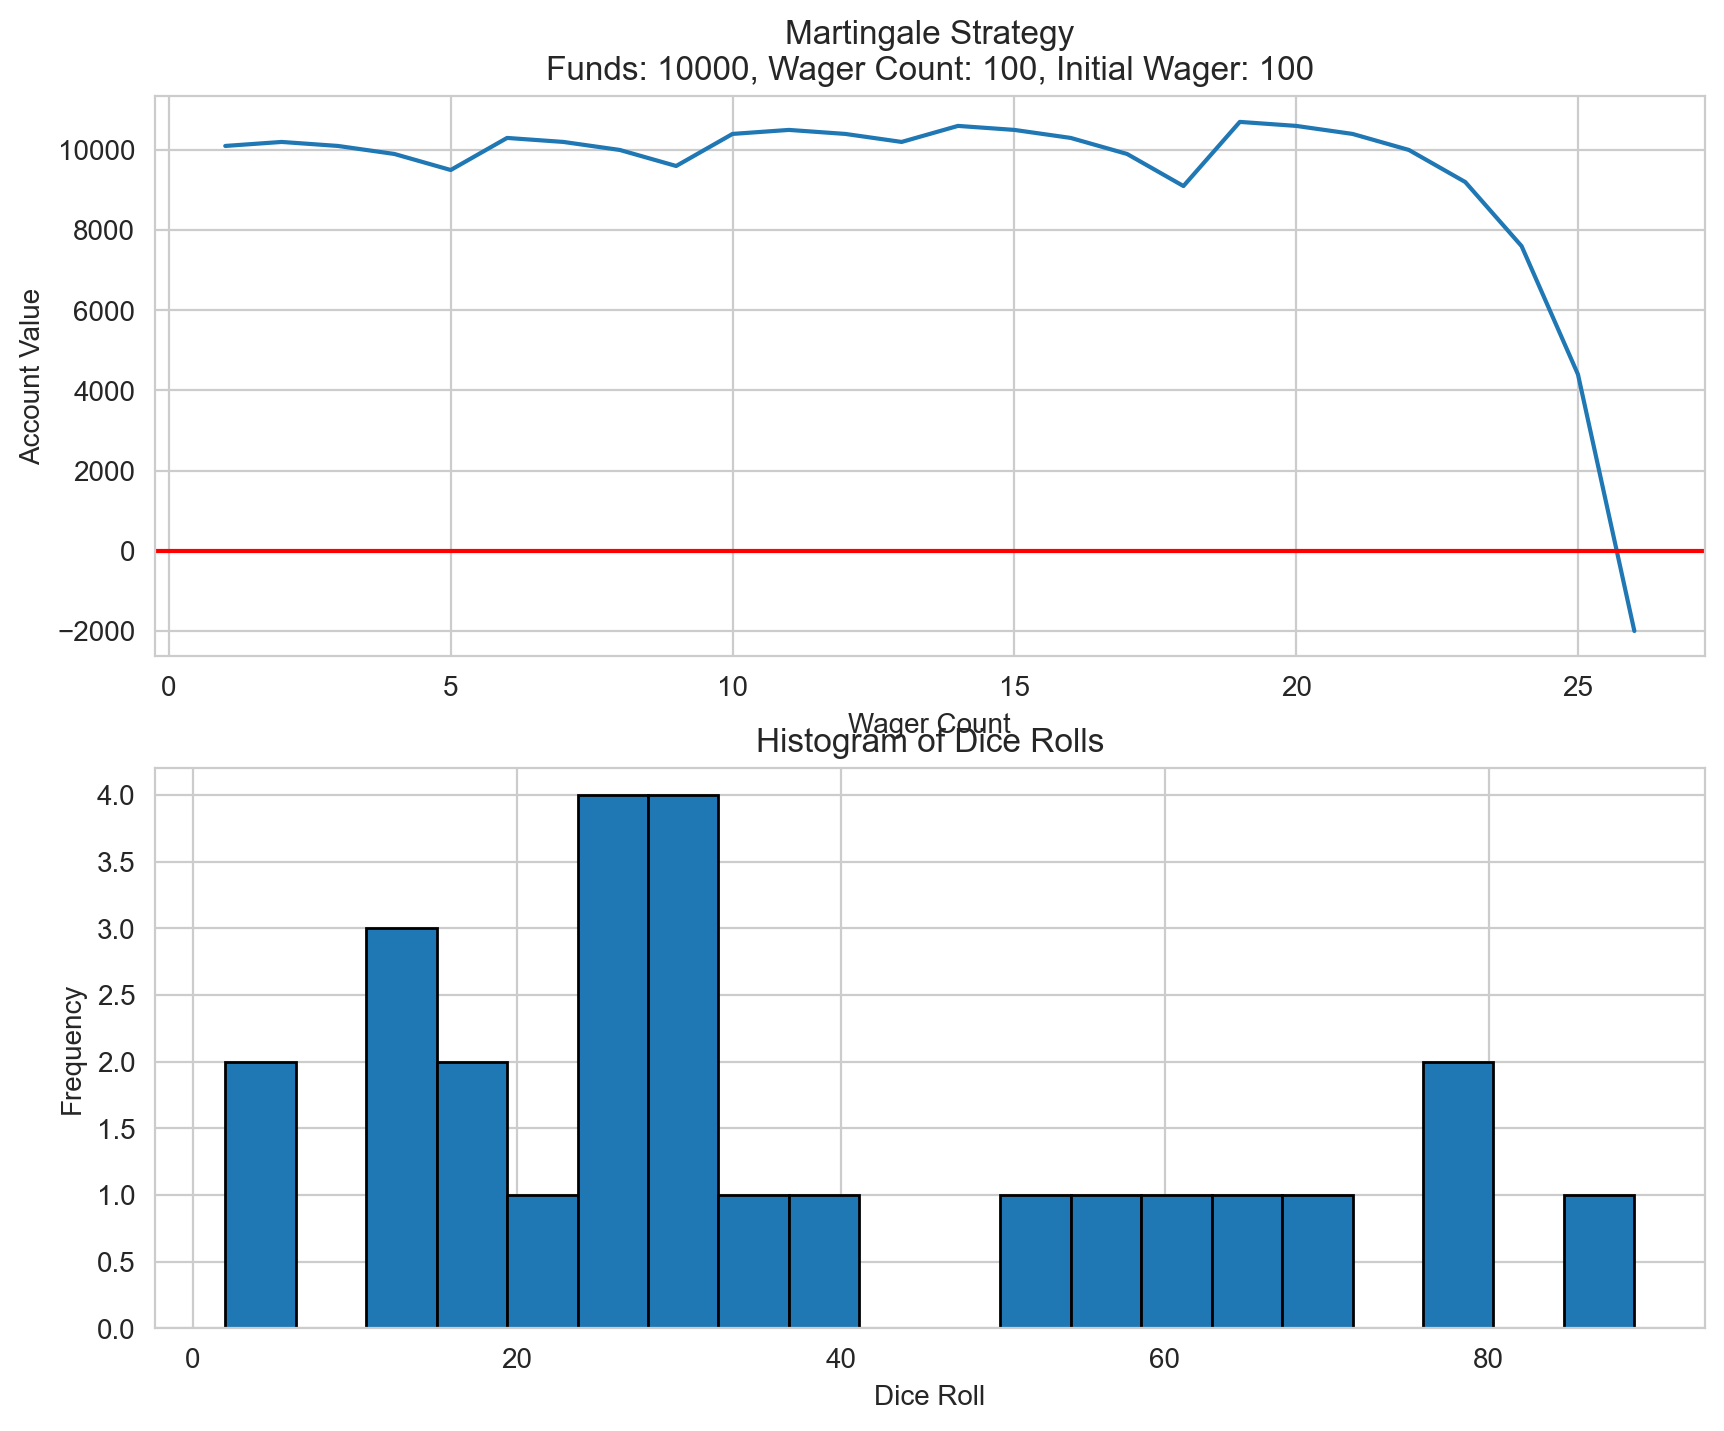

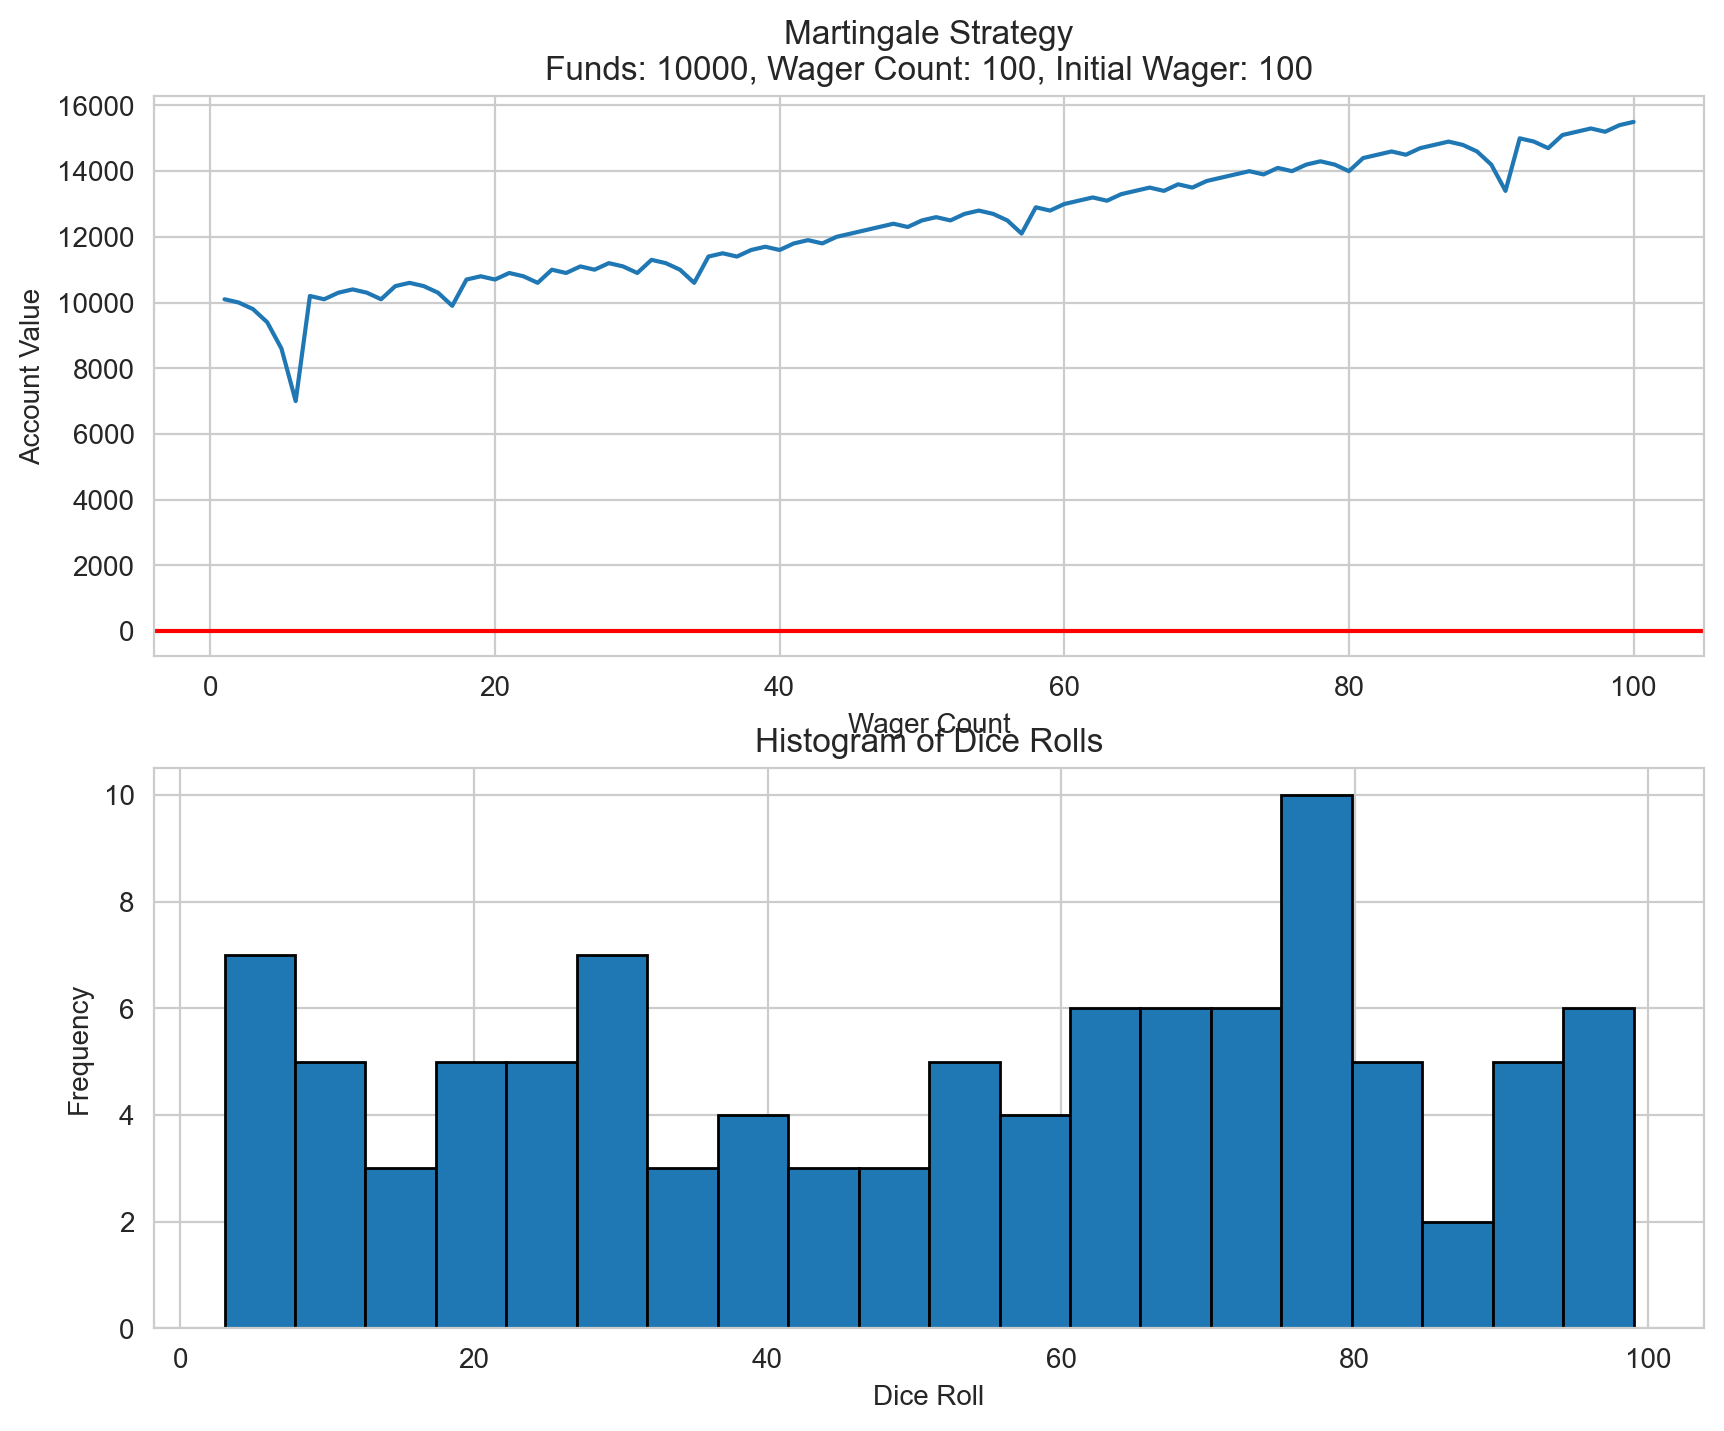

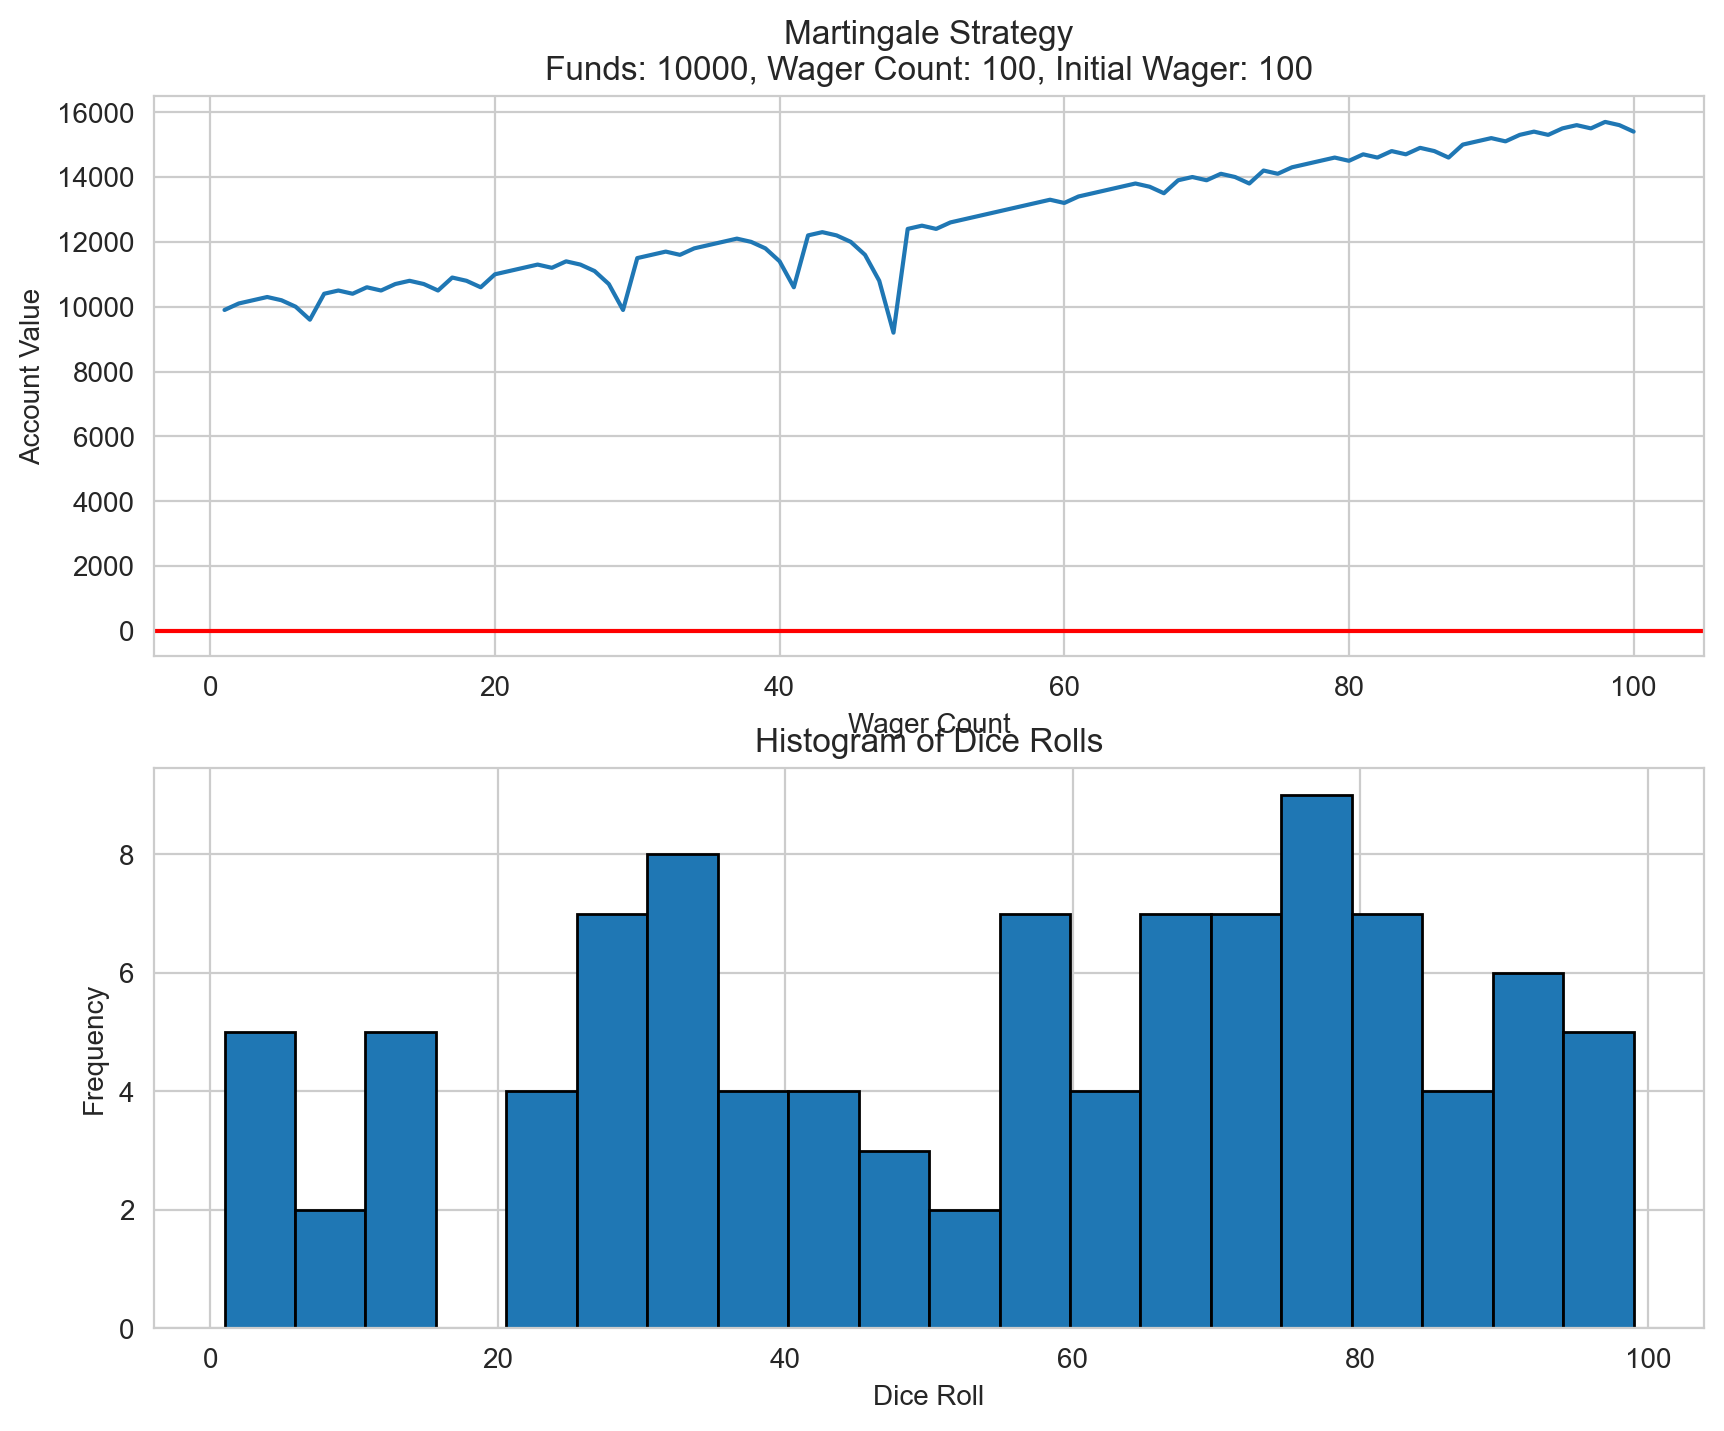

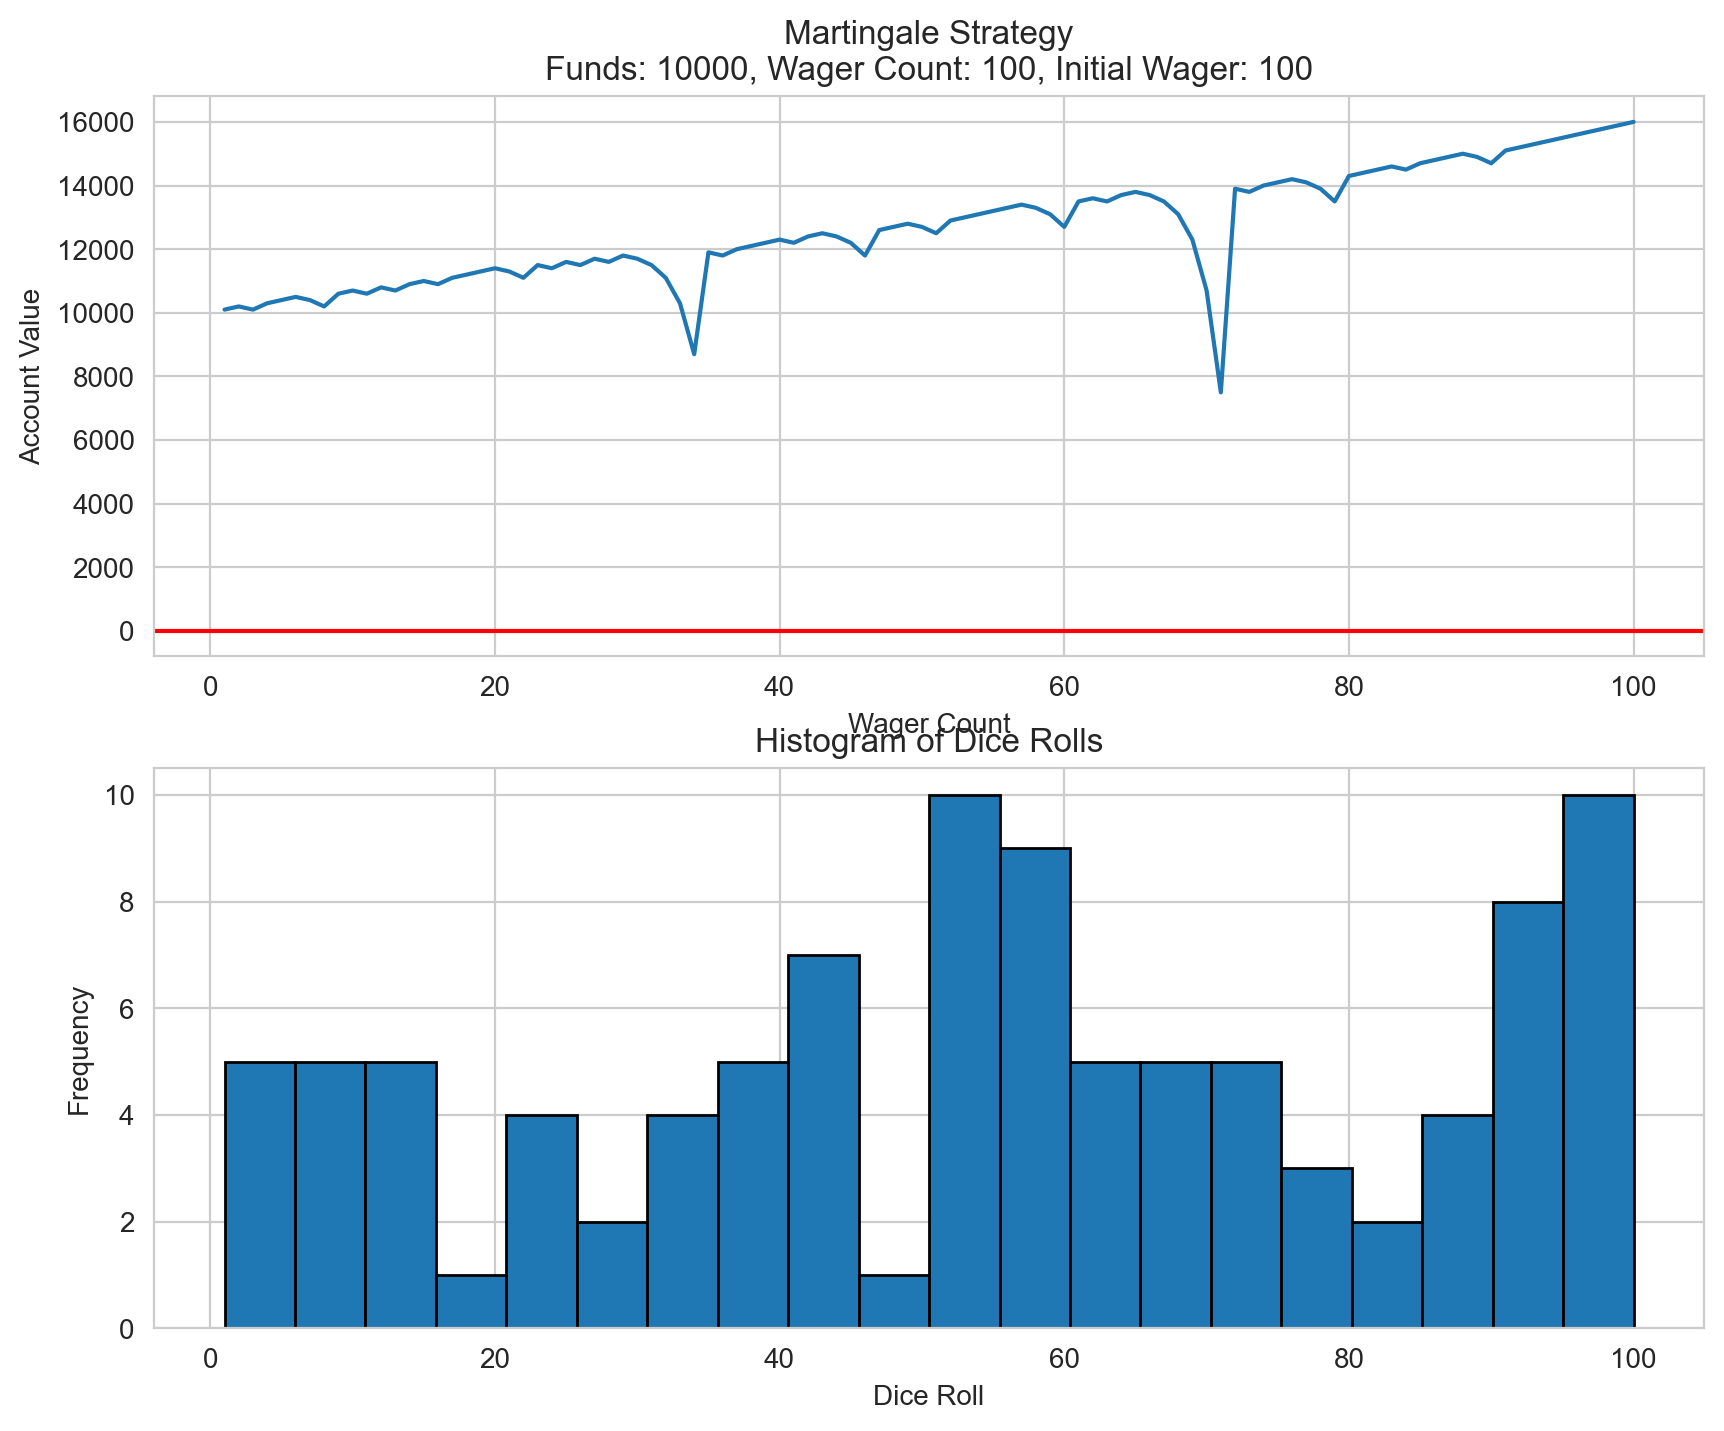

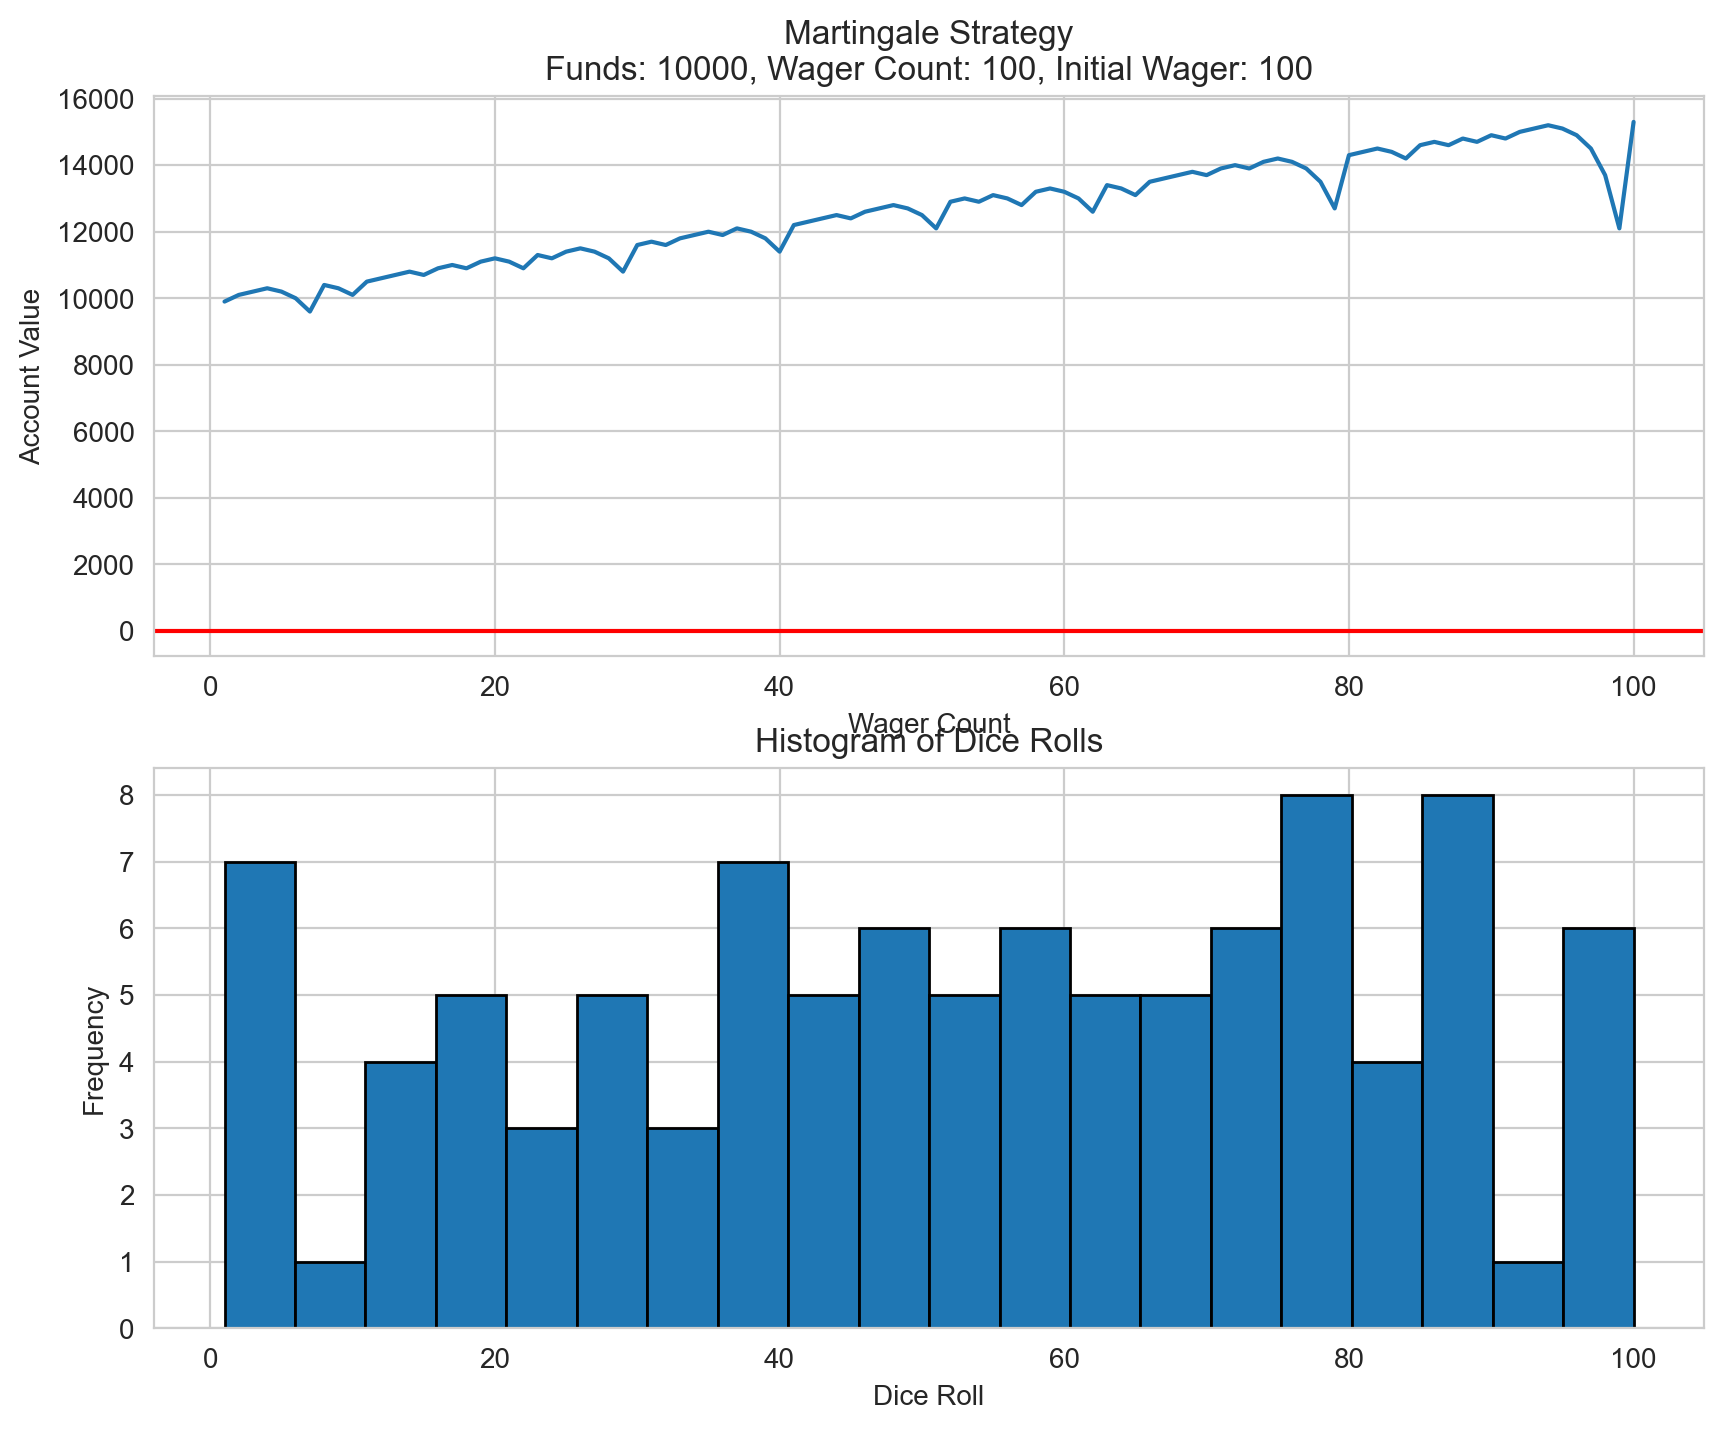

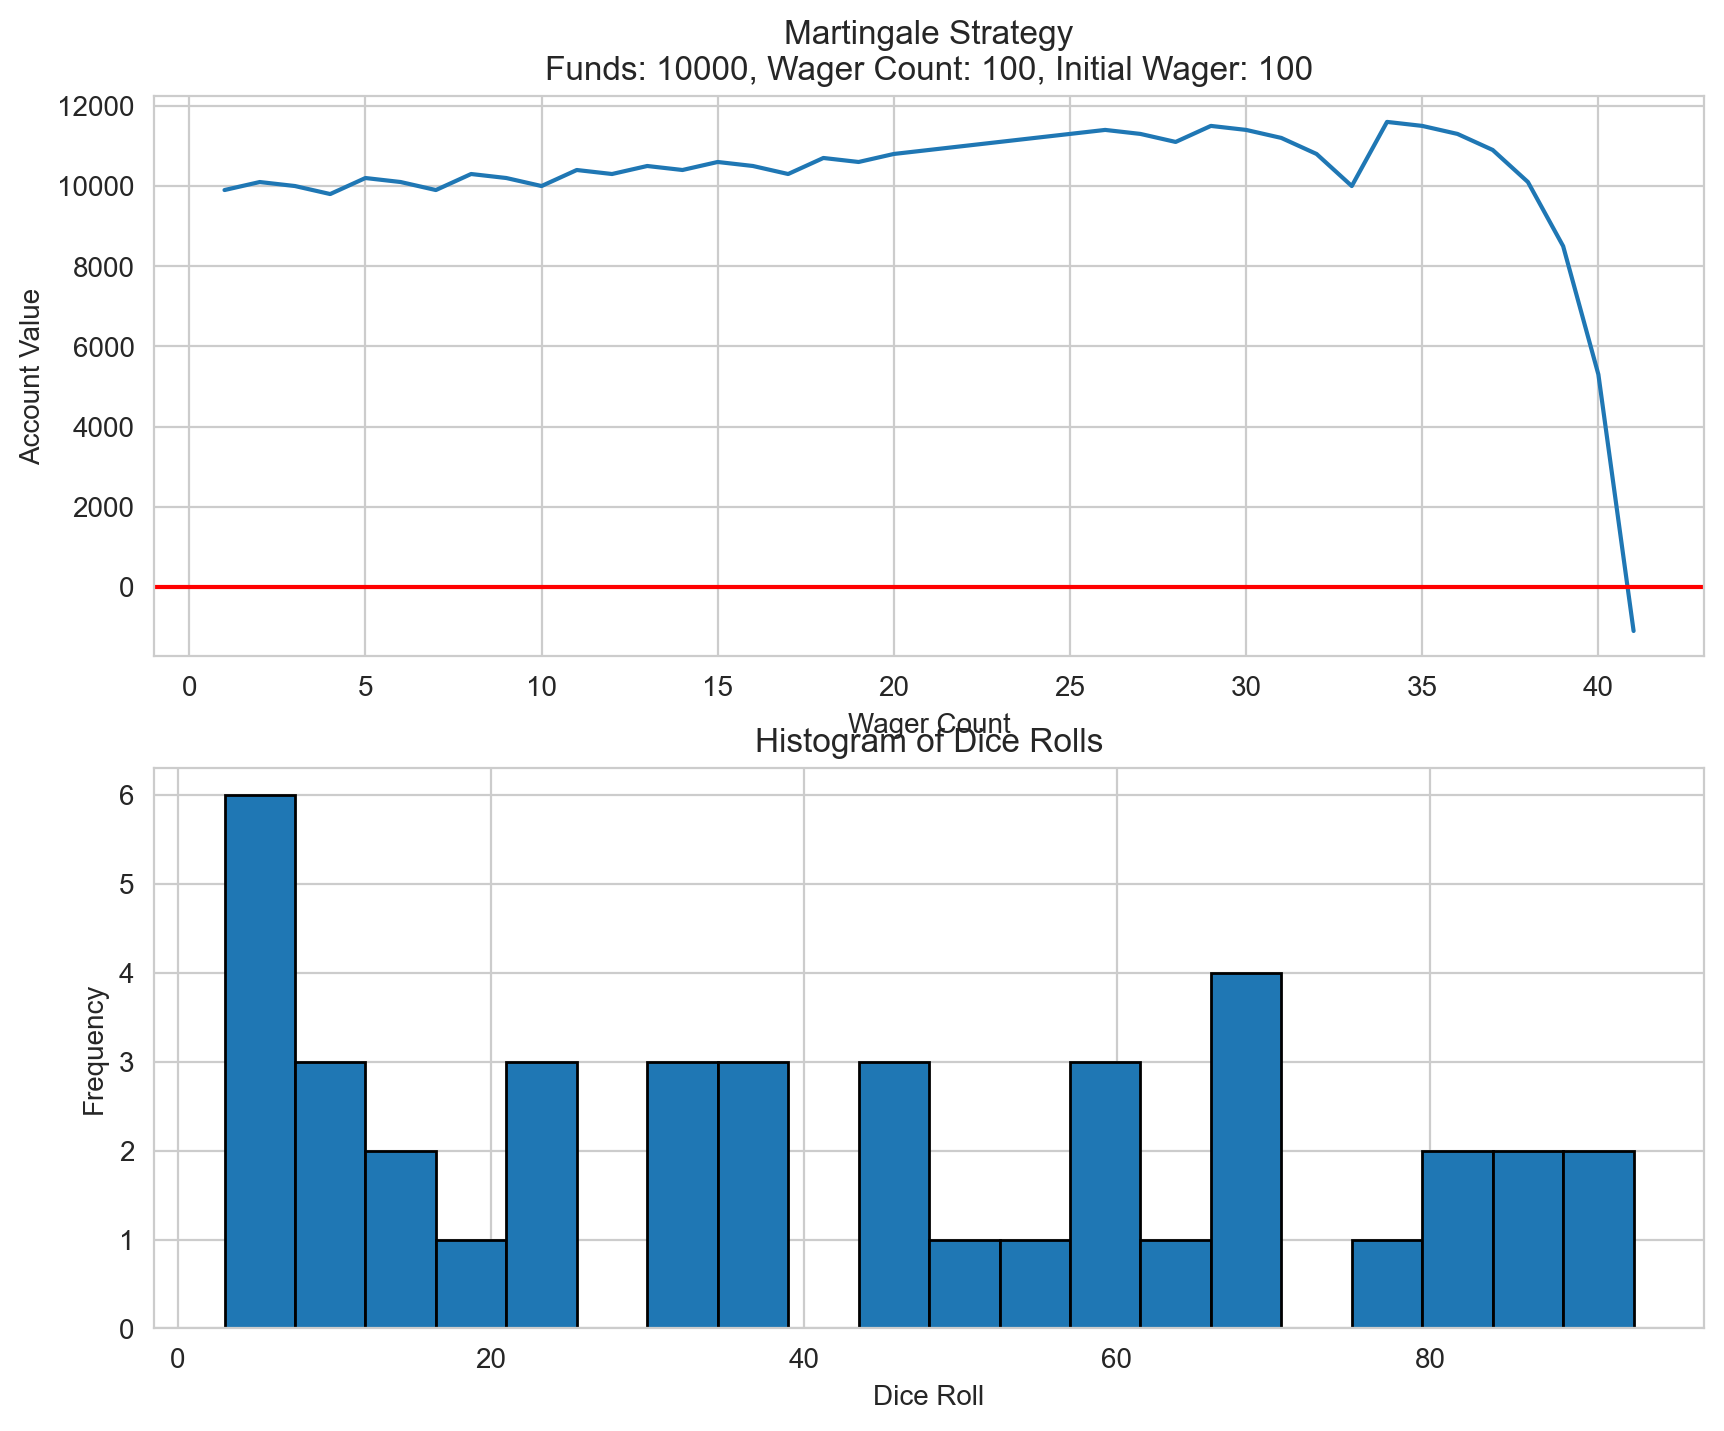

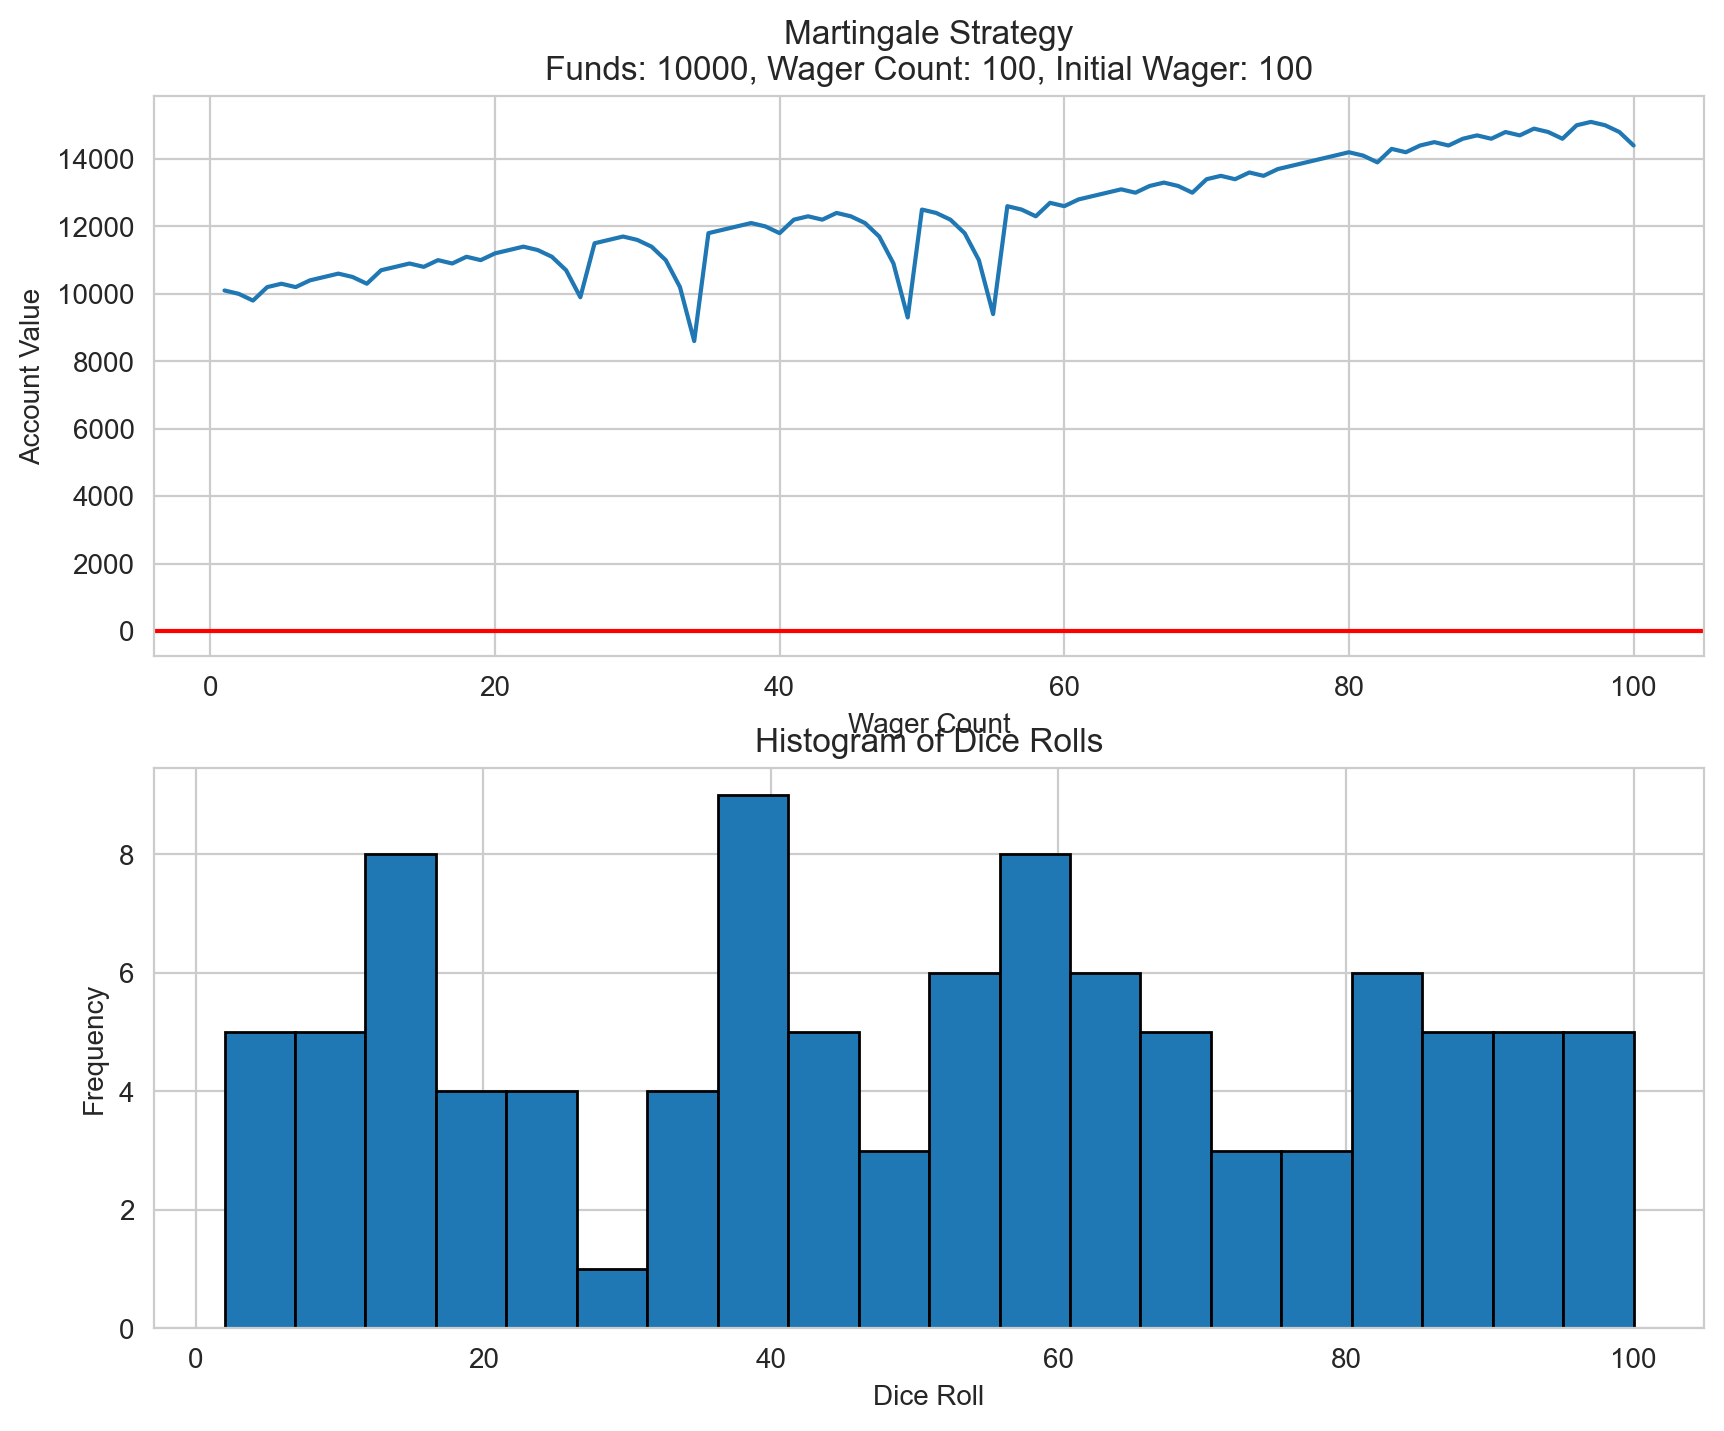

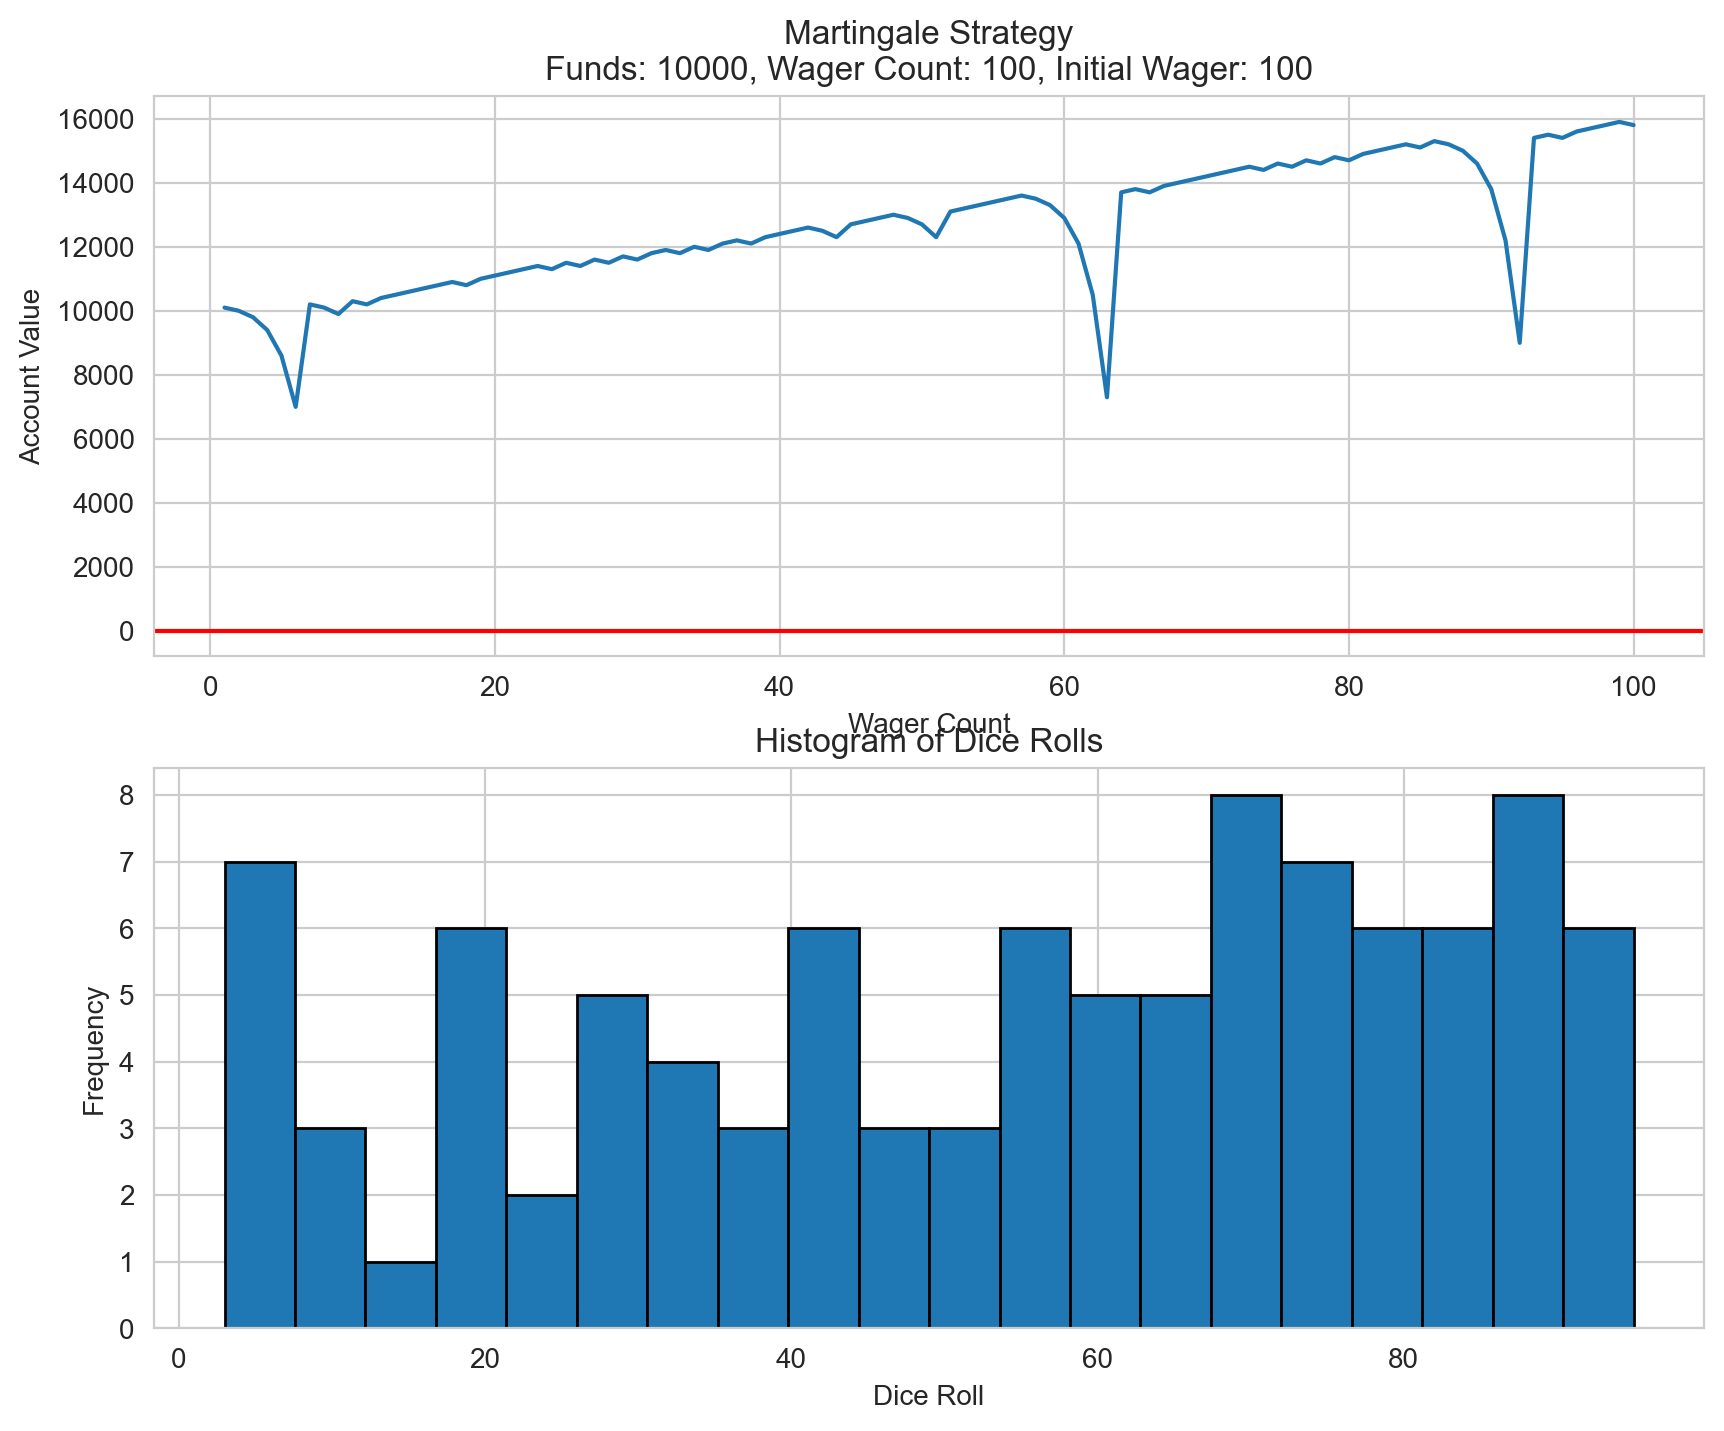

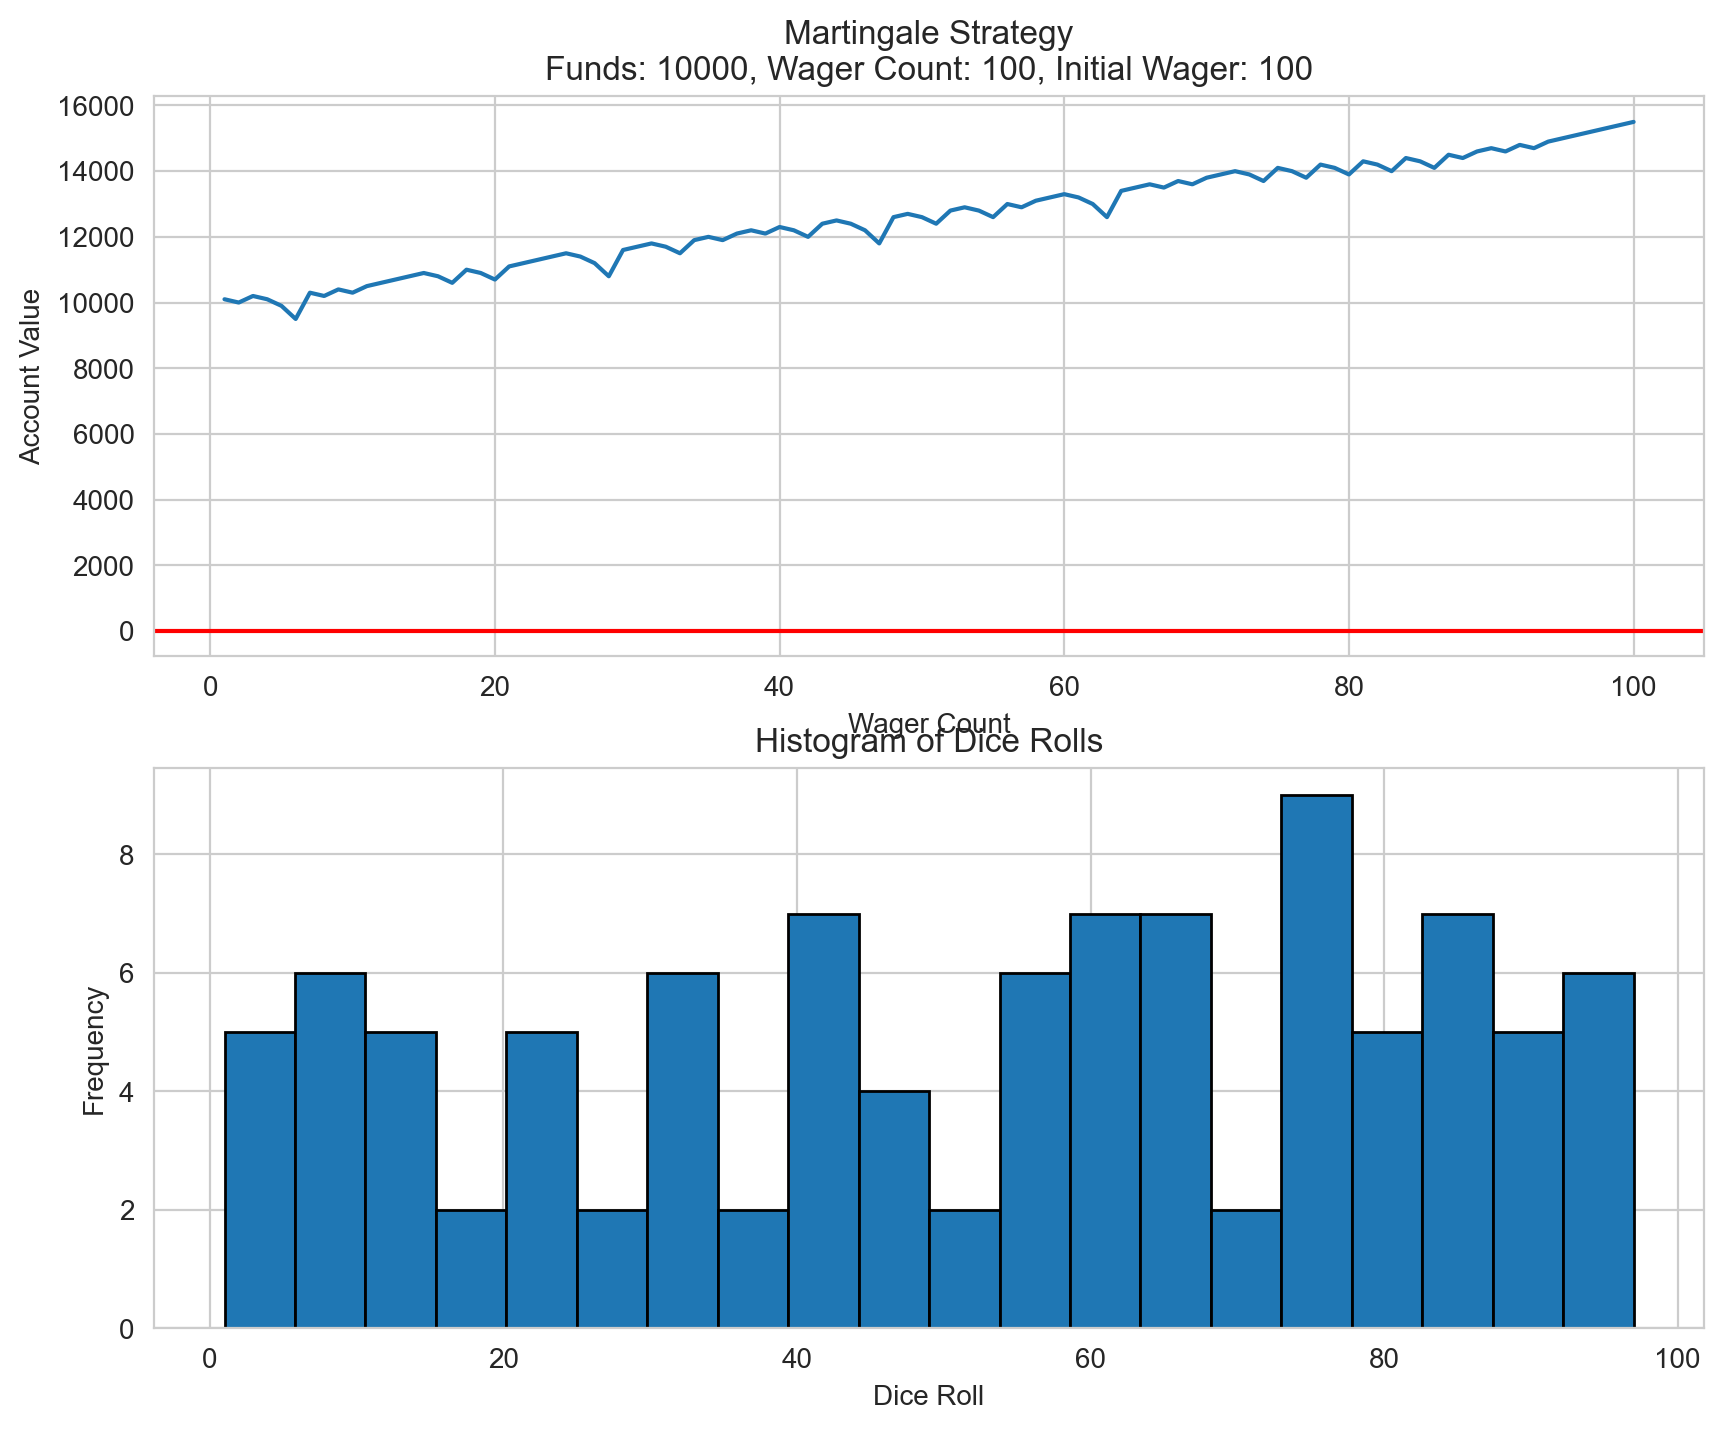

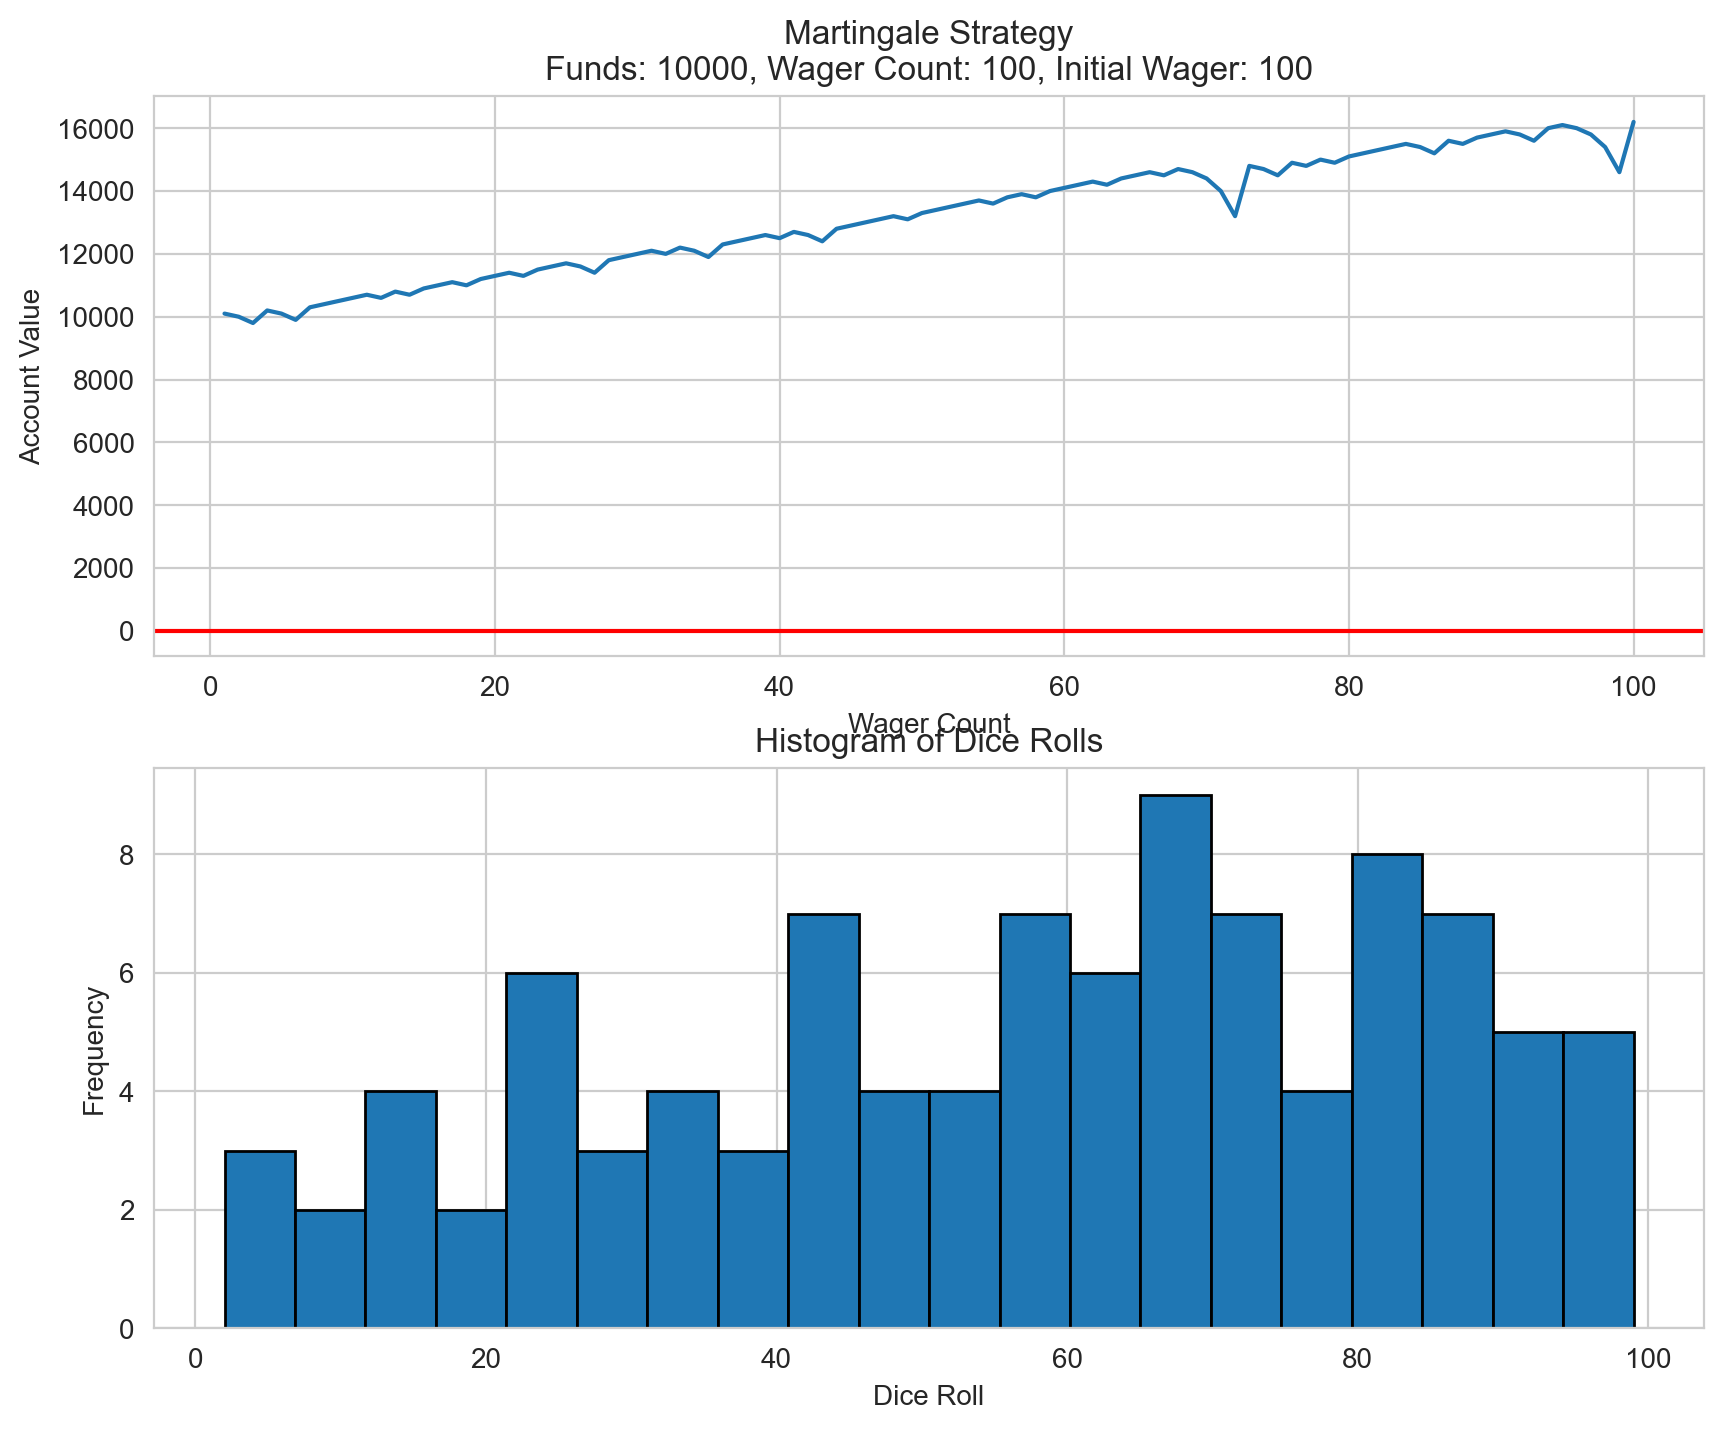

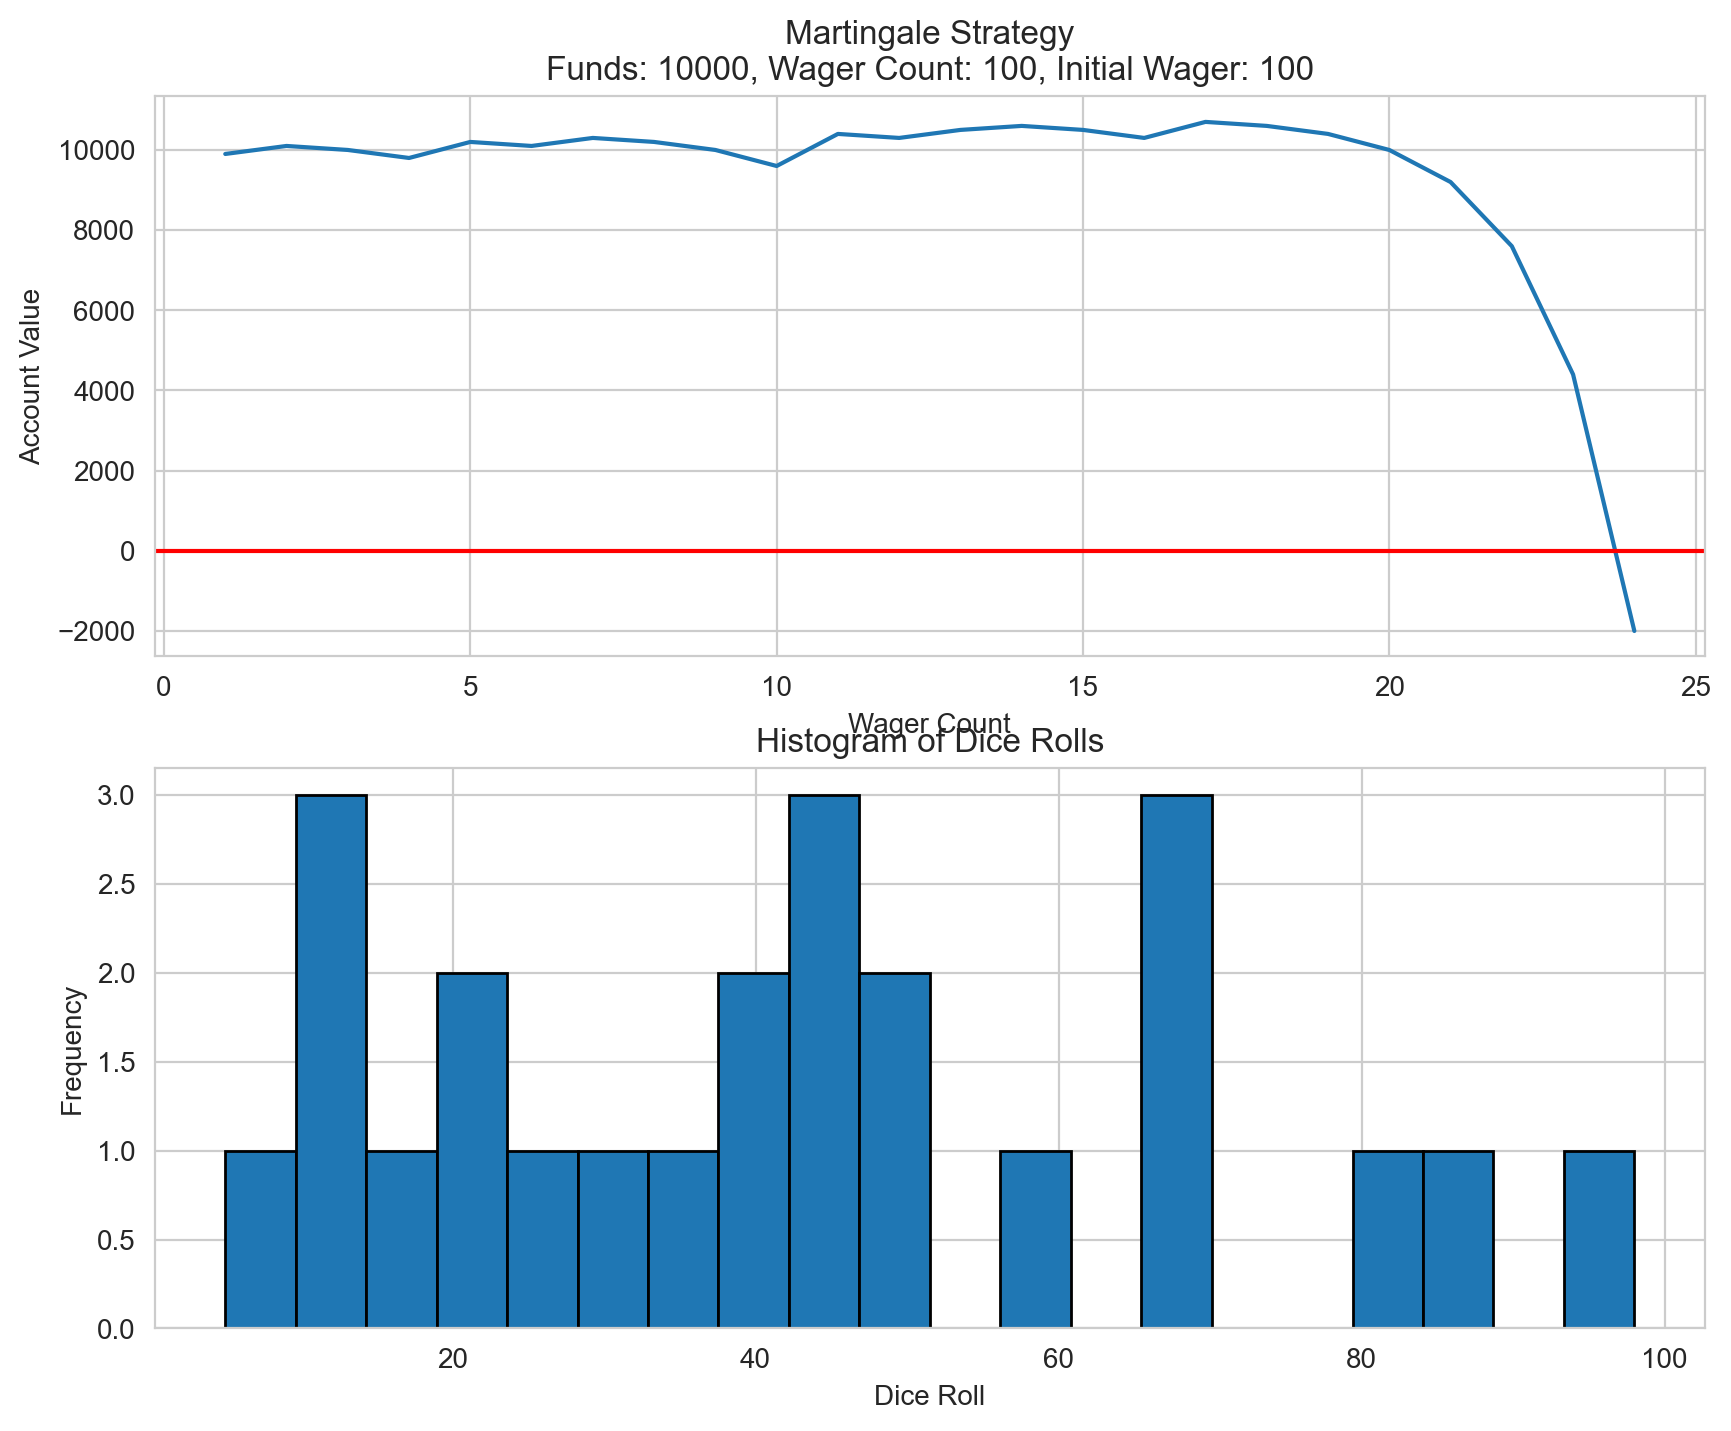

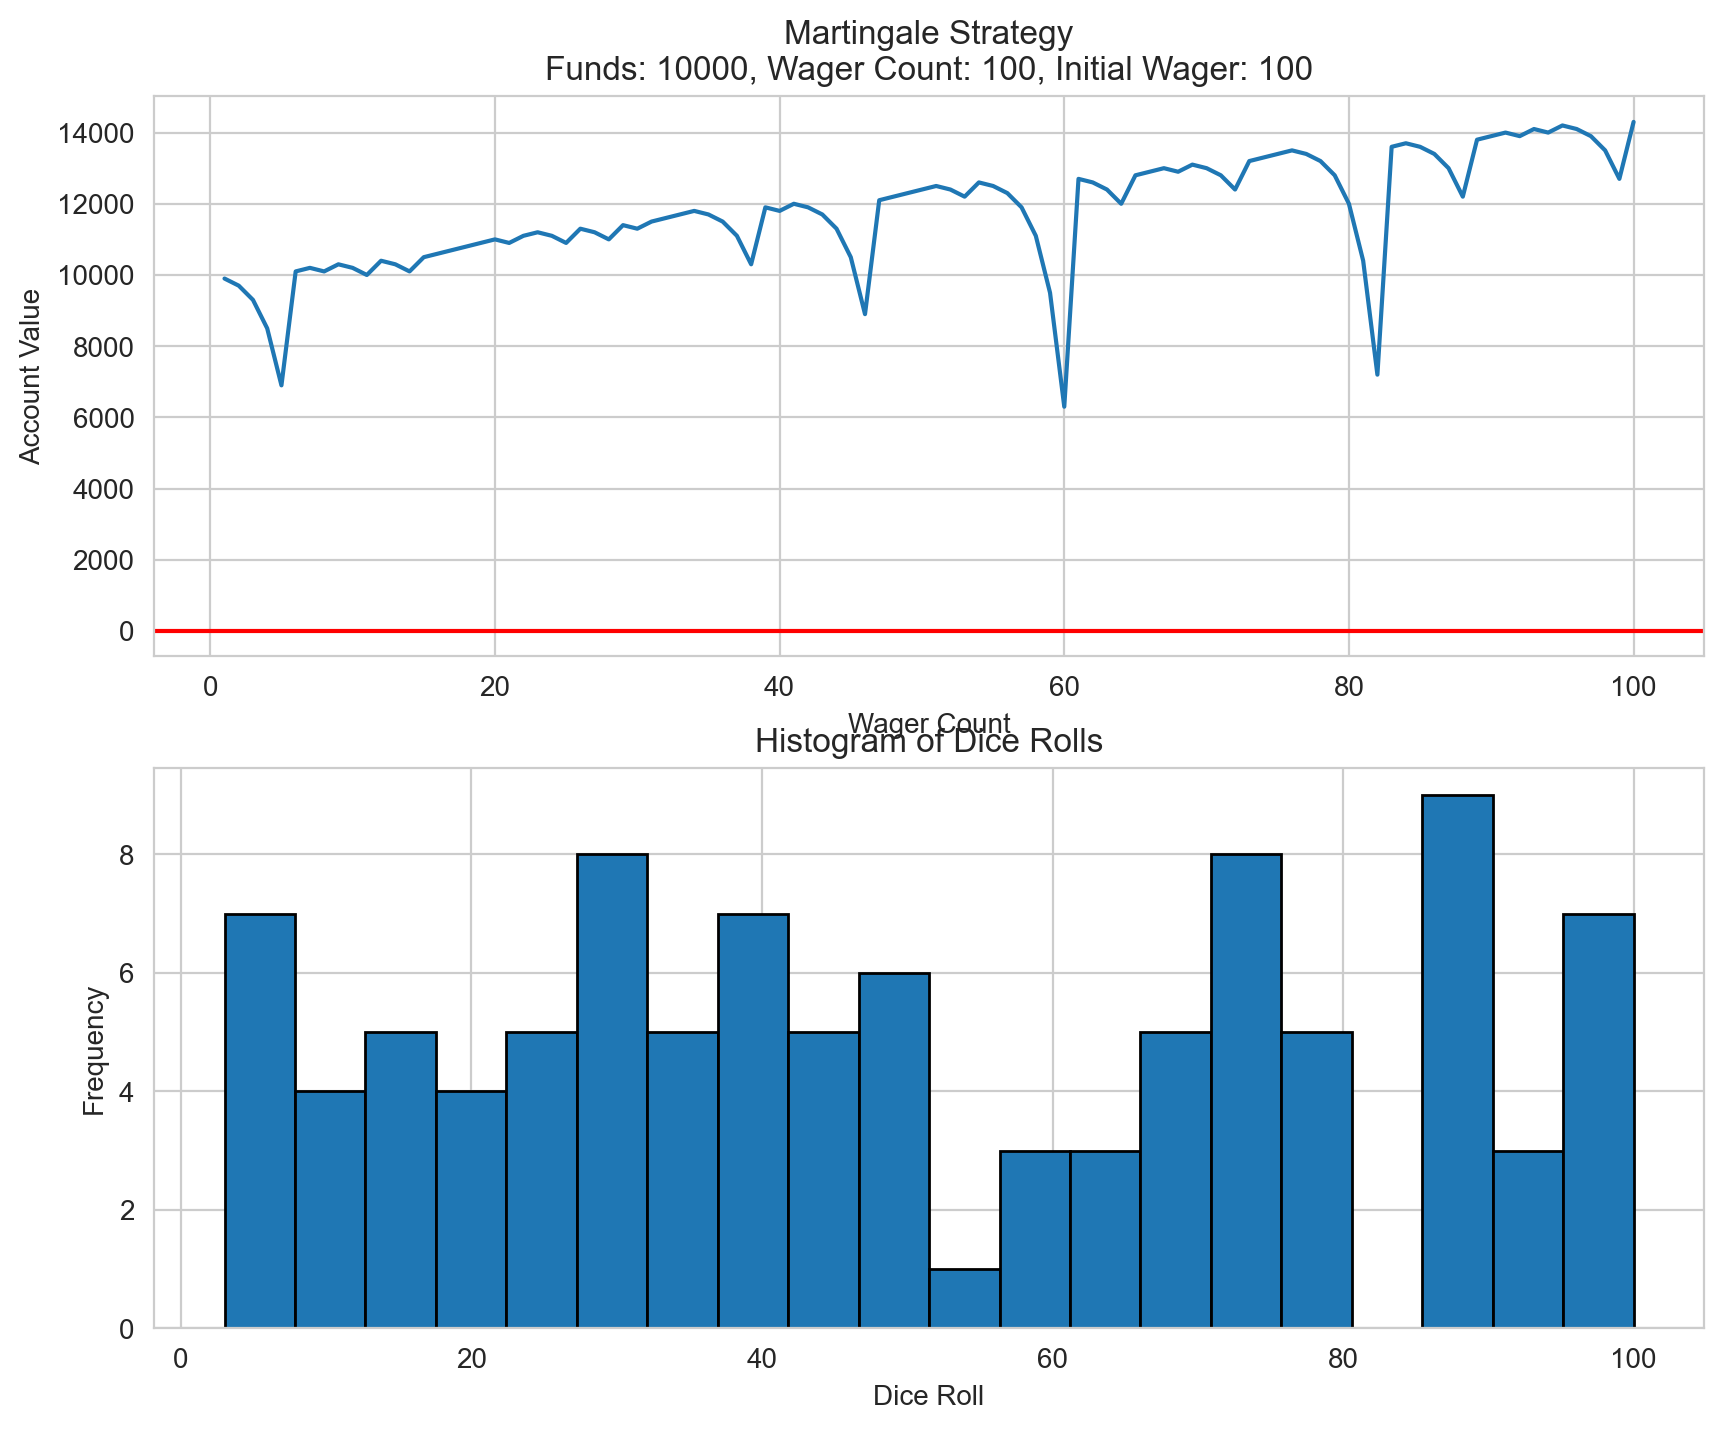

Error in callback <function flush_figures at 0x000002ABF4329800> (for post_execute):


KeyboardInterrupt: 

In [15]:
multiple_betters(
    funds=10_000,
    initial_wager=100,
    wager_count=100,
    number_of_betters=100,
    betting_function=martingale_better,
    logscale=False
)

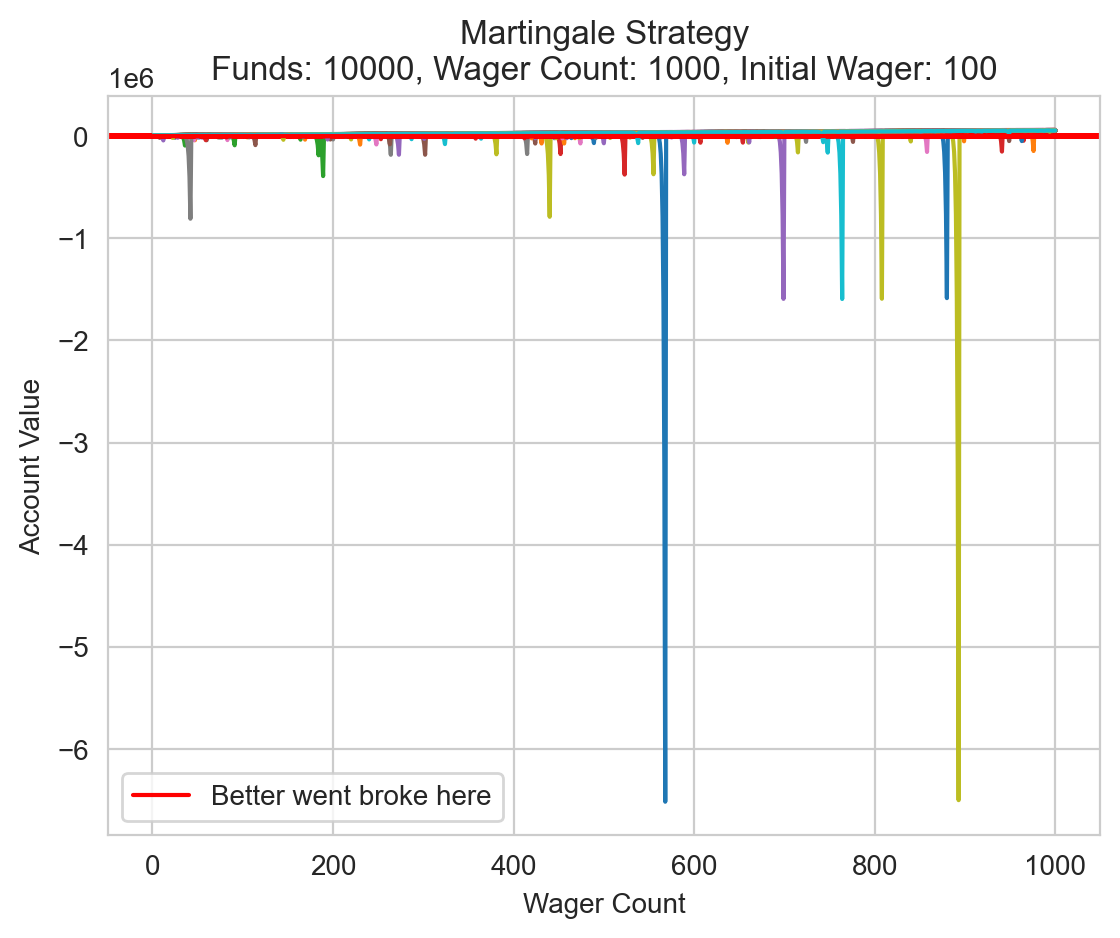

In [6]:
multiple_betters(
    funds=10_000,
    initial_wager=100,
    wager_count=1_000,
    number_of_betters=100,
    betting_function=martingale_better,
    logscale=False
)

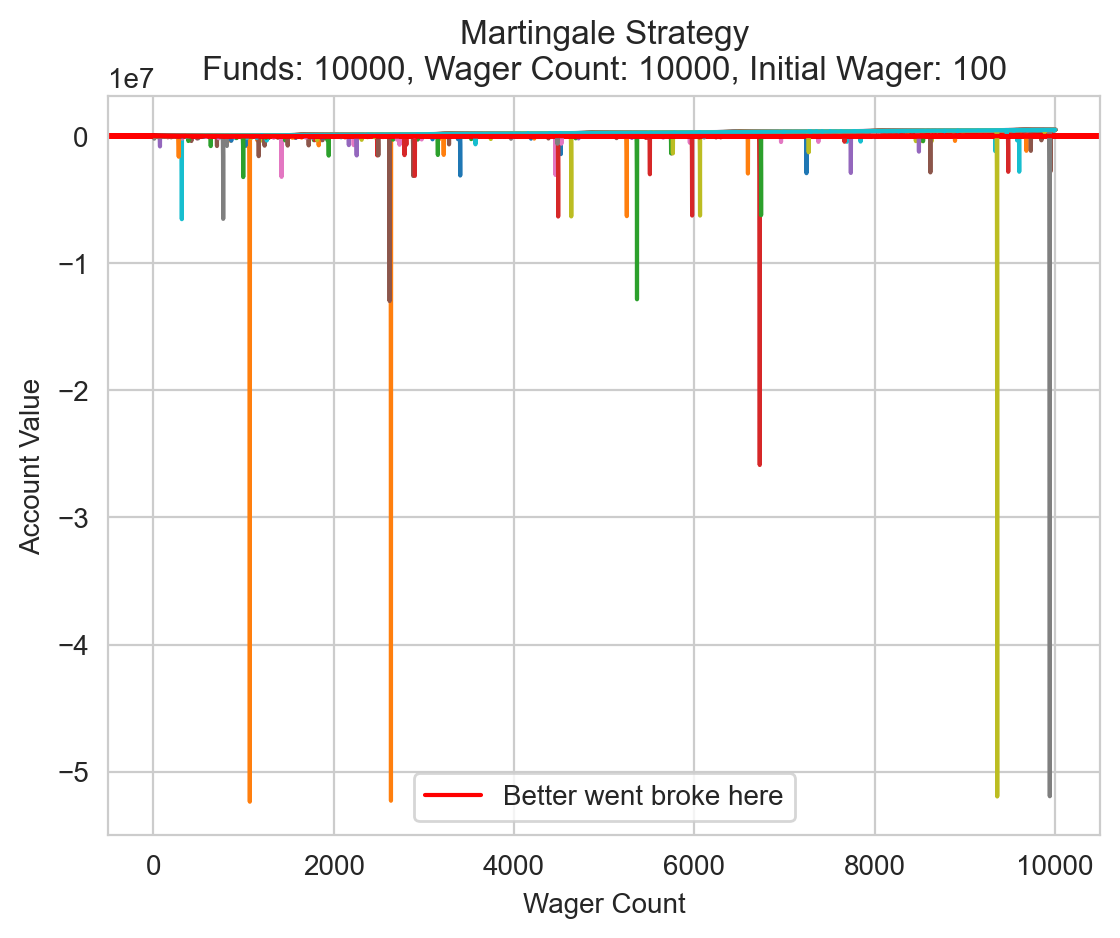

In [7]:
multiple_betters(
    funds=10_000,
    initial_wager=100,
    wager_count=10_000,
    number_of_betters=100,
    betting_function=martingale_better,
    logscale=False
)

### The conclusion here?

Sure, the Martingale strategy can make you feel like a high-roller at first, but it’s all fun and games until you hit a losing streak. The strategy’s charm quickly fades when your wallet starts looking thinner than a sheet of paper. So, unless you’ve got an endless money supply (or a really good sense of humor), you might want to think twice before going all-in on Martingale.